# HW2
# Principal Components Analysis




**Academic Year:** 2024/2025


In [ ]:
StudentID1 = -----
StudentID2 = -----


In [ ]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing',
                'Entertainment spending', 'Spending on looks',
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics',
                  'Physics', 'Internet', 'PC', 'Economy Management',
                  'Biology', 'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine', 'Law', 'Cars',
                  'Art exhibitions', 'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre', 'Fun with friends',
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic',
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated',
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk',
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload',
                    'Writing notes', 'Workaholism', 'Thinking ahead',
                    'Final judgement', 'Reliability', 'Keeping promises',
                    'Loss of interest', 'Friends versus money', 'Funniness',
                    'Fake', 'Criminal damage', 'Decision making', 'Elections',
                    'Self-criticism', 'Judgment calls', 'Hypochondria',
                    'Empathy', 'Eating to survive', 'Giving',
                    'Compassion to animals', 'Borrowed stuff',
                    'Loneliness', 'Cheating in school', 'Health',
                    'Changing the past', 'God', 'Dreams', 'Charity',
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting',
                    'New environment', 'Mood swings', 'Appearence and gestures',
                    'Socializing', 'Achievements', 'Responding to a serious letter',
                    'Children', 'Assertiveness', 'Getting angry',
                    'Knowing the right people', 'Public speaking',
                    'Unpopularity', 'Life struggles', 'Happiness in life',
                    'Energy levels', 'Small - big dogs', 'Personality',
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies',
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type],
                                               int(2 * (len(variables_by_type[type]) / 3)),
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Music
Movies
*************************************
*** THESE ARE THE SELECTED FEATURES:
Number of friends
Keeping promises
Writing notes
Decision making
Knowing the right people
Parents' advice
Charity
Achievements
Socializing
Empathy
Elections
Reliability
Unpopularity
Energy levels
Small - big dogs
Personality
Public speaking
Interests or hobbies
Getting up
Assertiveness
Giving
Eating to survive
Criminal damage
Daily events
Dreams
Hypochondria
Finding lost valuables
Responding to a serious letter
Happiness in life
Internet usage
Fake
Thinking ahead
Funniness
Health
Waiting
Compassion to animals
Prioritising workload
Friends versus money
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll


## **Introduction**

This homework involves applying Principal Component Analysis (PCA) to the Young-People-Survey (YPS) dataset, collected from 1010 students at the University of Bratislava. The dataset includes responses to questions across eight categories: music, movies, hobbies, health and spending habits, phobias, personality, and demographics. It contains both numerical ratings (1-5) and ordered categorical responses. The goal is to apply PCA to reduce the dimensionality of the data and uncover key patterns, with a focus on understanding relationships and trends based on demographic labels.\
The features selected for our analysis come from the following categories: Personality, Health, Phobias, Music, and Movies, totaling 82 features.

## **Importing Modules**


First of all, we import the packages that will be useful to start the analysis.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm
from matplotlib.lines import Line2D
pd.options.display.max_columns = 5

## **Loading and Preparing the Dataset**


The dataset is loaded using the function read_csv in pandas and saved as a pandas dataFrame called *Xfulldf_*.

In [ ]:
#Path to the 'responses_hw.csv' file
myresponses_path = "/content/responses_hw.csv"
#Loading the full dataset as a dataframe
Xfulldf_ = pd.read_csv(myresponses_path)

display(Xfulldf_.head())

Music  Slow songs or fast songs  ...  Home Town Type       Home Type
0    5.0                       3.0  ...         village  block of flats
1    4.0                       4.0  ...            city  block of flats
2    5.0                       5.0  ...            city  block of flats
3    5.0                       3.0  ...            city  house/bungalow
4    5.0                       3.0  ...         village  house/bungalow

[5 rows x 150 columns]

From the entire dataframe *Xfulldf_*, an amount of 2/3 of the dataframe is selected and saved. The same was done with the column to select only the features for our analysis, stored in the list these_features. These operations led to the determination of the final dataframe, *Xdf_*, which is the object of our analysis.

In [ ]:
#Random sampling of 2/3 of the rows
Xfulldf_ = Xfulldf_.sample(frac=2/3,random_state=random_seed)
#Extracting columns corresponding to the variables in 'these_features'
Xdf_ = Xfulldf_.loc[:,these_features]

display(Xdf_)

Number of friends  Keeping promises  ...  Western  Action
522                  4               3.0  ...      2.0     4.0
474                  5               4.0  ...      1.0     4.0
936                  4               2.0  ...      3.0     4.0
384                  3               4.0  ...      1.0     1.0
886                  5               4.0  ...      1.0     5.0
..                 ...               ...  ...      ...     ...
142                  2               3.0  ...      1.0     2.0
523                  1               5.0  ...      3.0     4.0
411                  5               4.0  ...      1.0     3.0
126                  2               4.0  ...      1.0     4.0
622                  5               4.0  ...      3.0     5.0

[673 rows x 82 columns]

## **Cleaning the Dataset**

We perform an inspection of the dataset to determine the presence of missing values.

In [ ]:
# Distribution of missing values
# Calculate missing values and identify the features with missing values
missing_counts = Xdf_.isna().sum()
missing_counts_filtered = missing_counts[missing_counts > 0]
total_rows = Xdf_.shape[0]
# Compute percentages of missing values
missing_percentage = (missing_counts_filtered / total_rows) * 100

# Summary of missing values
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts_filtered,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Count', ascending=False)
print(missing_summary)

print(f"The total amount of missing values is {Xdf_.isna().sum().sum()}")

                          Missing Count  Missing Percentage
Smoking                               8            1.188707
Reggae, Ska                           7            1.040119
Documentary                           7            1.040119
Punk                                  7            1.040119
Giving                                6            0.891530
...                                 ...                 ...
Storm                                 1            0.148588
Assertiveness                         1            0.148588
Fear of public speaking               1            0.148588
Fake                                  1            0.148588
Slow songs or fast songs              1            0.148588

[74 rows x 2 columns]
The total amount of missing values is 215


After analyzing the distribution of missing values, we decided to delete rows with missing data rather than replace them with inaccurate values that may distort the analysis and lead to unreliable results.

This approach avoids introducing potential biases or misleading information, especially considering that the amount of missing data is small relative to the dataset size.

Furthermore each feature has less than 1.2% missing values, so neither columns will be removed to ensure that no valuable information is lost.

Since PCA relies on analyzing the variance across all features, removing columns would limit the dataset's ability to capture meaningful patterns, reducing the overall effectiveness of the dimensionality reduction process.


In [ ]:
#Remove missing values
Xdf_=Xdf_.dropna()
display(Xdf_)

Number of friends  Keeping promises  ...  Western  Action
522                  4               3.0  ...      2.0     4.0
474                  5               4.0  ...      1.0     4.0
936                  4               2.0  ...      3.0     4.0
886                  5               4.0  ...      1.0     5.0
901                  2               5.0  ...      2.0     4.0
..                 ...               ...  ...      ...     ...
580                  3               5.0  ...      1.0     4.0
142                  2               3.0  ...      1.0     2.0
411                  5               4.0  ...      1.0     3.0
126                  2               4.0  ...      1.0     4.0
622                  5               4.0  ...      3.0     5.0

[534 rows x 82 columns]

##**Encoding of categorical features**

PCA is a highly useful tool to enhance the interpretability of datasets with an excessive number of features. However, datasets often include categorical (non-numerical) features, which cannot be directly used in PCA. To apply PCA, we must preprocess the dataset to transform these categorical features into numerical representations.

In [ ]:
#Selection of the categorial features
categorical_columns = Xdf_.select_dtypes(include=['object']).columns
print(f'The categorical features of our dataset are {categorical_columns.values}')
display(Xdf_[['Internet usage', 'Smoking', 'Alcohol']])

#Compute a list of lists with values taken on by categorical features
cats = [['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day'],
    ['never smoked', 'former smoker', 'tried smoking', 'current smoker'],
    ['never', 'social drinker', 'drink a lot']]

#Creation of the OrdinalEncoder object that learn the mapping given by cats and trasform the data
encoder = OrdinalEncoder(categories=cats)
Xdf_.loc[:, categorical_columns] = encoder.fit_transform(Xdf_[categorical_columns])+1
Xdf_=Xdf_.astype(int)
display(Xdf_[['Internet usage', 'Smoking', 'Alcohol']])

The categorical features of our dataset are ['Internet usage' 'Smoking' 'Alcohol']


Internet usage         Smoking         Alcohol
522          few hours a day   tried smoking  social drinker
474          few hours a day   tried smoking  social drinker
936          few hours a day   tried smoking  social drinker
886          few hours a day  current smoker     drink a lot
901  less than an hour a day   tried smoking           never
..                       ...             ...             ...
580          few hours a day   tried smoking  social drinker
142          most of the day    never smoked  social drinker
411          few hours a day   tried smoking  social drinker
126          few hours a day   tried smoking  social drinker
622          few hours a day   former smoker     drink a lot

[534 rows x 3 columns]

Internet usage  Smoking  Alcohol
522               3        3        2
474               3        3        2
936               3        3        2
886               3        4        3
901               2        3        1
..              ...      ...      ...
580               3        3        2
142               4        1        2
411               3        3        2
126               3        3        2
622               3        2        3

[534 rows x 3 columns]

We chose to use the **label encoding** method because the categories in the selected columns followed an intrinsic order of gradual progression of meaning.

We perform it using *OrdinalEncoder* from sklearn.preprocessing library, passing as input a list of lists containing the unique categories for each feature. This ensures the proper ordered transformation of the data.

The column about '**Internet usage**' has the following categories:
-"no time at all",
-"less than an hour a day",
-"few hours a day",
-"most of the day".\
They represent increasing levels of time spent on internet.

The column about '**Smoking**' has as categories:
-"never smoked",
-"former smoker",
-"tried smoking",
-"current smoker".\
They represent a natural order in terms of smoking behavior.

The column about '**Alcohol**' has instead the following categories:
-"never",
-"social drinker",
-"drink a lot".\
They also show an incremention in alcohol assumption.

Encoding these categories ordinally ensures that their numerical representation reflects their progression. This type of relationship cannot be effectively captured using one-hot encoding, which tranforms each category into binary variables, removing any intrinsic order between the categories of each column.

One-hot encoding assumes that there is not relationship between categories and treats them as independent. This leads to loss of information.
Additionally for datasets with many categories, one-hot encoding significantly increases the feature space, potentially complicating the model.  


## **Analyzing the Variance**



 PCA does not perform correctly if the data features are not within the same range of values because it relies on the covariance matrix, where features with larger ranges can dominate others.

 Therefore, another fundamental aspect of the preprocessing phase is normalization.As per the guidelines, we applied rescaling using the practices of *StandardScaler* and *MinMaxScaler* by utilizing their eponymous classes generating two new dataframes named *Xstd_df* and *Xmm_df*, respectively.



In [ ]:
# Data scaling with StandardScaler
# The StandardScaler standardizes the data by removing the mean and scaling to unit variance
stdscaler_x = StandardScaler()
# Fit the StandardScaler to the data
stdscaler_x.fit(Xdf_.values)
# Transform the data using the learned scaling parameters and store it in a new DataFrame
Xstd_df=pd.DataFrame(stdscaler_x.transform(Xdf_.values), columns=Xdf_.columns)


#Data scaling with MinMaxScaler
# The MinMaxScaler scales the data to a fixed range of values ([0;1])
mmscaler_x = MinMaxScaler()
# Fit the MinMaxScaler to the data (learn the min and max values)
mmscaler_x.fit(Xdf_.values)
# Transform the data using the learned scaling parameters and store it in a new DataFrame
Xmm_df=pd.DataFrame(mmscaler_x.transform(Xdf_.values), columns=Xdf_.columns)


First, an instance of the scaler ( *StandardScaler* and *MinMaxScaler*) is created and applied to the data using the `fit()` method to compute the necessary parameters (such as mean, standard deviation, or min/max values).  
Then, the `transform()` method is used to apply these parameters to the original data, generating new datasets with scaled values.



---



Once the standardized dataframes are generated, we proceed to analyze the differences they have introduced in terms of variance, a fundamental parameter for PCA.

In [ ]:
# Calculate variances for each dataframe
var_Xdf = Xdf_.var()
var_Xstd_df = Xstd_df.var()
var_Xmm_df = Xmm_df.var()

# Create an unified table using pandas.concat
variance_table = pd.concat([var_Xdf, var_Xstd_df, var_Xmm_df], axis=1)
variance_table.columns = ['Original', 'Standard Scaler', 'Min-Max Scaler']

# Set feature names as index
variance_table.index = Xdf_.columns

print(variance_table)

                          Original  Standard Scaler  Min-Max Scaler
Number of friends         1.170342         1.001876        0.073146
Keeping promises          0.763318         1.001876        0.047707
Writing notes             2.030261         1.001876        0.126891
Decision making           1.410745         1.001876        0.088172
Knowing the right people  1.286085         1.001876        0.080380
...                            ...              ...             ...
Fantasy/Fairy tales       1.336274         1.001876        0.083517
Animated                  1.468966         1.001876        0.091810
Documentary               1.328938         1.001876        0.083059
Western                   1.269111         1.001876        0.079319
Action                    1.431952         1.001876        0.089497

[82 rows x 3 columns]


To better compare the obtained values, we create a combined bar plot that visualizes the variance of each of the 82 features for each dataframe, with different colors representing each dataframe as indicated in the legend.

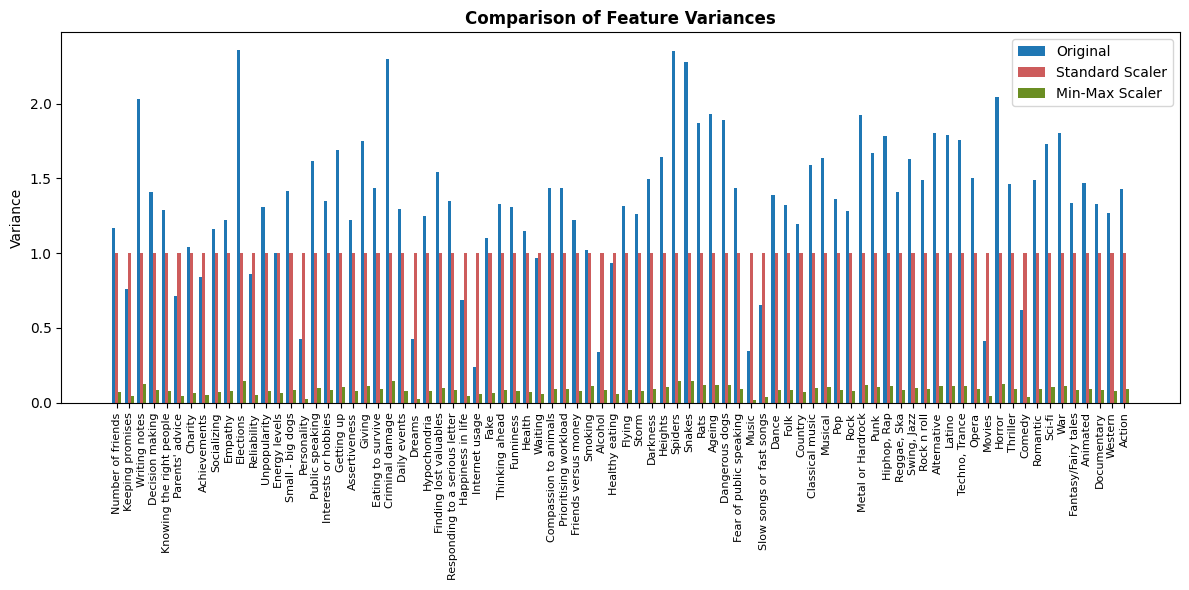

In [ ]:
# Get feature names and variances for each scaling method
feature_names = variance_table.index
original_variances = variance_table['Original']
standard_scaler_variances = variance_table['Standard Scaler']
minmax_scaler_variances = variance_table['Min-Max Scaler']

# Create the bar chart with 3 plot
x = np.arange(len(feature_names))
width = 0.25
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, original_variances, width, label='Original')
rects2 = ax.bar(x, standard_scaler_variances, width, label='Standard Scaler',color='indianred')
rects3 = ax.bar(x + width, minmax_scaler_variances, width, label='Min-Max Scaler', color='olivedrab')

# Add labels, title, and legend
ax.set_ylabel('Variance')
ax.set_title('Comparison of Feature Variances', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90, fontsize=8)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

The bar plot above represents the variance explained by numerical features in the three different dataframes (original, standardized and min-max scaled i.e. normalized), showing the impact of the scaling techniques on the distribution and range of the data.

**Original Dataframe**: The variances of the numerical features reflect the original distribution and spread of the data. The largest range of values is found in the "Elections" feature, with counts *(1:99, 2:48, 3:79, 4:91, and 5:217)* and a mean of $3.5$, leading to a variance of over $2.36$. The smallest range of values is in the "Internet usage" feature, with counts *(1:0, 2:67, 3:406, and 4:67)* and a mean of $2.99$, resulting in a variance of 0.24.\
**Standard Scaled Dataframe**: The variances are relatively more balanced and similar across different features. Standard scaling helps to center the data around zero with a standard deviation of $1$, ensuring that features equally contribute to the analysis. For the "Elections" feature, the values are transformed as follows: *(1:-1.64, 2:-0.99, 3:-0.34, 4:0.31, and 5:9.93)*.\
**Min-Max Scaled Dataframe**: it is obtained by normalizing values to a specific range, between a minimum value ($m$) and a maximum value ($M$) for each column. This normalization technique ensures that each feature is scaled to its own range, preventing any single feature from dominating the analysis due to a larger variance or range. For the "Elections" feature, the values are transformed as follows: *(1:0, 2:0.25, 3:0.50, 4:0.75, and 5:1)*.



This chart is then analyzed in detail through three separate bar plots, each representing a different dataframe, to better visualize the values. However, the single combined chart with all three dataframes was essential for understanding the differences in terms of value ranges.



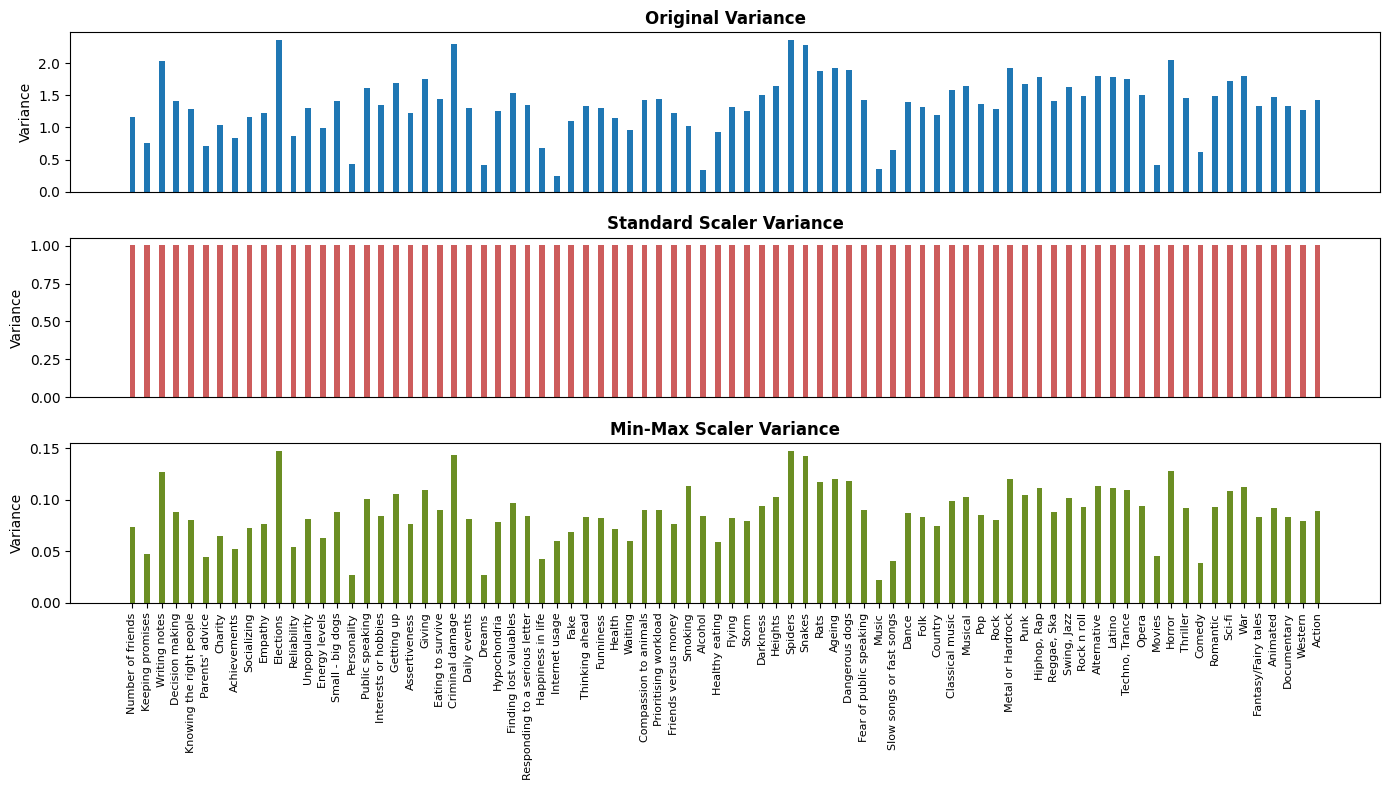

In [ ]:
# Create an array for the x-axis values, which will be the index of the features
x = np.arange(len(feature_names))
# Set the width for the bars
width = 0.4

# Create a figure with three subplots (3 rows, 1 column) and set the figure size
fig, axs = plt.subplots(3, 1, figsize=(14, 8))

# Create the first subplot for Original variances
axs[0].bar(x, original_variances, width, label='Original')
axs[0].set_ylabel('Variance')
axs[0].set_xticks([])
axs[0].set_title('Original Variance', fontweight='bold')

# Create the second subplot for Standard Scaler variances
axs[1].bar(x, standard_scaler_variances, width, label='Standard Scaler', color='indianred')
axs[1].set_ylabel('Variance')
axs[1].set_xticks([])
axs[1].set_title('Standard Scaler Variance', fontweight='bold')

# Create the second subplot for Min-Max variances
axs[2].bar(x, minmax_scaler_variances, width, label='Min-Max ', color='olivedrab')
axs[2].set_ylabel('Variance')
axs[2].set_xticks([])
axs[2].set_title('Min-Max Scaler Variance', fontweight='bold')


# Set the x-ticks and labels only for the last subplot
axs[2].set_xticks(x)
axs[2].set_xticklabels(feature_names, rotation=90, fontsize=8)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the chart
plt.show()

Each subplot shown above presents different ranges, which are highlighted in the combined plot. This representation emphasizes how the *Standard Scaler* results in a fixed value of one, while the *Min-Max Scaler* exhibits the same pattern and relationship between features as the original data, though on different ranges.



---



PCA is performed on the three dataframes *Xdf_*, *Xstd_df* and *Xmm_df* using `sklearn.decomposition.PCA`, a specific class for creating PCA objects. As a method for dimensionality reduction, a PCA object takes as input the number of components to retain, discarding the others.\
The concept behind PCA, as dimensionality reduction technique, is to identify a number **m** of principal components that capture most of the data's variance, allowing us to reduce the dimensionality while preserving as much information as possible.\
According to this idea, we first consider the full PCA and plot the **Cumulative Explained Variance** for all the principal components to visualize how much of the total variance is captured by each component, helping us determine the optimal number of components to retain for our analysis.


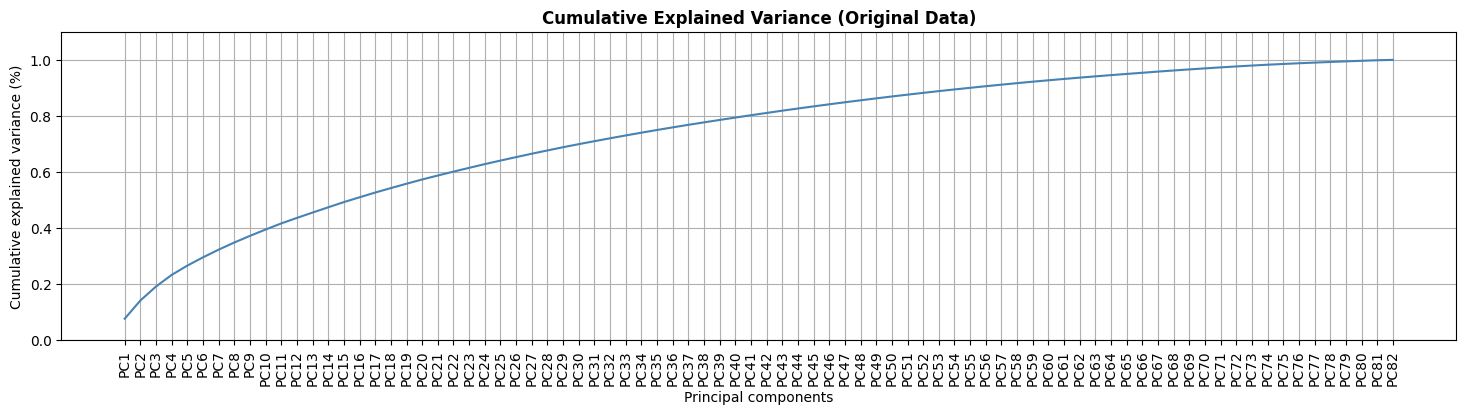

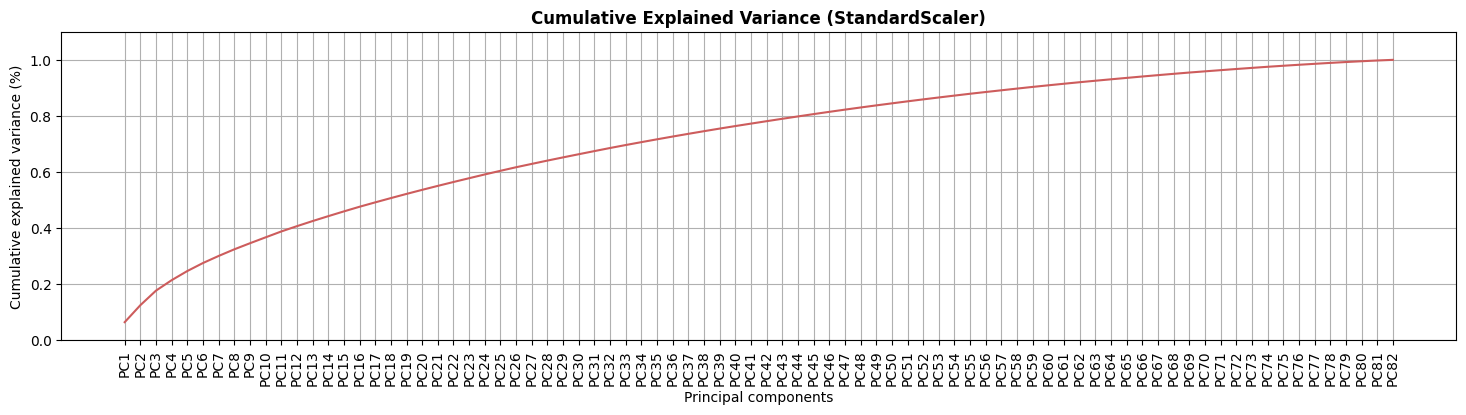

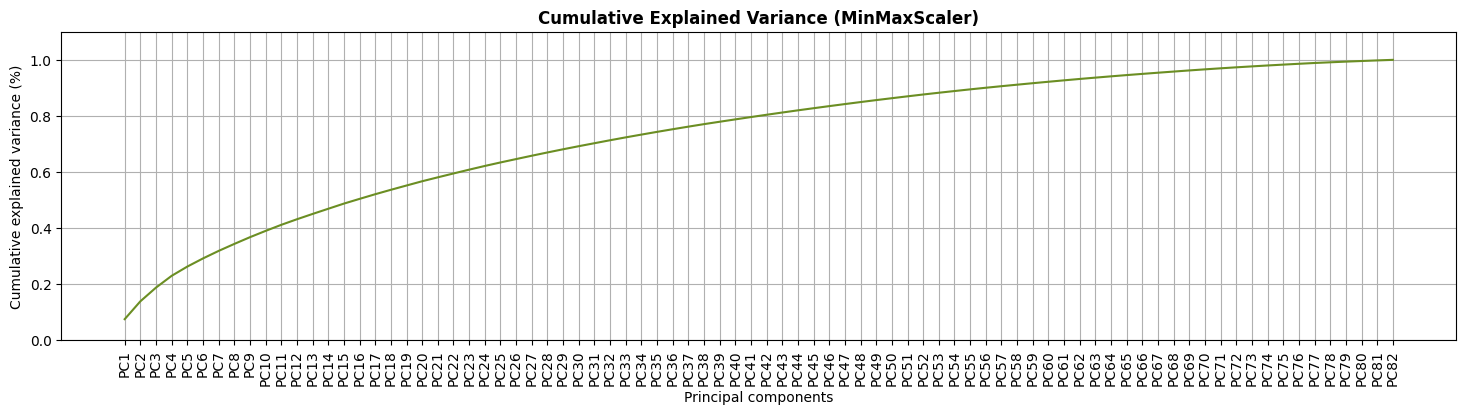

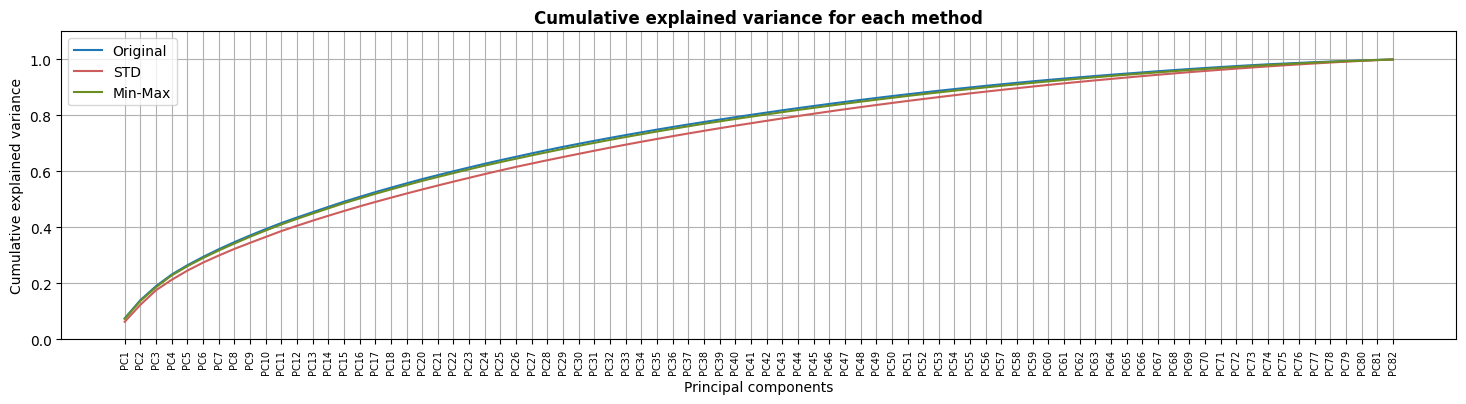

In [ ]:
# Perform PCA on the original data
# Initialize PCA
pca_xdf_ = PCA()
# Fit PCA to the original data
pca_xdf_.fit(Xdf_.values)

# Perform PCA on the standardized data
pca_xstddf_ = PCA()
pca_xstddf_.fit(Xstd_df)

# Perform PCA on the Min-Max scaled data
pca_xmmdf_ = PCA()
pca_xmmdf_.fit(Xmm_df)


#Plots of the cumulative explained variance to analyze how much of the dataset's variance is captured by each principal componen
def plot_cumulative_variance(pca, title, color):
    plt.figure(figsize=(18, 4))
    # Plot the cumulative explained variance ratio
    plt.plot(np.cumsum(pca.explained_variance_ratio_), color=color)
    plt.title(title, fontweight='bold')
    plt.ylim([0, 1.1])
    plt.xticks(ticks=np.arange(pca.n_features_in_), labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)], rotation=90)
    plt.xlabel('Principal components')
    plt.ylabel('Cumulative explained variance (%)')
    plt.grid()
    plt.show()

# Plot cumulative explained variance for original data, standardized data, and Min-Max scaled data
plot_cumulative_variance(pca_xdf_, 'Cumulative Explained Variance (Original Data)', 'steelblue')
plot_cumulative_variance(pca_xstddf_, 'Cumulative Explained Variance (StandardScaler)','indianred')
plot_cumulative_variance(pca_xmmdf_, 'Cumulative Explained Variance (MinMaxScaler)','olivedrab')

# Plot comparison of cumulative explained variance for each scaling method
plt.figure(figsize=(18,4))
# Plot for original data
plt.plot(np.cumsum(pca_xdf_.explained_variance_ratio_),label='Original')
plt.title('Cumulative explained variance for each method', fontweight='bold')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_xdf_.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_xdf_.n_features_in_)],rotation= 'vertical', fontsize=7)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
# Plot for standardized data
plt.plot(np.cumsum(pca_xstddf_.explained_variance_ratio_),label='STD', color='indianred')
# Plot for Min-Max scaled data
plt.plot(np.cumsum(pca_xmmdf_.explained_variance_ratio_),label='Min-Max', color='olivedrab')
plt.legend()
plt.grid()
plt.show()


Typically, PCA performs better when the data is standardized, as this removes biases caused by differing scales among features. Standardization ensures that all features contribute equally to the analysis, regardless of their original ranges. However, our original dataset is mostly composed of values in the range $[1,5]$, with the only exception being categorical features, which, once encoded, fall within the range $[1,4]$. Since the variance in the original dataset doesn’t change significantly, the result of the cumulative explained variance with and without scaling is similar.

As can be seen from the combined chart, the cumulative explained variance with the Min-Max Scaler is closer to the original dataset compared to the Standard Scaler. This is because Min-Max scaling is more suitable for "rank-valued" data, as it maintains the ranking by simply changing the scale (in our case, from $[1,5]$ to $[0,1]$). While the original data produces similar results, using scaling techniques like *StandardScaler* or *MinMaxScaler* remains a best practice, as it ensures robustness in more complex situations (e.g., future datasets with different scales or significant outliers).\
In general, the cumulative variance plot is not very positive because it increases slowly at the beginning. This means we would need to consider too many principal components to gain even a partial understanding of the dataset.





## **Dimensionality Reduction and PCs**



The task requires computing a PCA for each of the two dataframes (*Xstd_df* and *Xmm_df*) and performing dimensionality reduction based on **m**. Specifically, the value of **m** is determined as the minimum between the number of components **m′** that accounts for at least 33% of the cumulative explained variance, and a fixed value of 5. Given that the cumulative explained variance does not quickly reach the 33% threshold in these datasets (which is achieved with m=9 for the Standard Scaler and m=8 for the Min-Max Scaler), the value of *m* is chosen to be **5** for both the datasets. This results in approximately **26.17%** of the variance for the Min-Max Scaler and **24.58%** for the Standard Scaler.


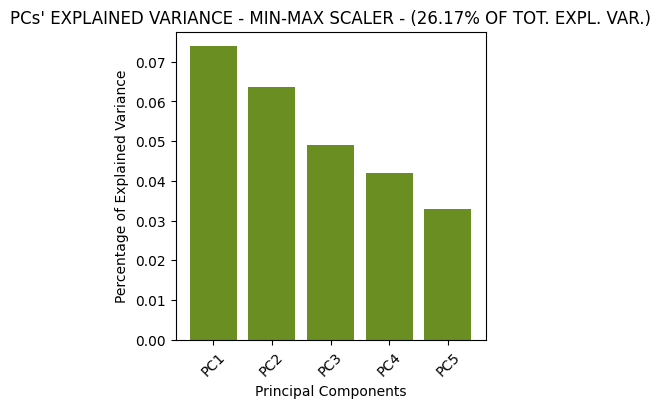

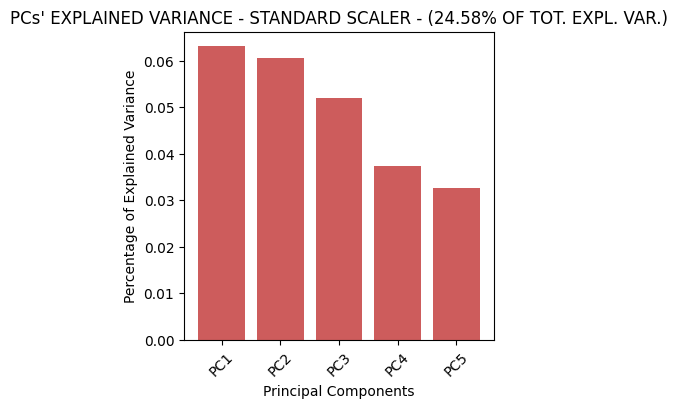

In [ ]:
# Function to plot explained variance
def plot_pca_explained_variance(X_df, typescaler,col,variance_threshold=0.33, max_components=5):
    # Determine the minimum number of components to explain the desired variance threshold
    pca_temp = PCA().fit(X_df)
    m_33 = np.argmax(np.cumsum(pca_temp.explained_variance_ratio_) >= variance_threshold) + 1  # 1-based index
    # Set the number of components, ensuring it doesn't exceed max_components
    m = min(m_33, max_components)

    # Initialize and fit PCA with the determined number of components
    pca = PCA(n_components=m)
    pca.fit(X_df)

    # Compute the total explained variance percentage
    round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum() * 100, decimals=2)

    # Create the bar plot of the explained variance for each principal component
    plt.figure(figsize=(4, 4))
    # Plot the explained variance for each PC
    plt.bar(range(1, m + 1), pca.explained_variance_ratio_,color=col)
    plt.title(f"PCs' EXPLAINED VARIANCE - {typescaler} - ({round_expl_var_ratio}% OF TOT. EXPL. VAR.)")
    plt.xticks(ticks=np.arange(1, m + 1),
               labels=[f'PC{i + 1}' for i in range(m)], rotation=45)
    plt.xlabel('Principal Components')
    plt.ylabel('Percentage of Explained Variance')
    plt.show()

    # Return the PCA object and the number of components used
    return pca,m

# Plot explained variance for Min-Max scaled data and StandardScaler
pca_mm,m_mm=plot_pca_explained_variance(Xmm_df,'MIN-MAX SCALER', 'olivedrab')
pca_std,m_std=plot_pca_explained_variance(Xstd_df,'STANDARD SCALER','indianred')




---



We can interpret the Principal Components through the bar plot of the 5PCs of each dataframe by identifying which original features are most prominently represented. To aid in this interpretation, we have defined a positive parameter, which serves as a threshold for the features. Specifically, if a bar is not taller than this threshold, we do not consider that feature to be significantly expressed in the Principal Component.

For an optimal interpretation of the results, we focus only on the features whose loadings (in absolute value) exceed the threshold, defined by the expression
$$\epsilon = \sqrt{\frac{1}{n}}\ * 1.5 $$
where $n$ is the number of features.

 This allows us to identify the most relevant features contributing to each Principal Component. We choose to use this threshold to better highlight the features that are more expressed in the PCs, because the threshold without the additional multiplicative factor of $1.5$ captured too much features.


To facilitate interpretation, we used a specific colormap that associates similar categories with similar colors. Music and movie preferences, related to the *Entertainment* domain, are represented with similar colors, while characteristics related to personality and health linked to the *Personality* domain, are represented with other comparable colors. This approach helps to clearly visualize how the variables are correlated and how they are distributed across the different principal components.

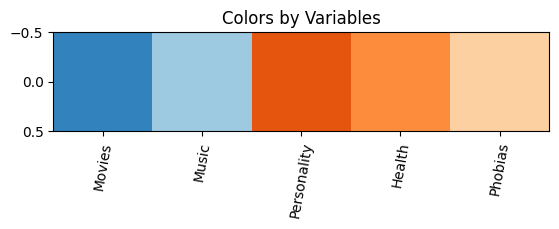

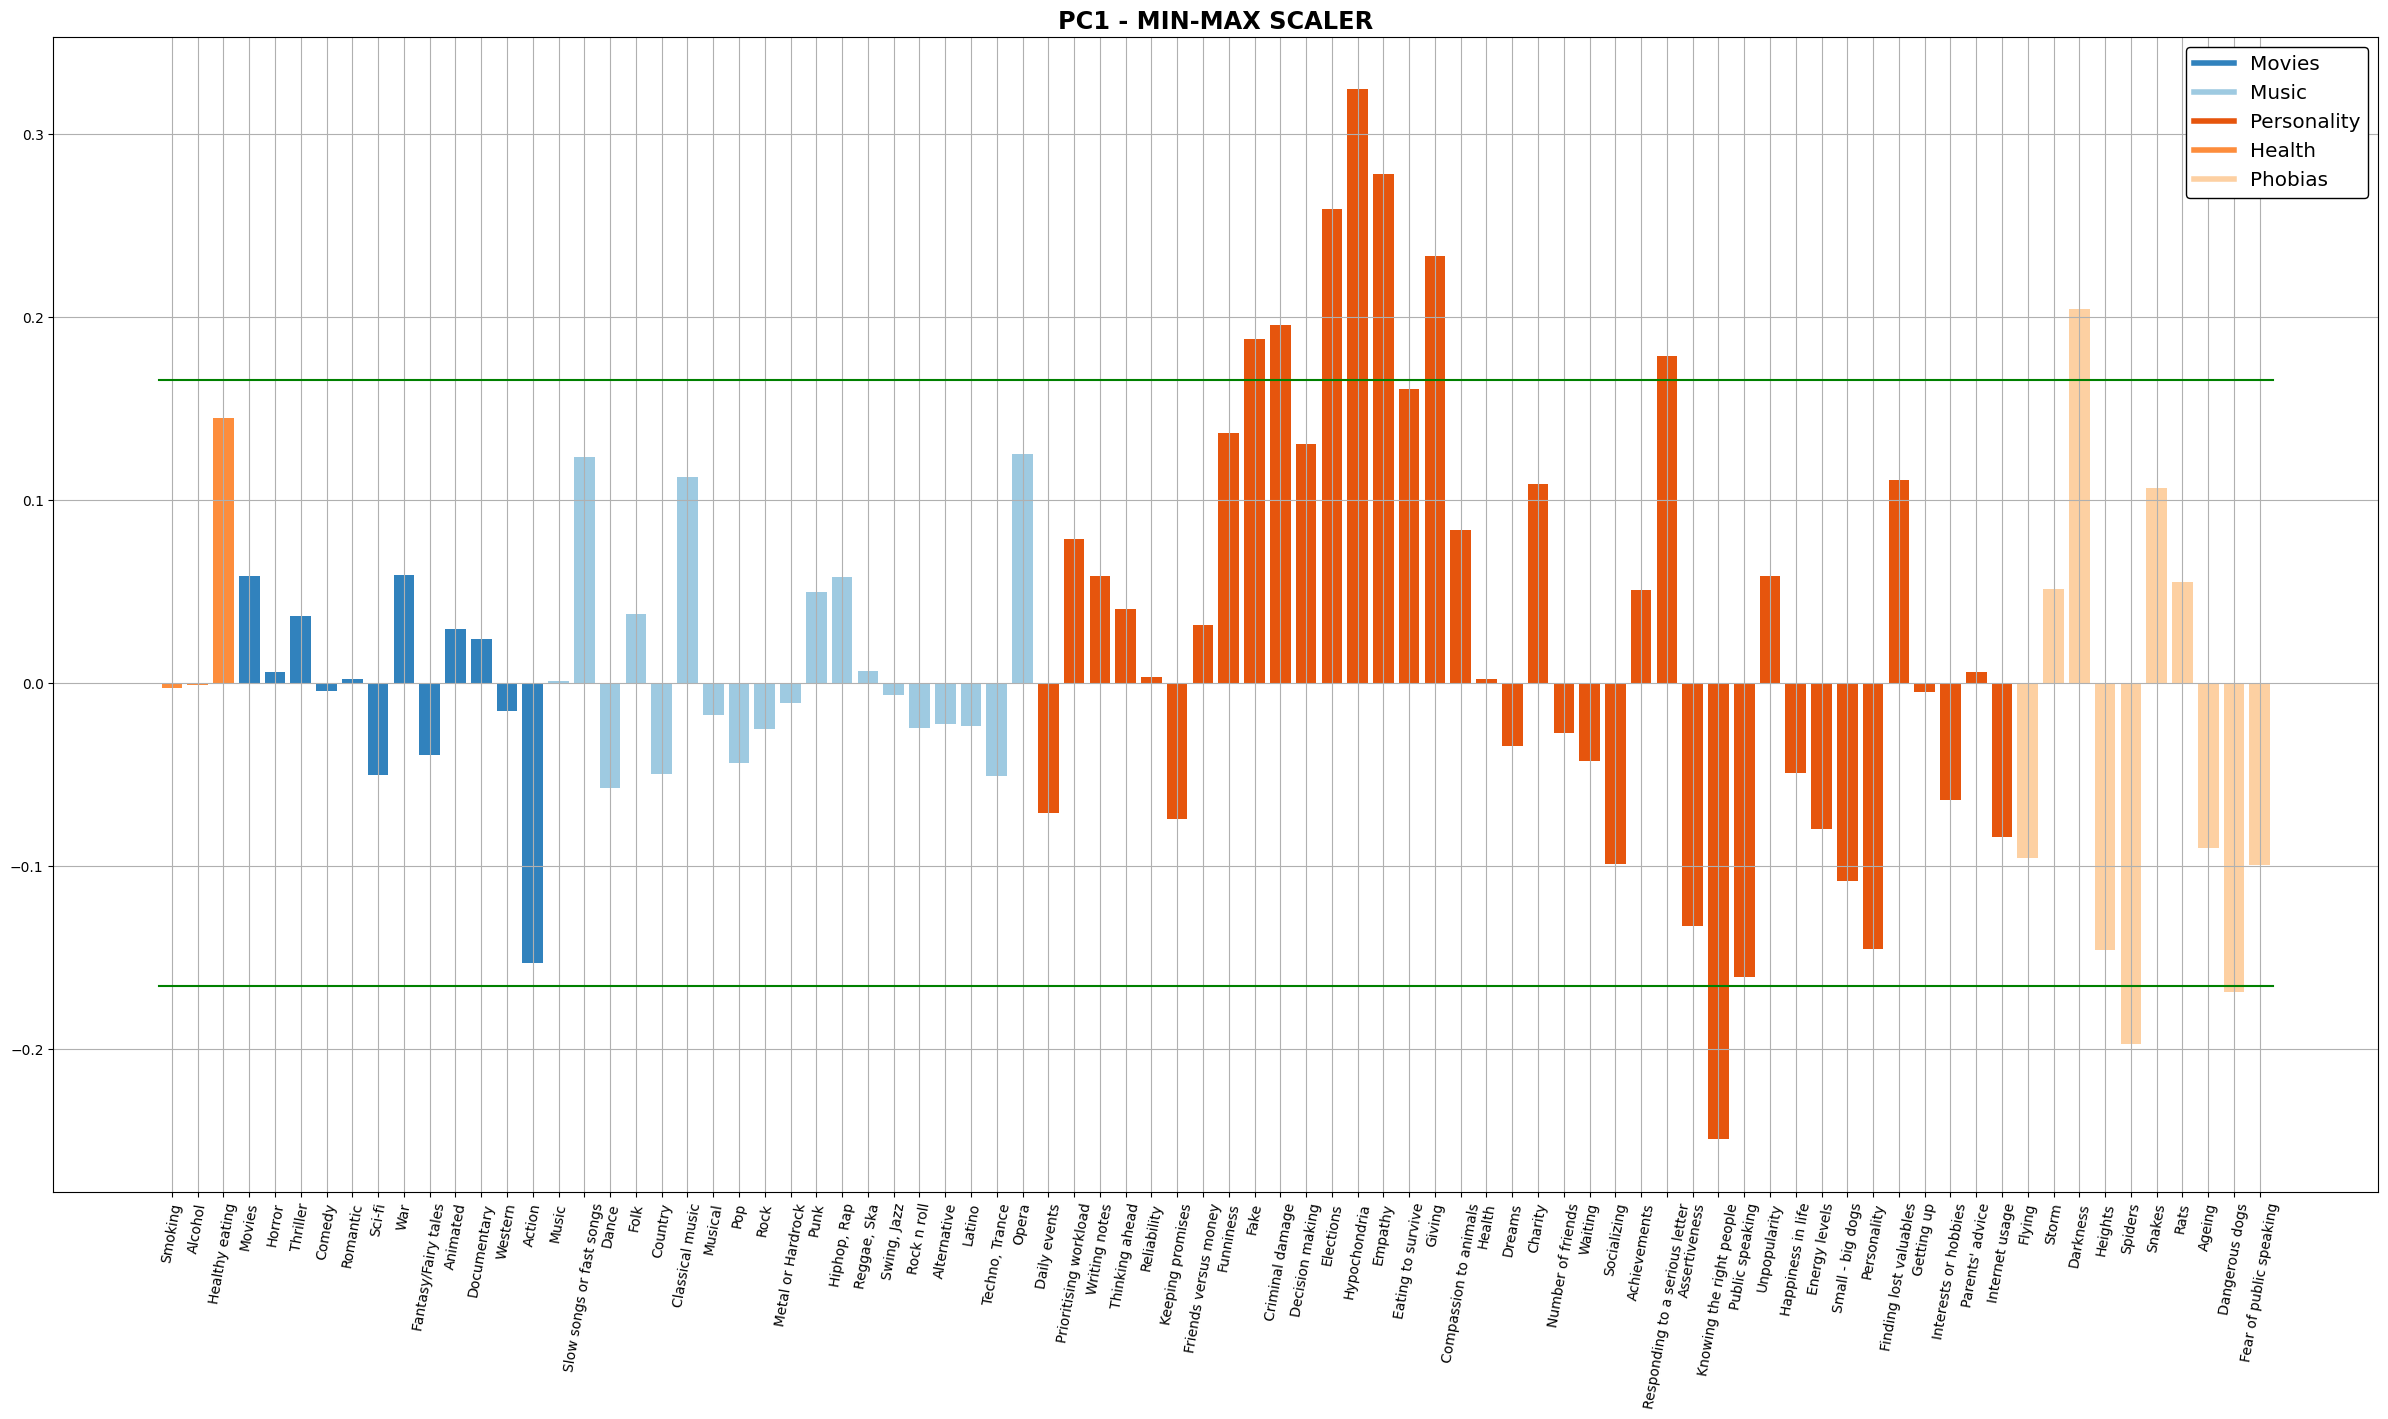


= PC1 - MIN-MAX SCALER
SIGNIFICANT POSITIVE FEATURES: ['Fake', 'Criminal damage', 'Elections', 'Hypochondria', 'Empathy', 'Giving', 'Responding to a serious letter', 'Darkness']
SIGNIFICANT NEGATIVE FEATURES: ['Knowing the right people', 'Spiders', 'Dangerous dogs']


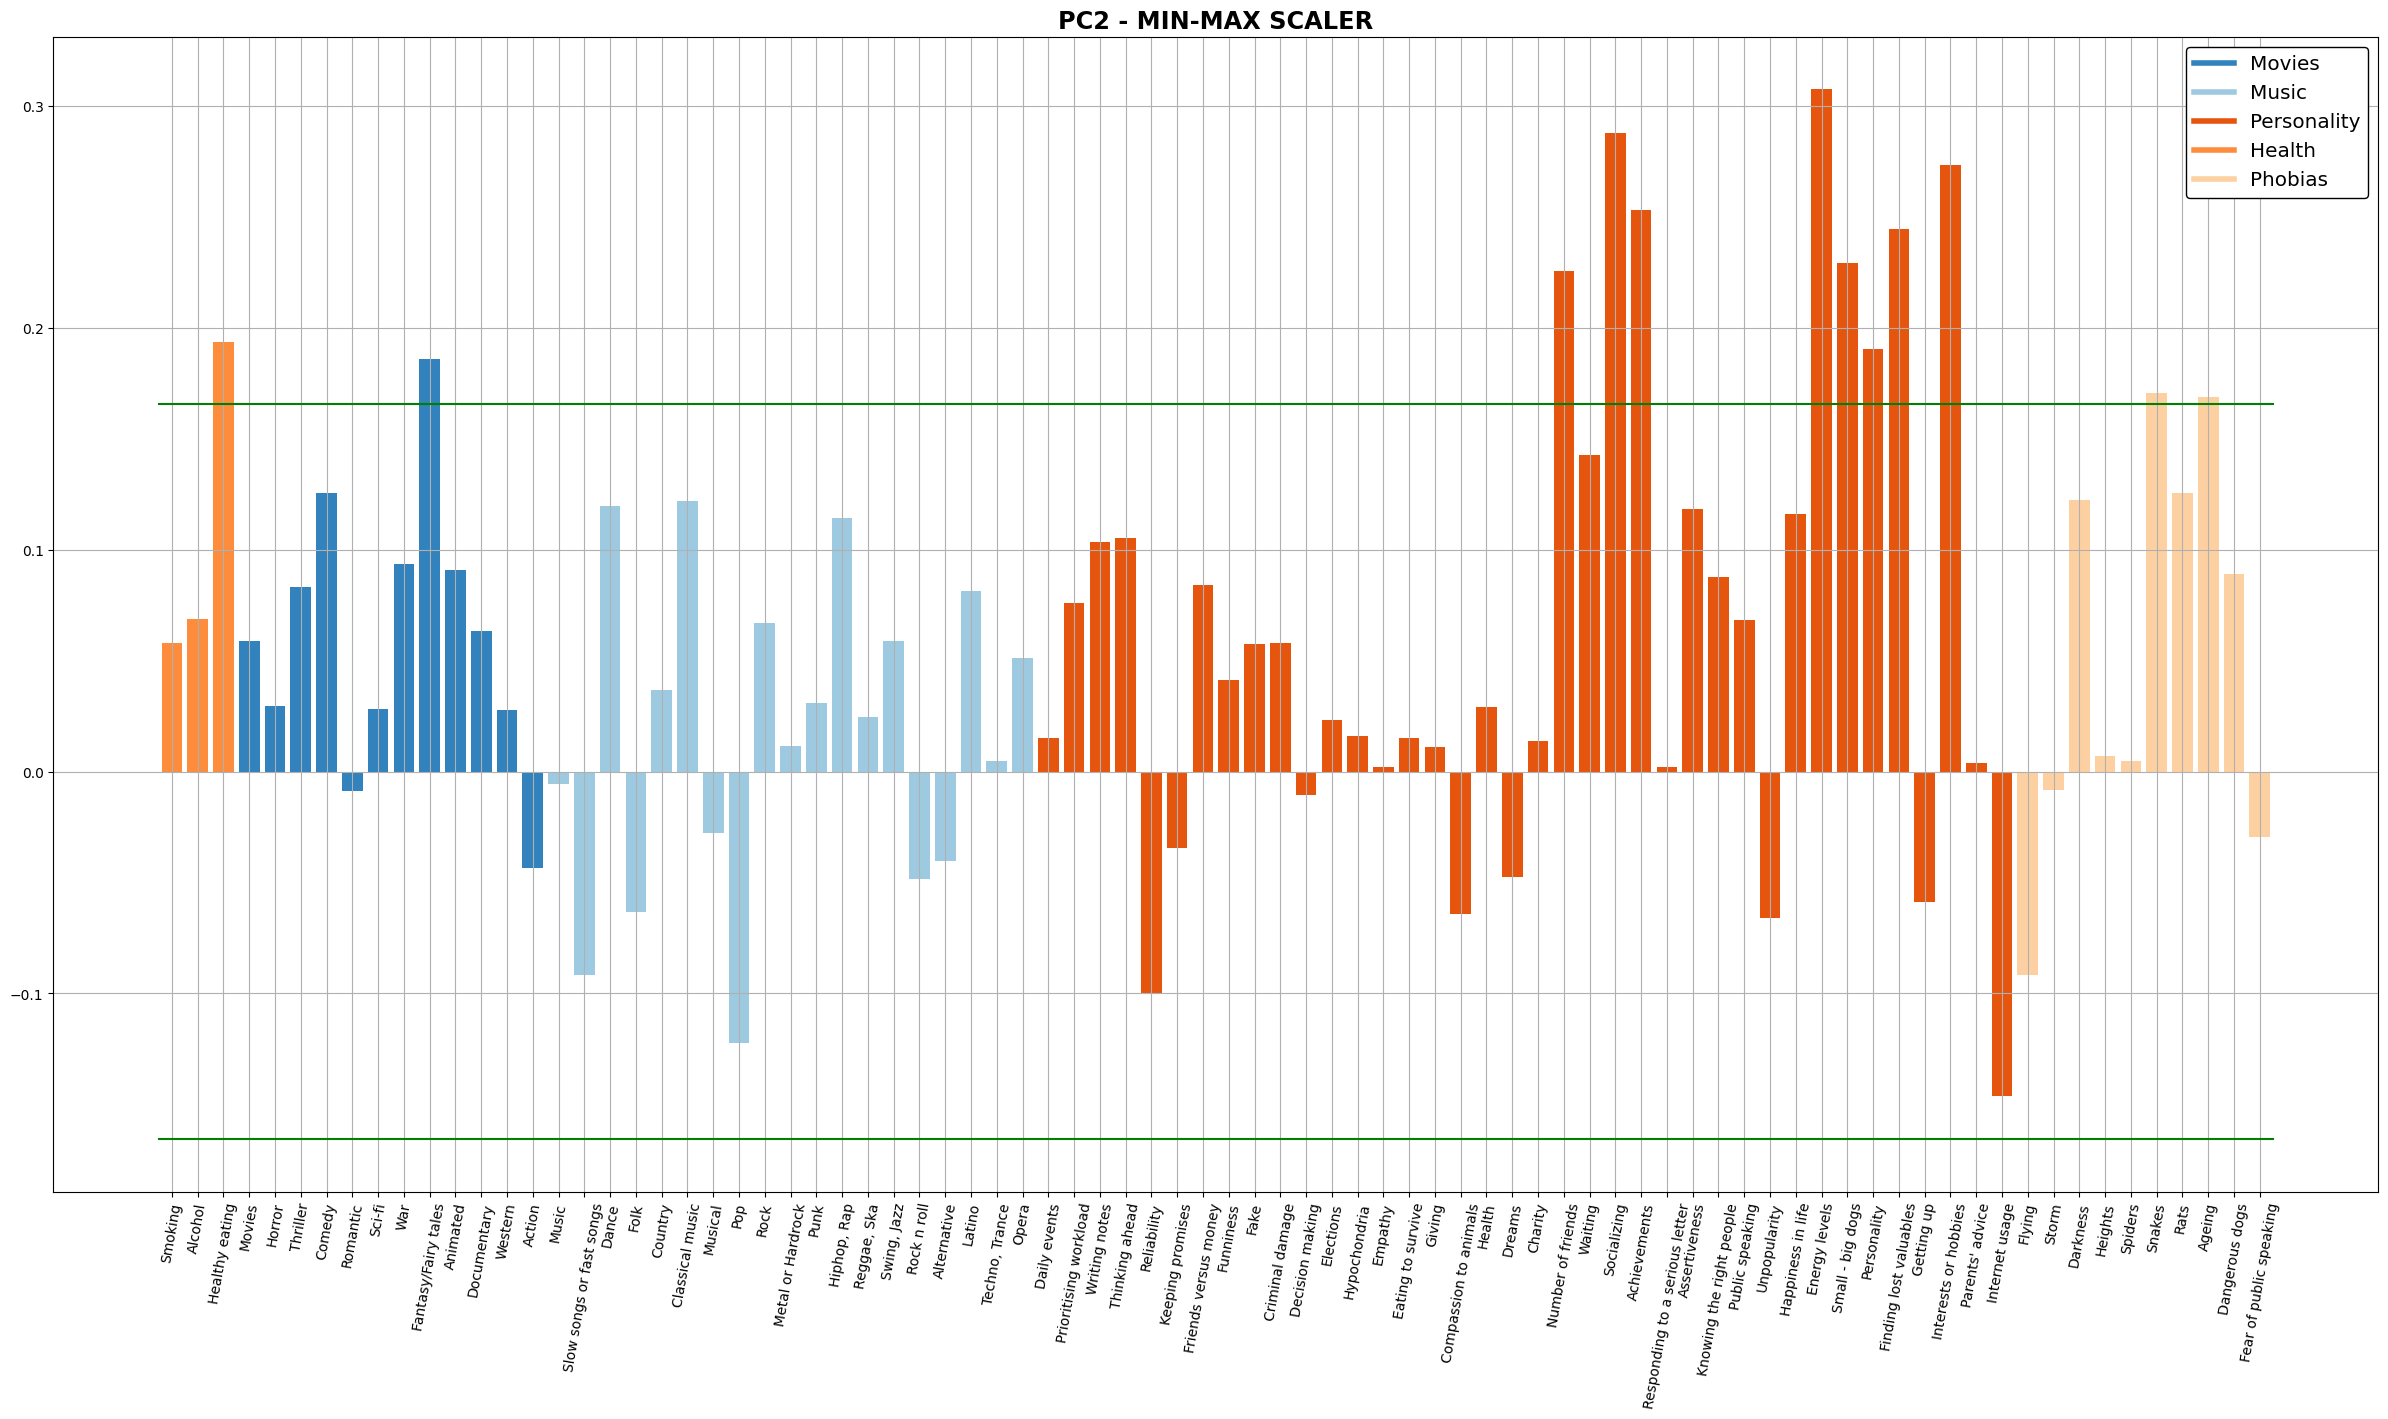


= PC2 - MIN-MAX SCALER
SIGNIFICANT POSITIVE FEATURES: ['Healthy eating', 'Fantasy/Fairy tales', 'Number of friends', 'Socializing', 'Achievements', 'Energy levels', 'Small - big dogs', 'Personality', 'Finding lost valuables', 'Interests or hobbies', 'Snakes', 'Ageing']
SIGNIFICANT NEGATIVE FEATURES: []


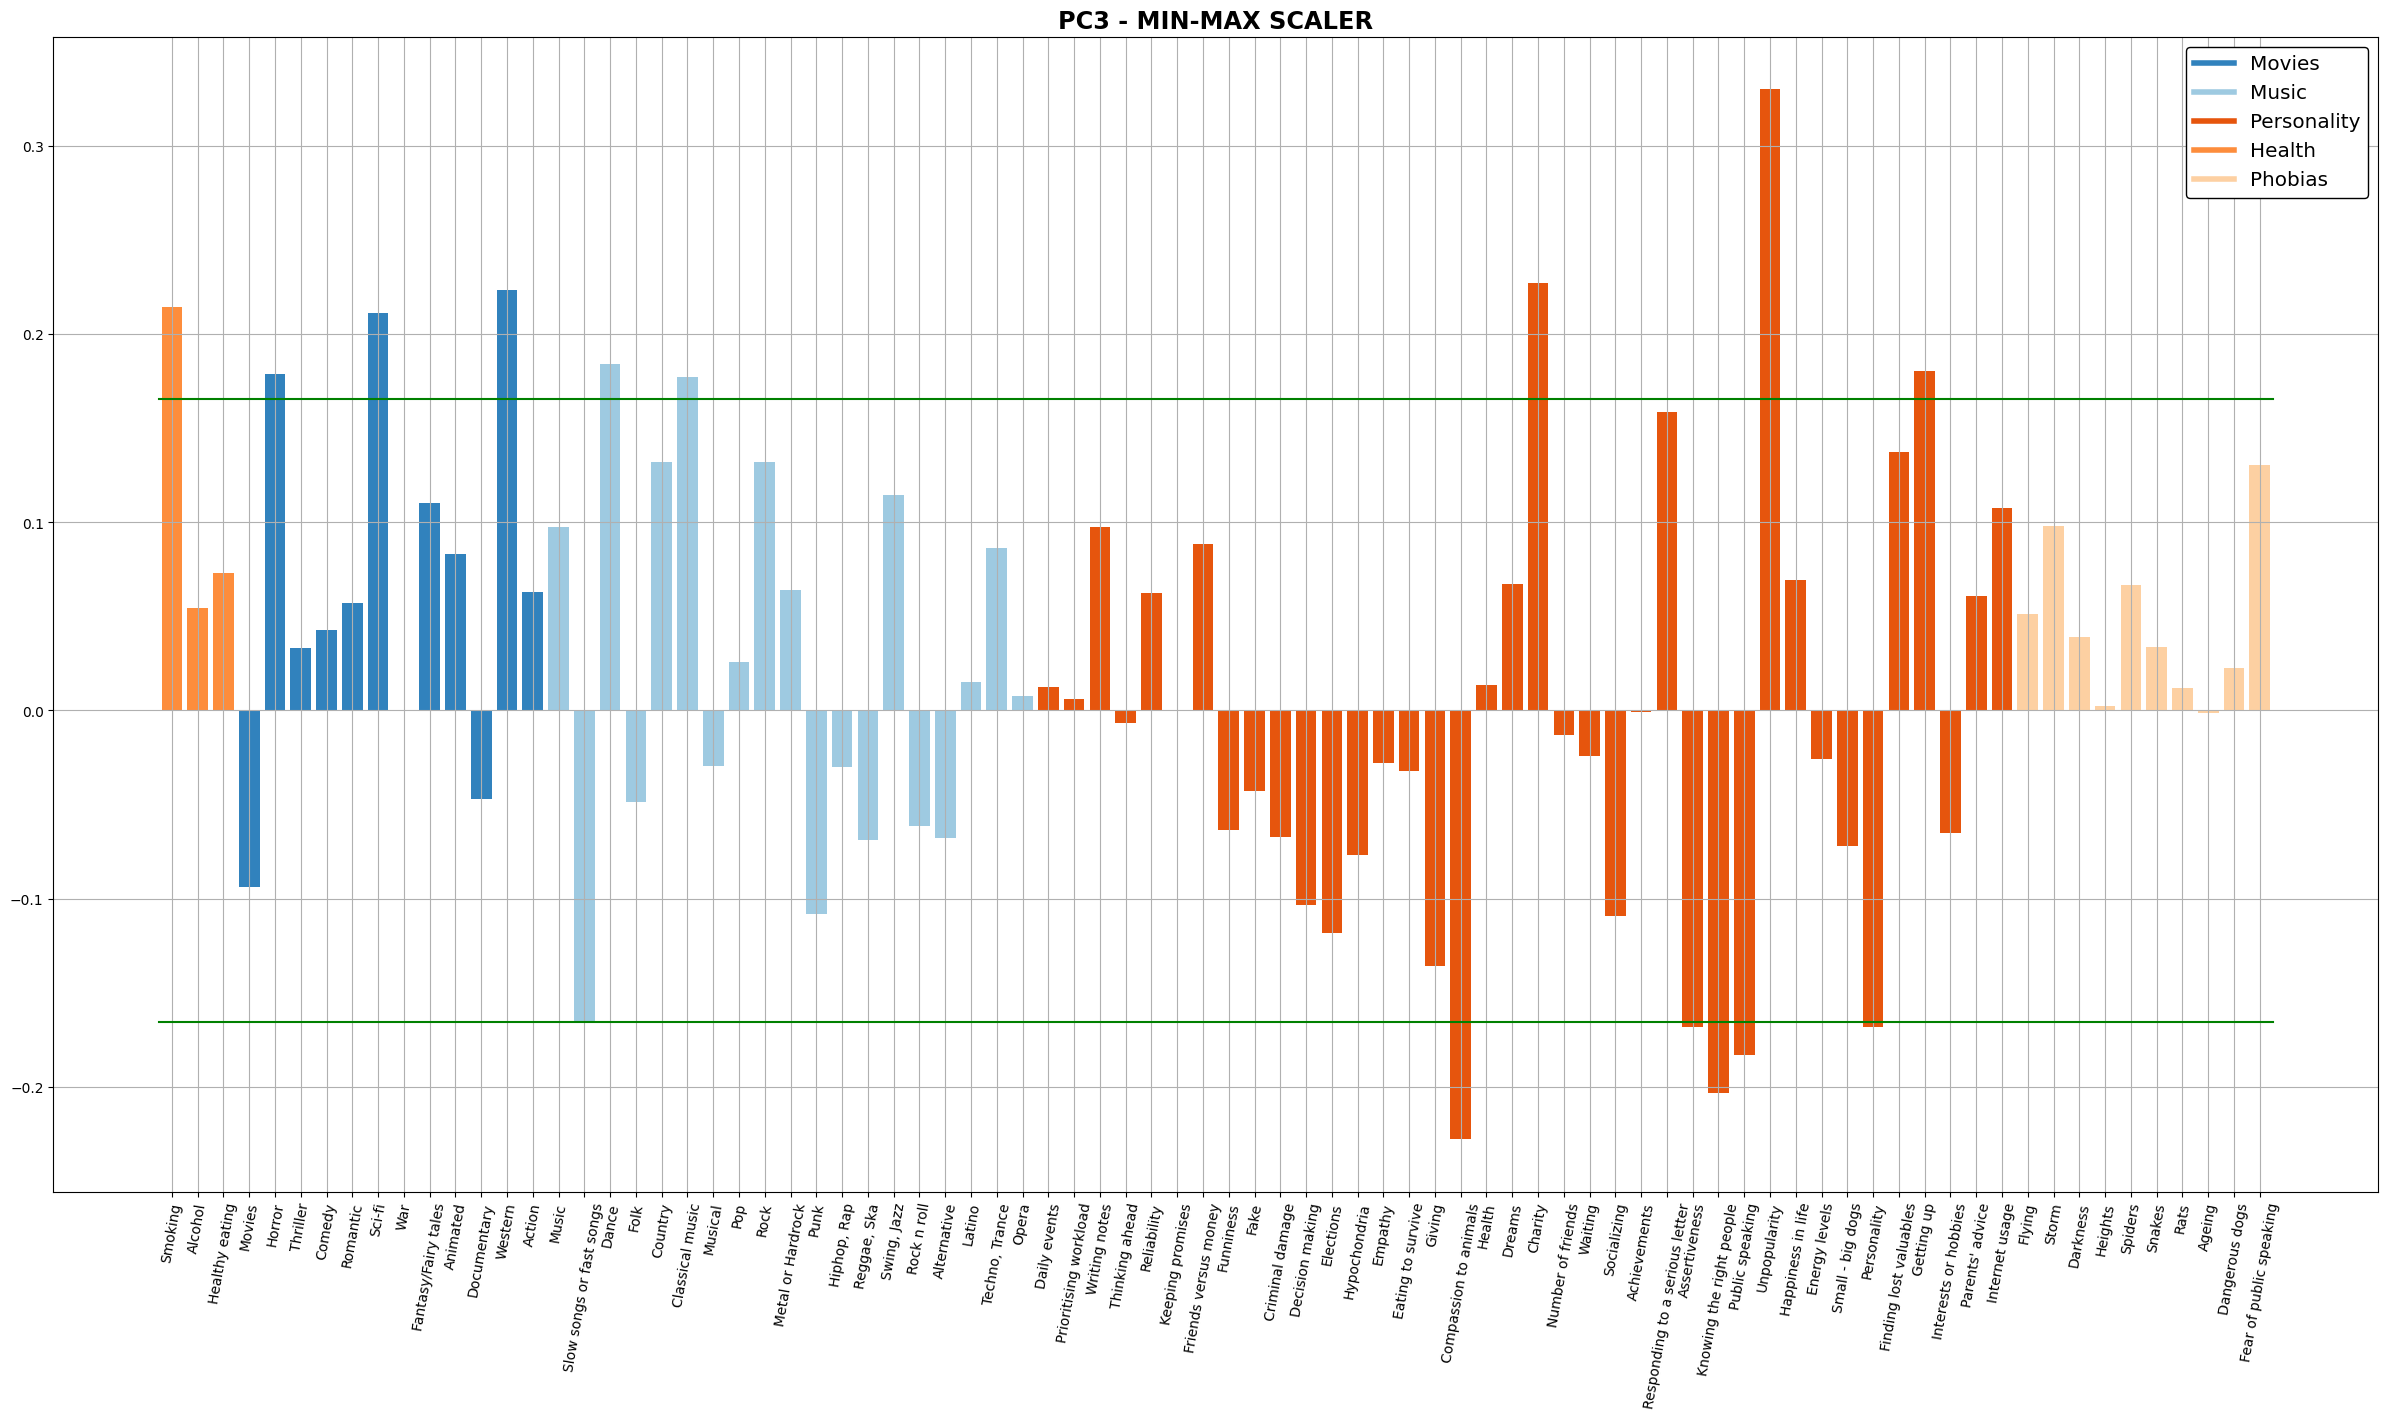


= PC3 - MIN-MAX SCALER
SIGNIFICANT POSITIVE FEATURES: ['Smoking', 'Horror', 'Sci-fi', 'Western', 'Dance', 'Classical music', 'Charity', 'Unpopularity', 'Getting up']
SIGNIFICANT NEGATIVE FEATURES: ['Compassion to animals', 'Assertiveness', 'Knowing the right people', 'Public speaking', 'Personality']


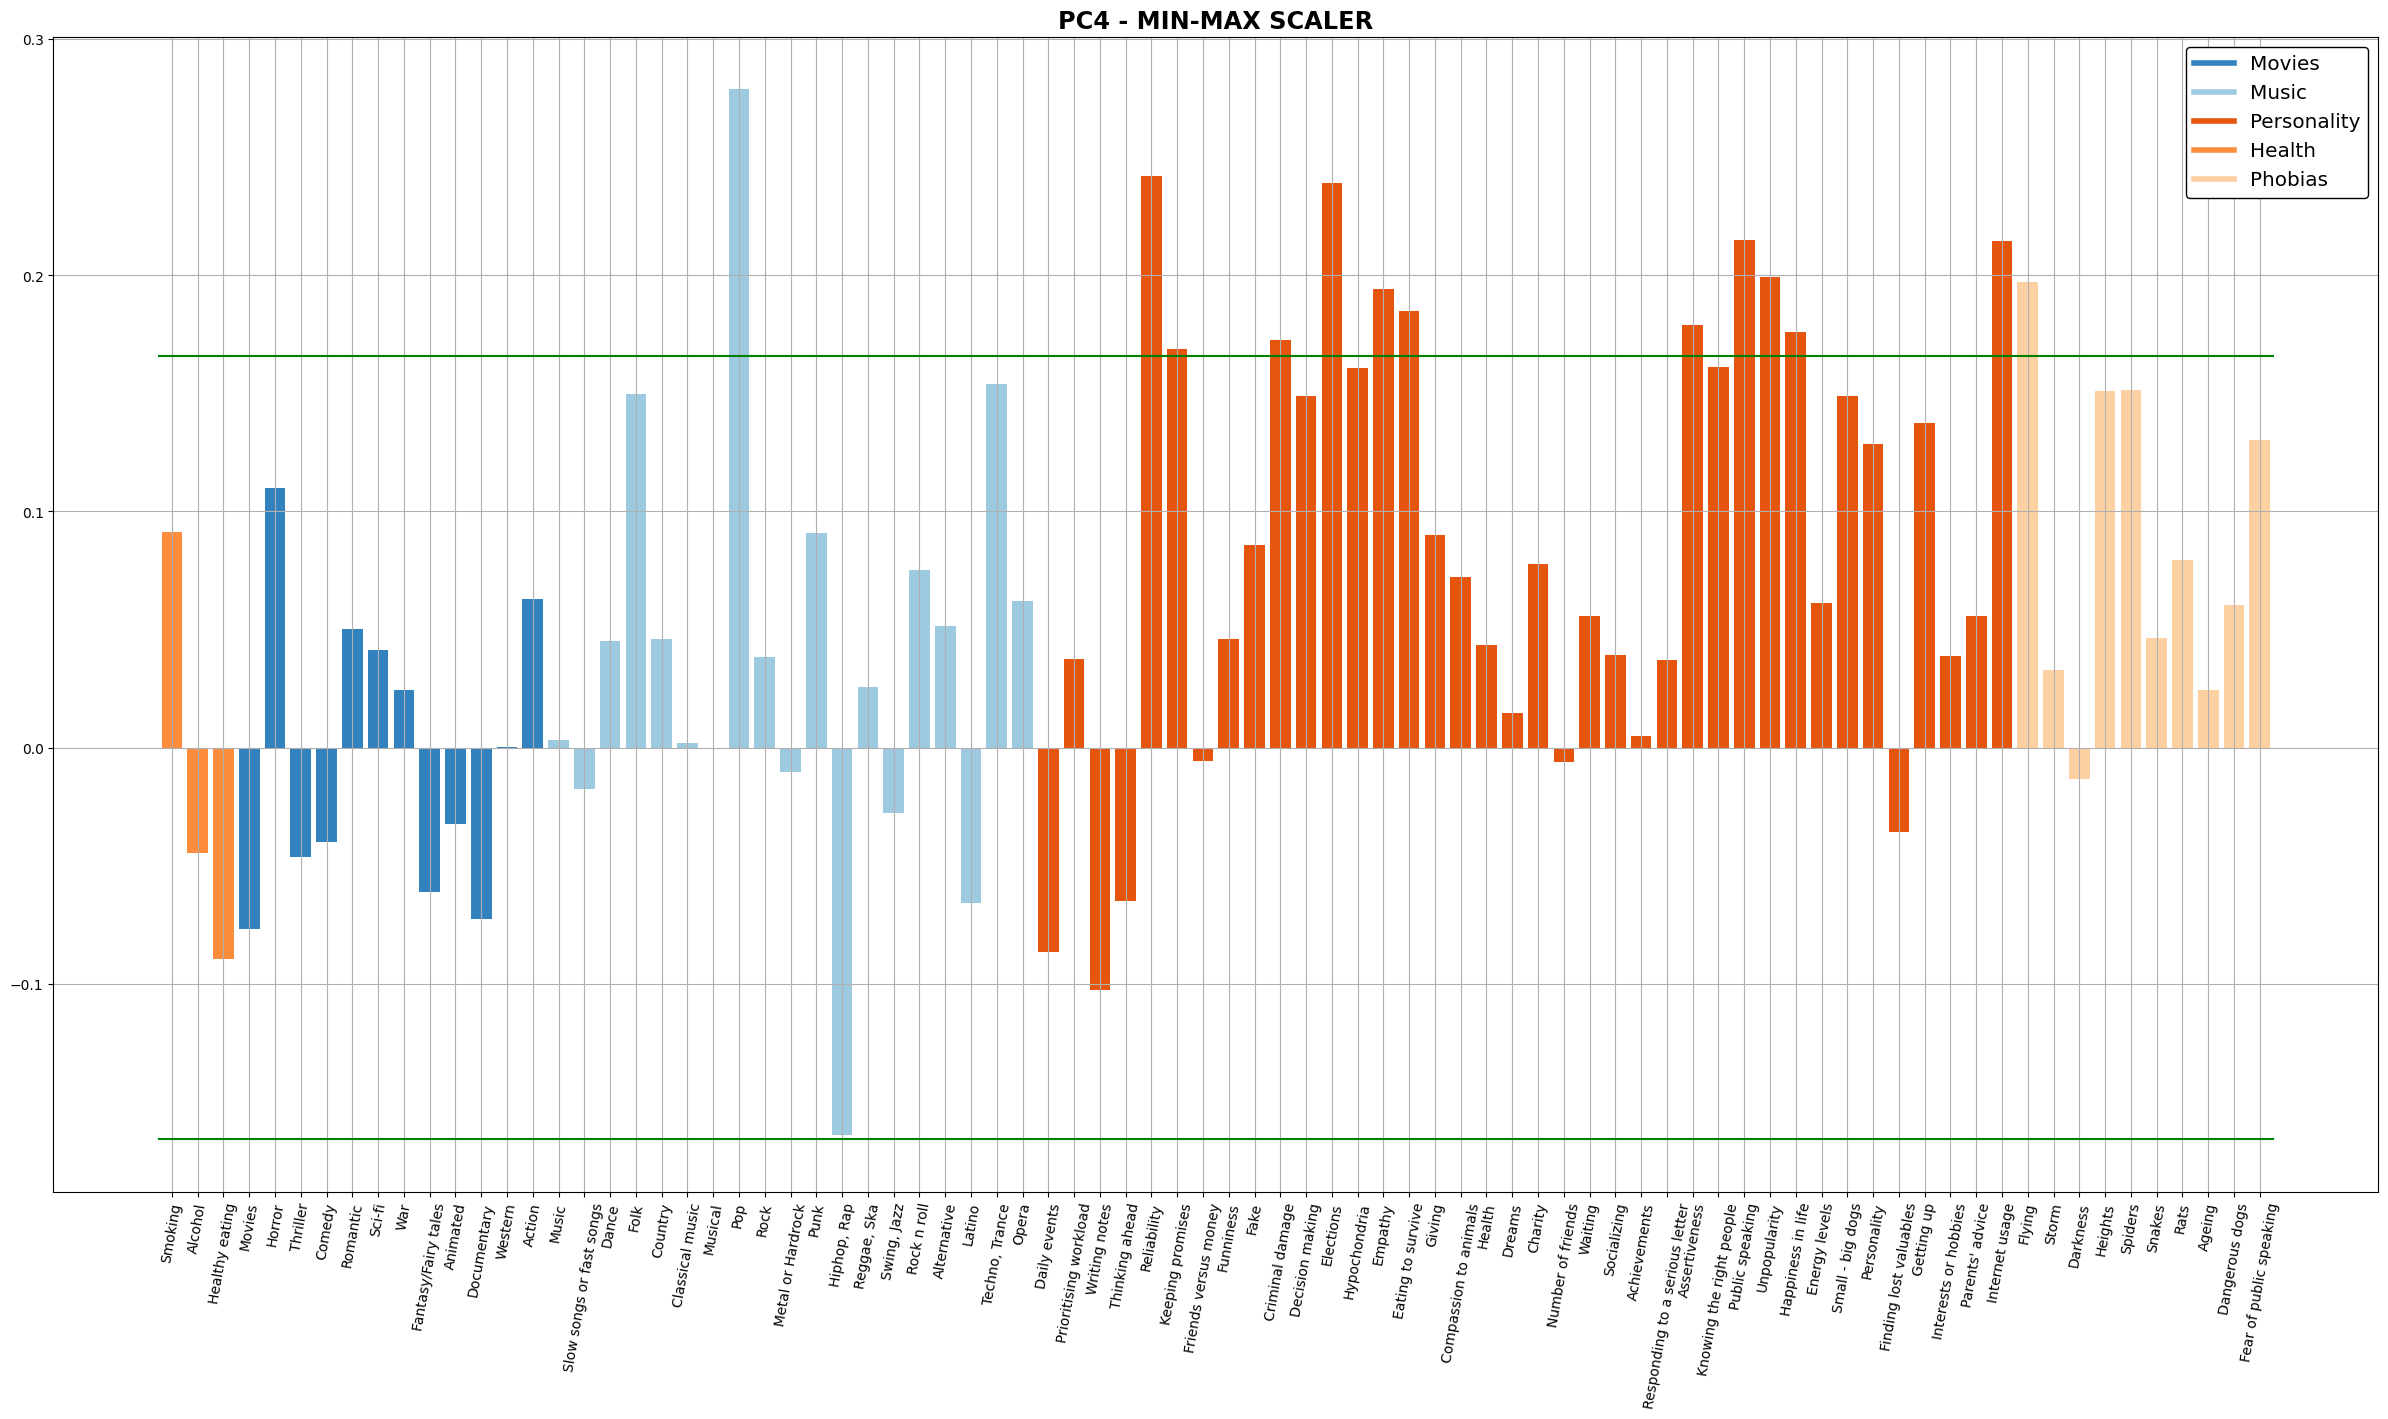


= PC4 - MIN-MAX SCALER
SIGNIFICANT POSITIVE FEATURES: ['Pop', 'Reliability', 'Keeping promises', 'Criminal damage', 'Elections', 'Empathy', 'Eating to survive', 'Assertiveness', 'Public speaking', 'Unpopularity', 'Happiness in life', 'Internet usage', 'Flying']
SIGNIFICANT NEGATIVE FEATURES: []


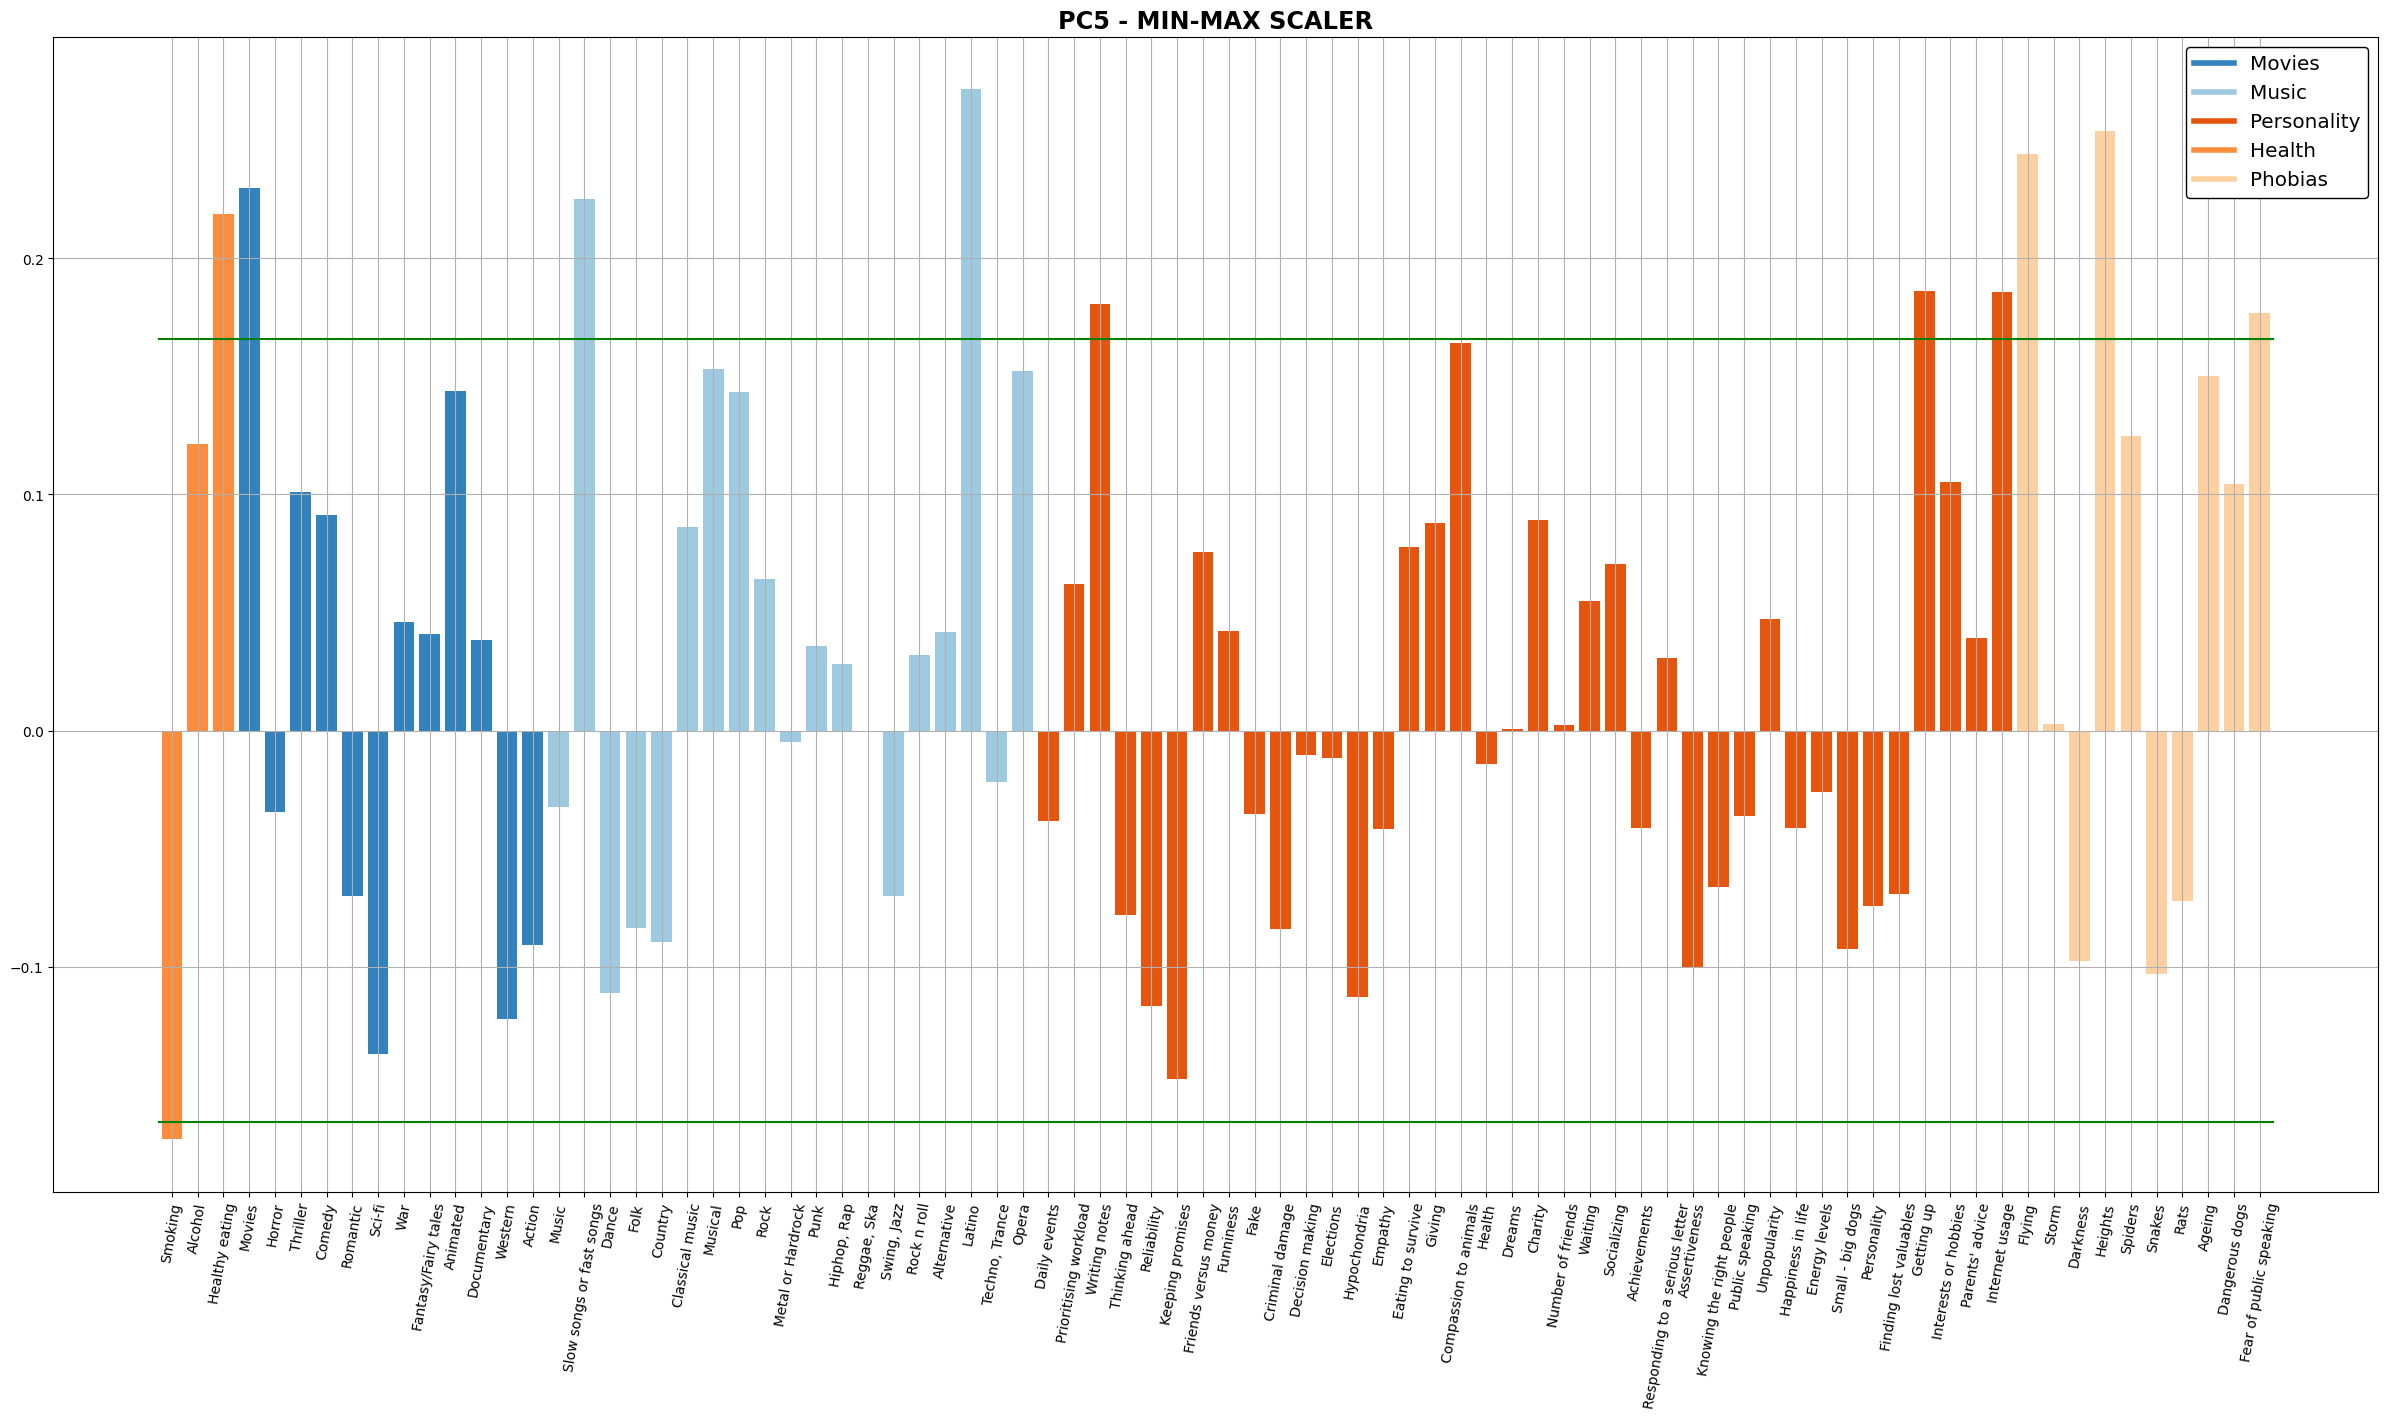


= PC5 - MIN-MAX SCALER
SIGNIFICANT POSITIVE FEATURES: ['Healthy eating', 'Movies', 'Slow songs or fast songs', 'Latino', 'Writing notes', 'Getting up', 'Internet usage', 'Flying', 'Heights', 'Fear of public speaking']
SIGNIFICANT NEGATIVE FEATURES: ['Smoking']


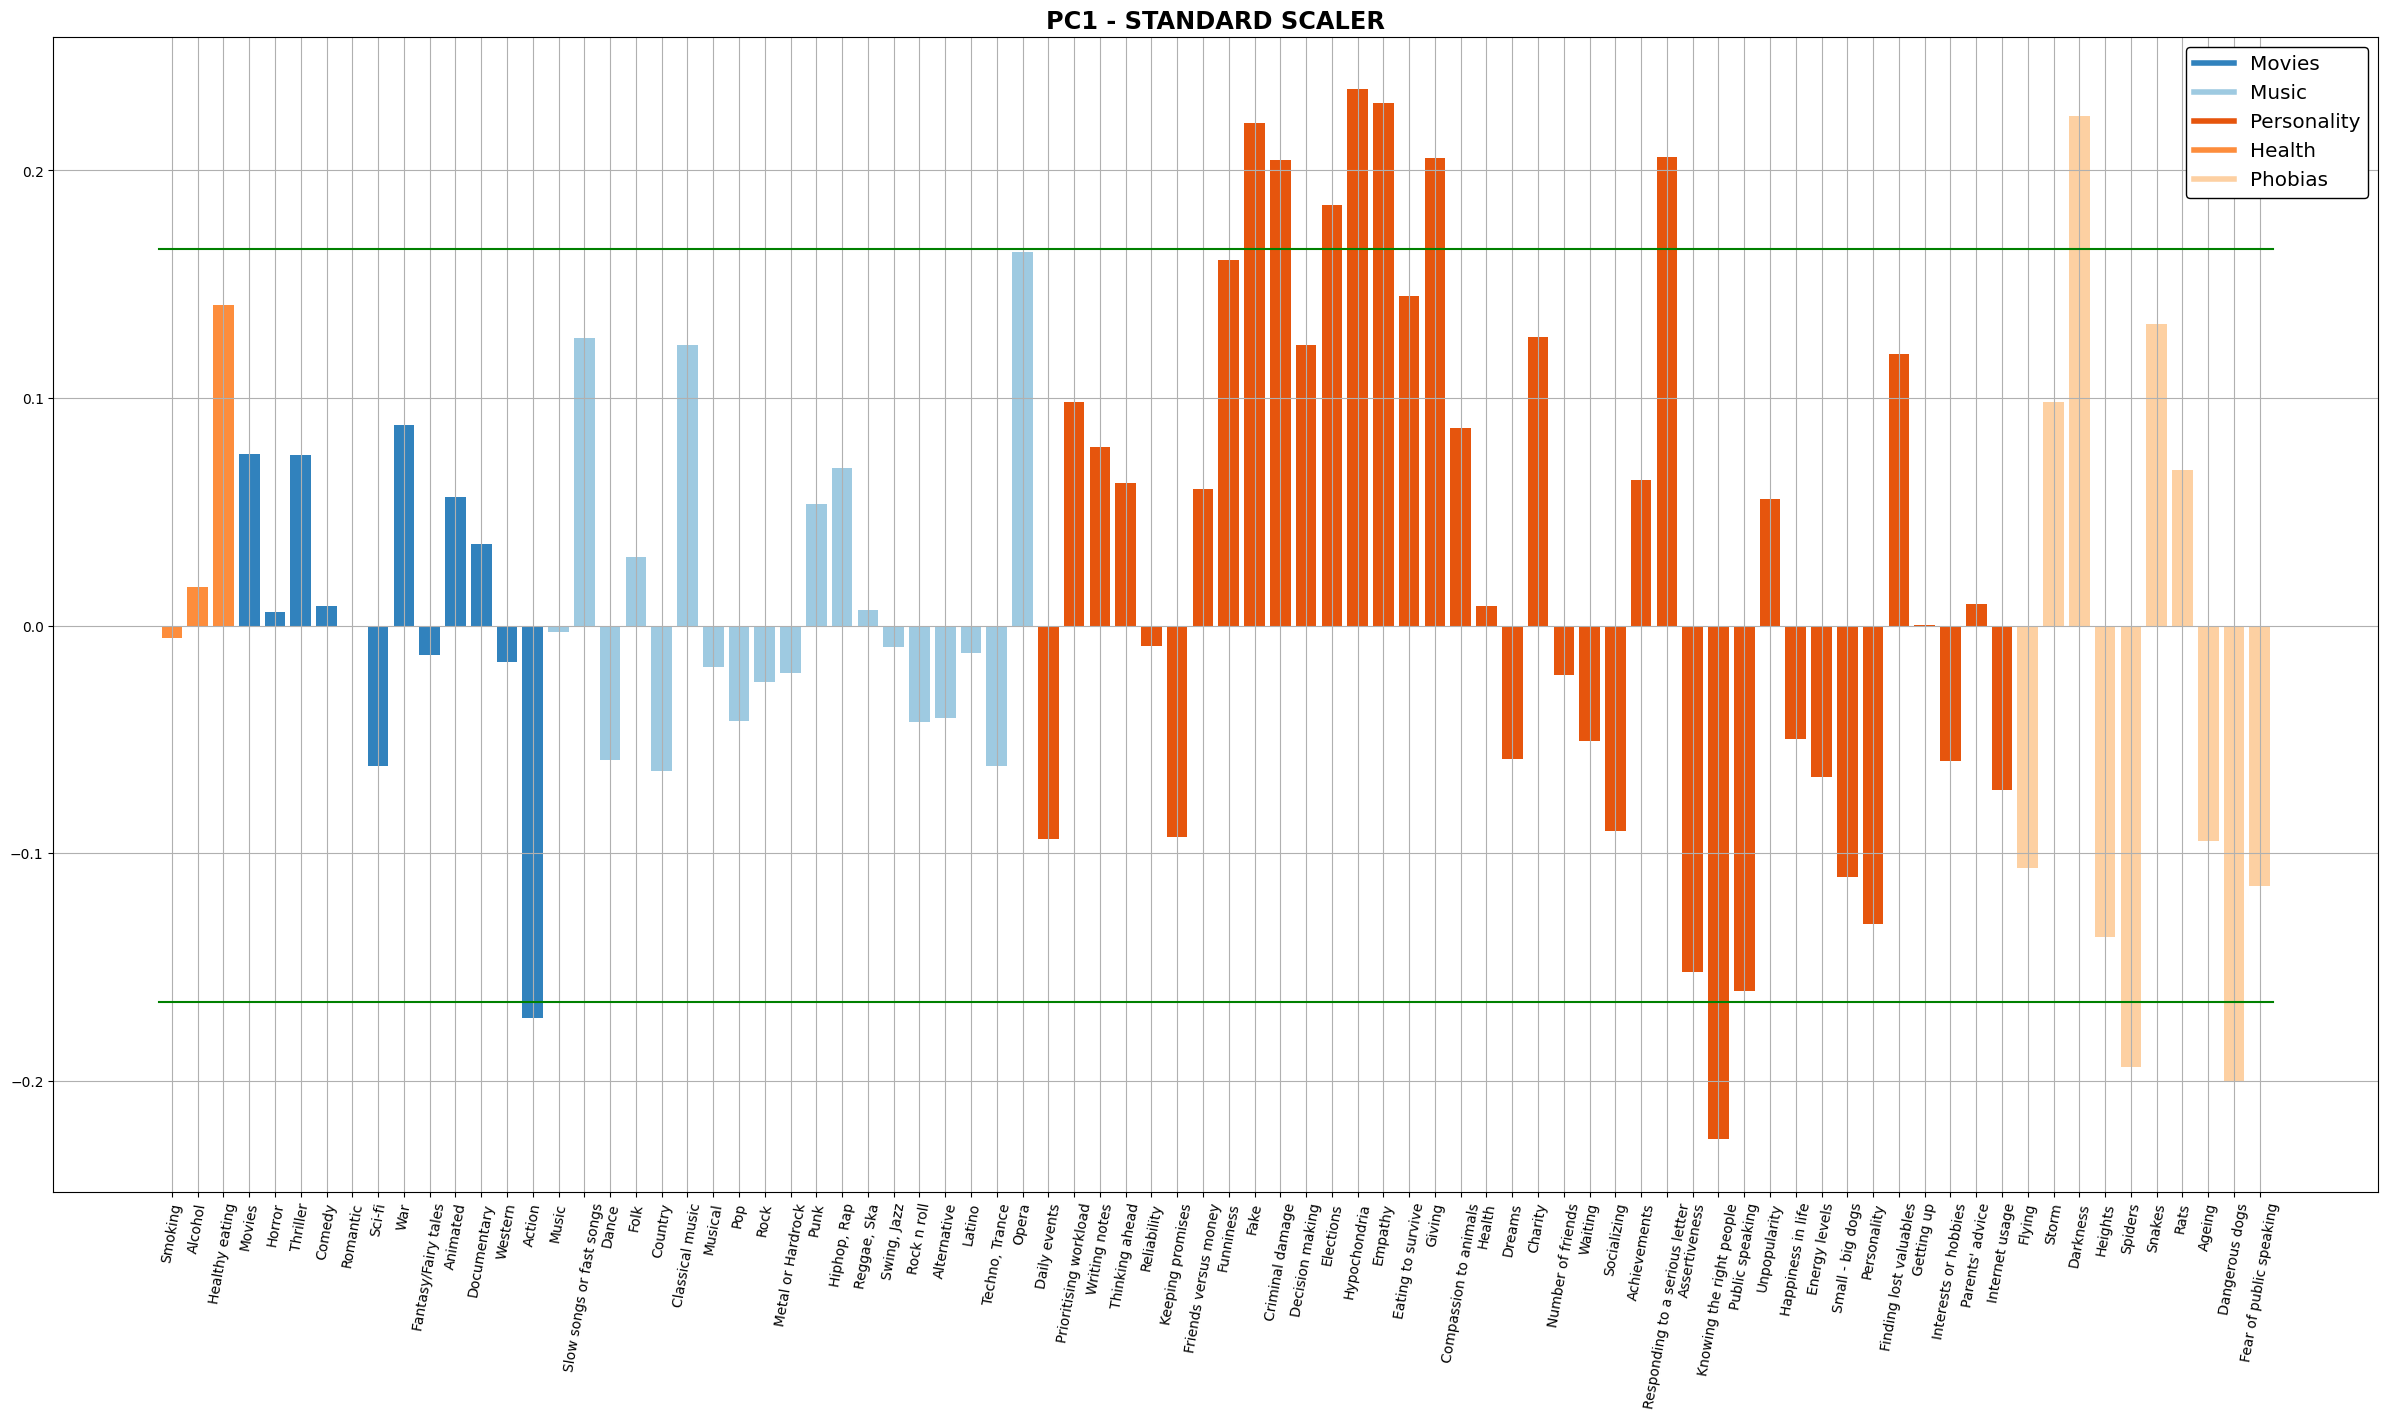


= PC1 - STANDARD SCALER
SIGNIFICANT POSITIVE FEATURES: ['Fake', 'Criminal damage', 'Elections', 'Hypochondria', 'Empathy', 'Giving', 'Responding to a serious letter', 'Darkness']
SIGNIFICANT NEGATIVE FEATURES: ['Action', 'Knowing the right people', 'Spiders', 'Dangerous dogs']


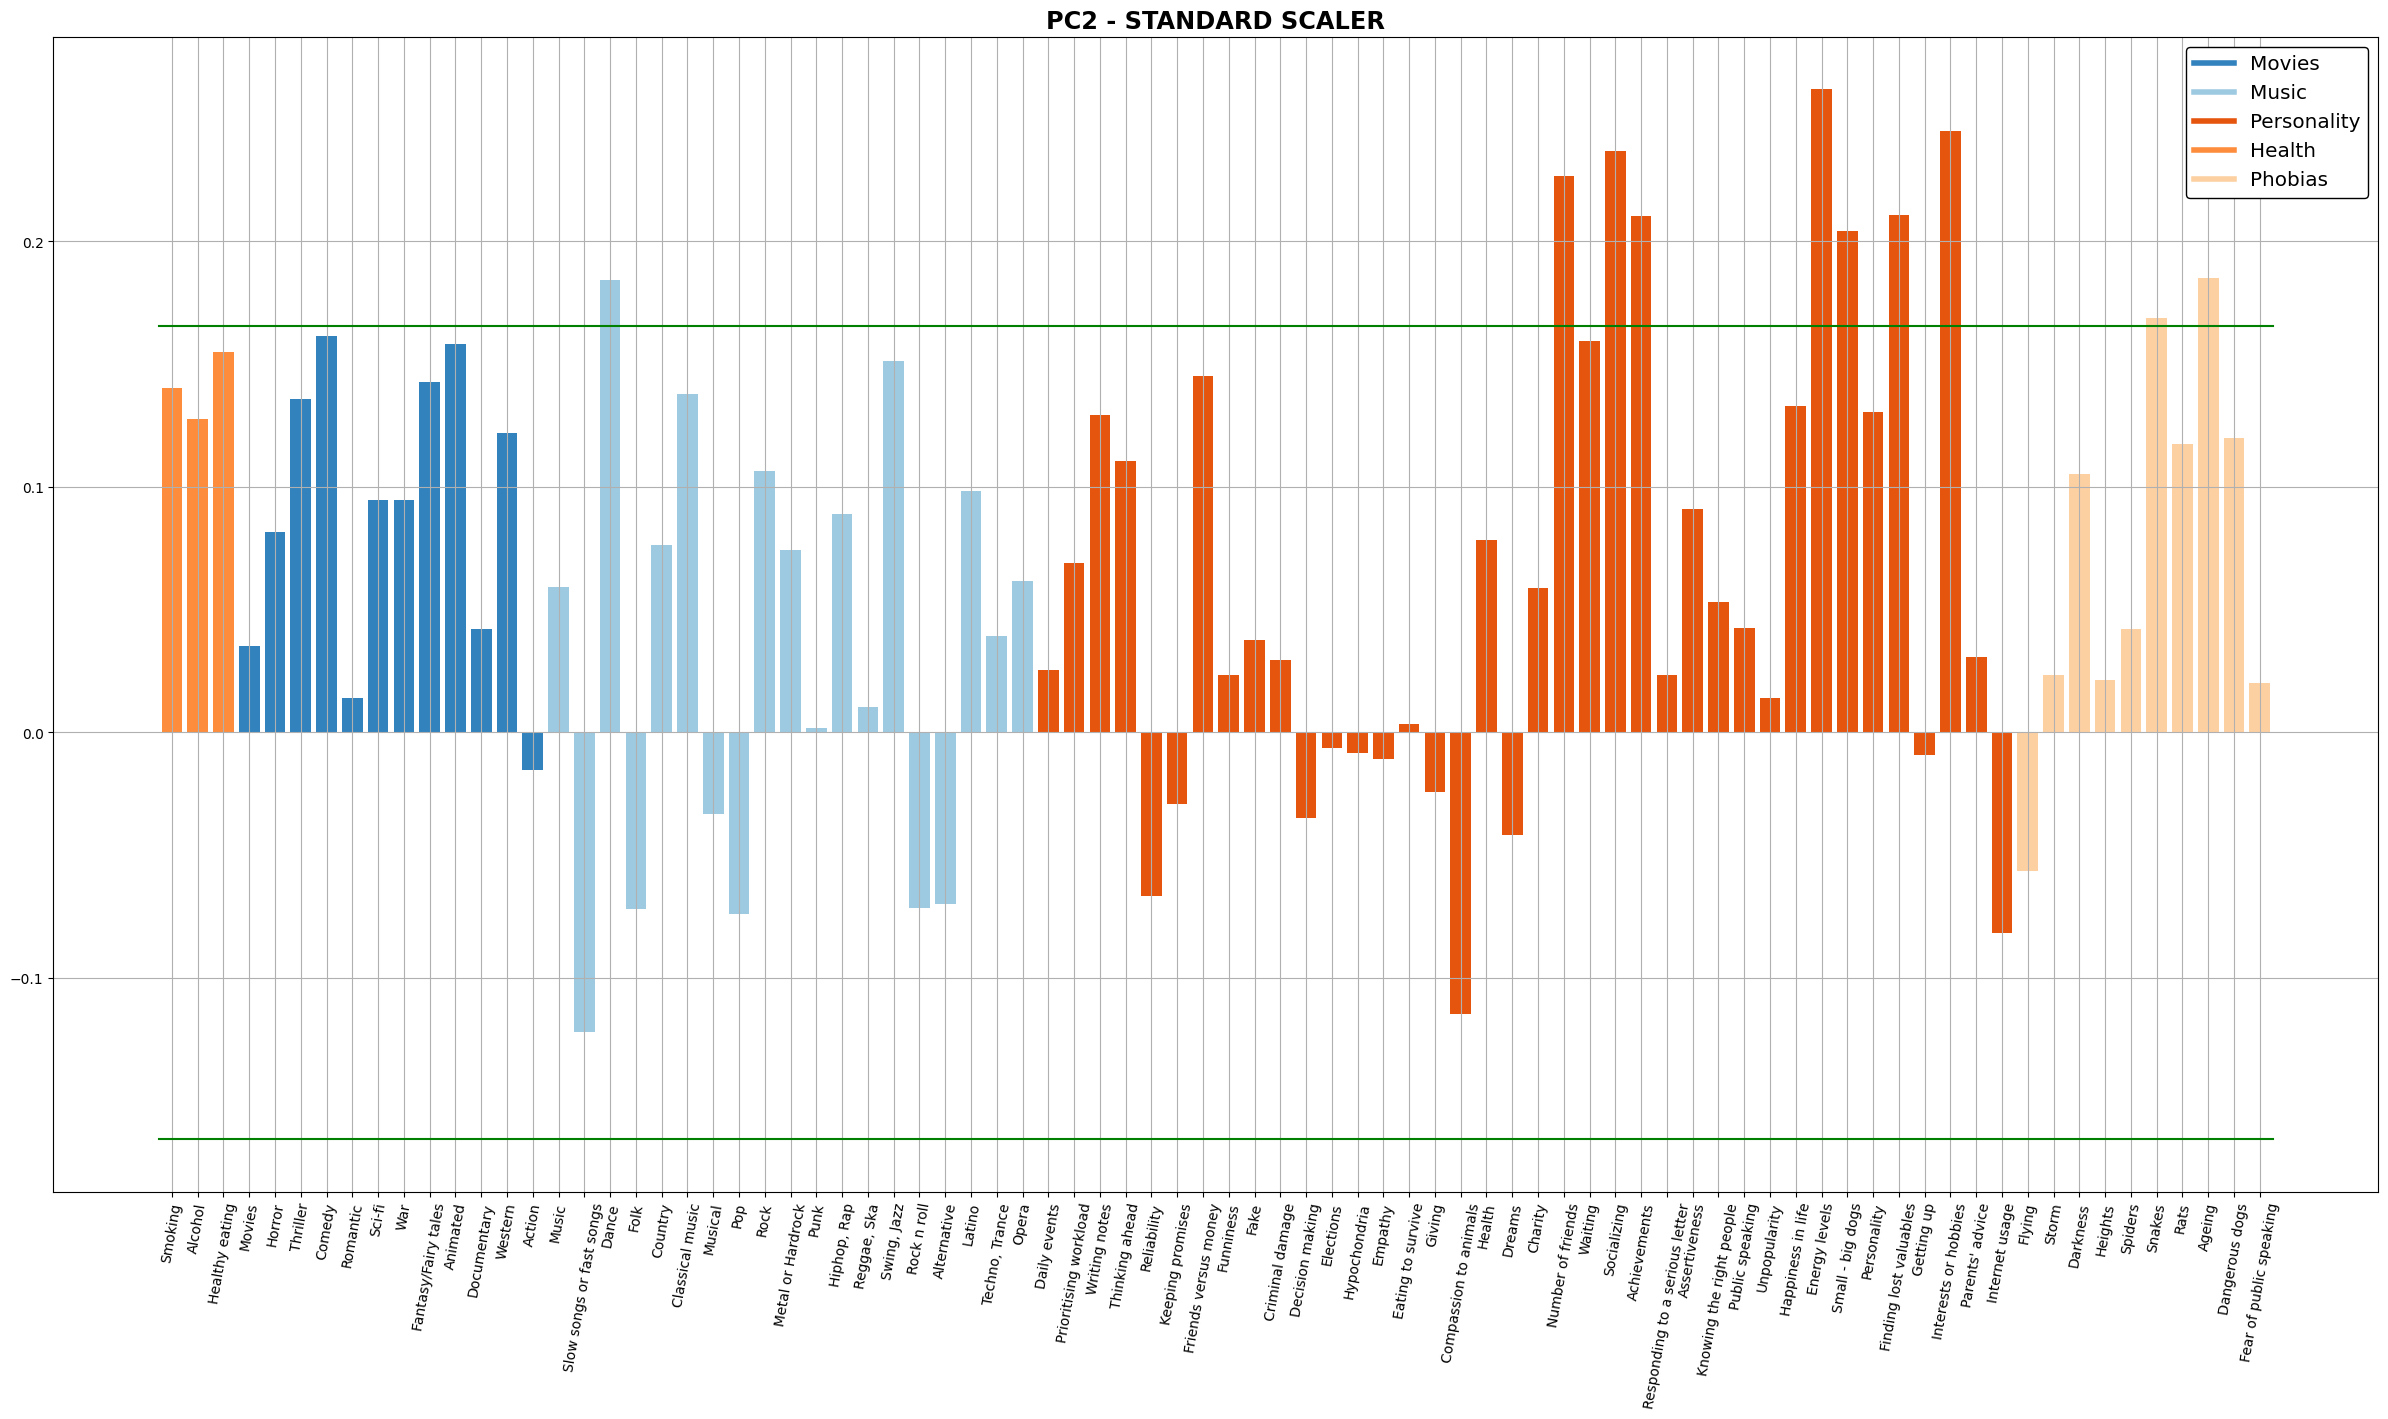


= PC2 - STANDARD SCALER
SIGNIFICANT POSITIVE FEATURES: ['Dance', 'Number of friends', 'Socializing', 'Achievements', 'Energy levels', 'Small - big dogs', 'Finding lost valuables', 'Interests or hobbies', 'Snakes', 'Ageing']
SIGNIFICANT NEGATIVE FEATURES: []


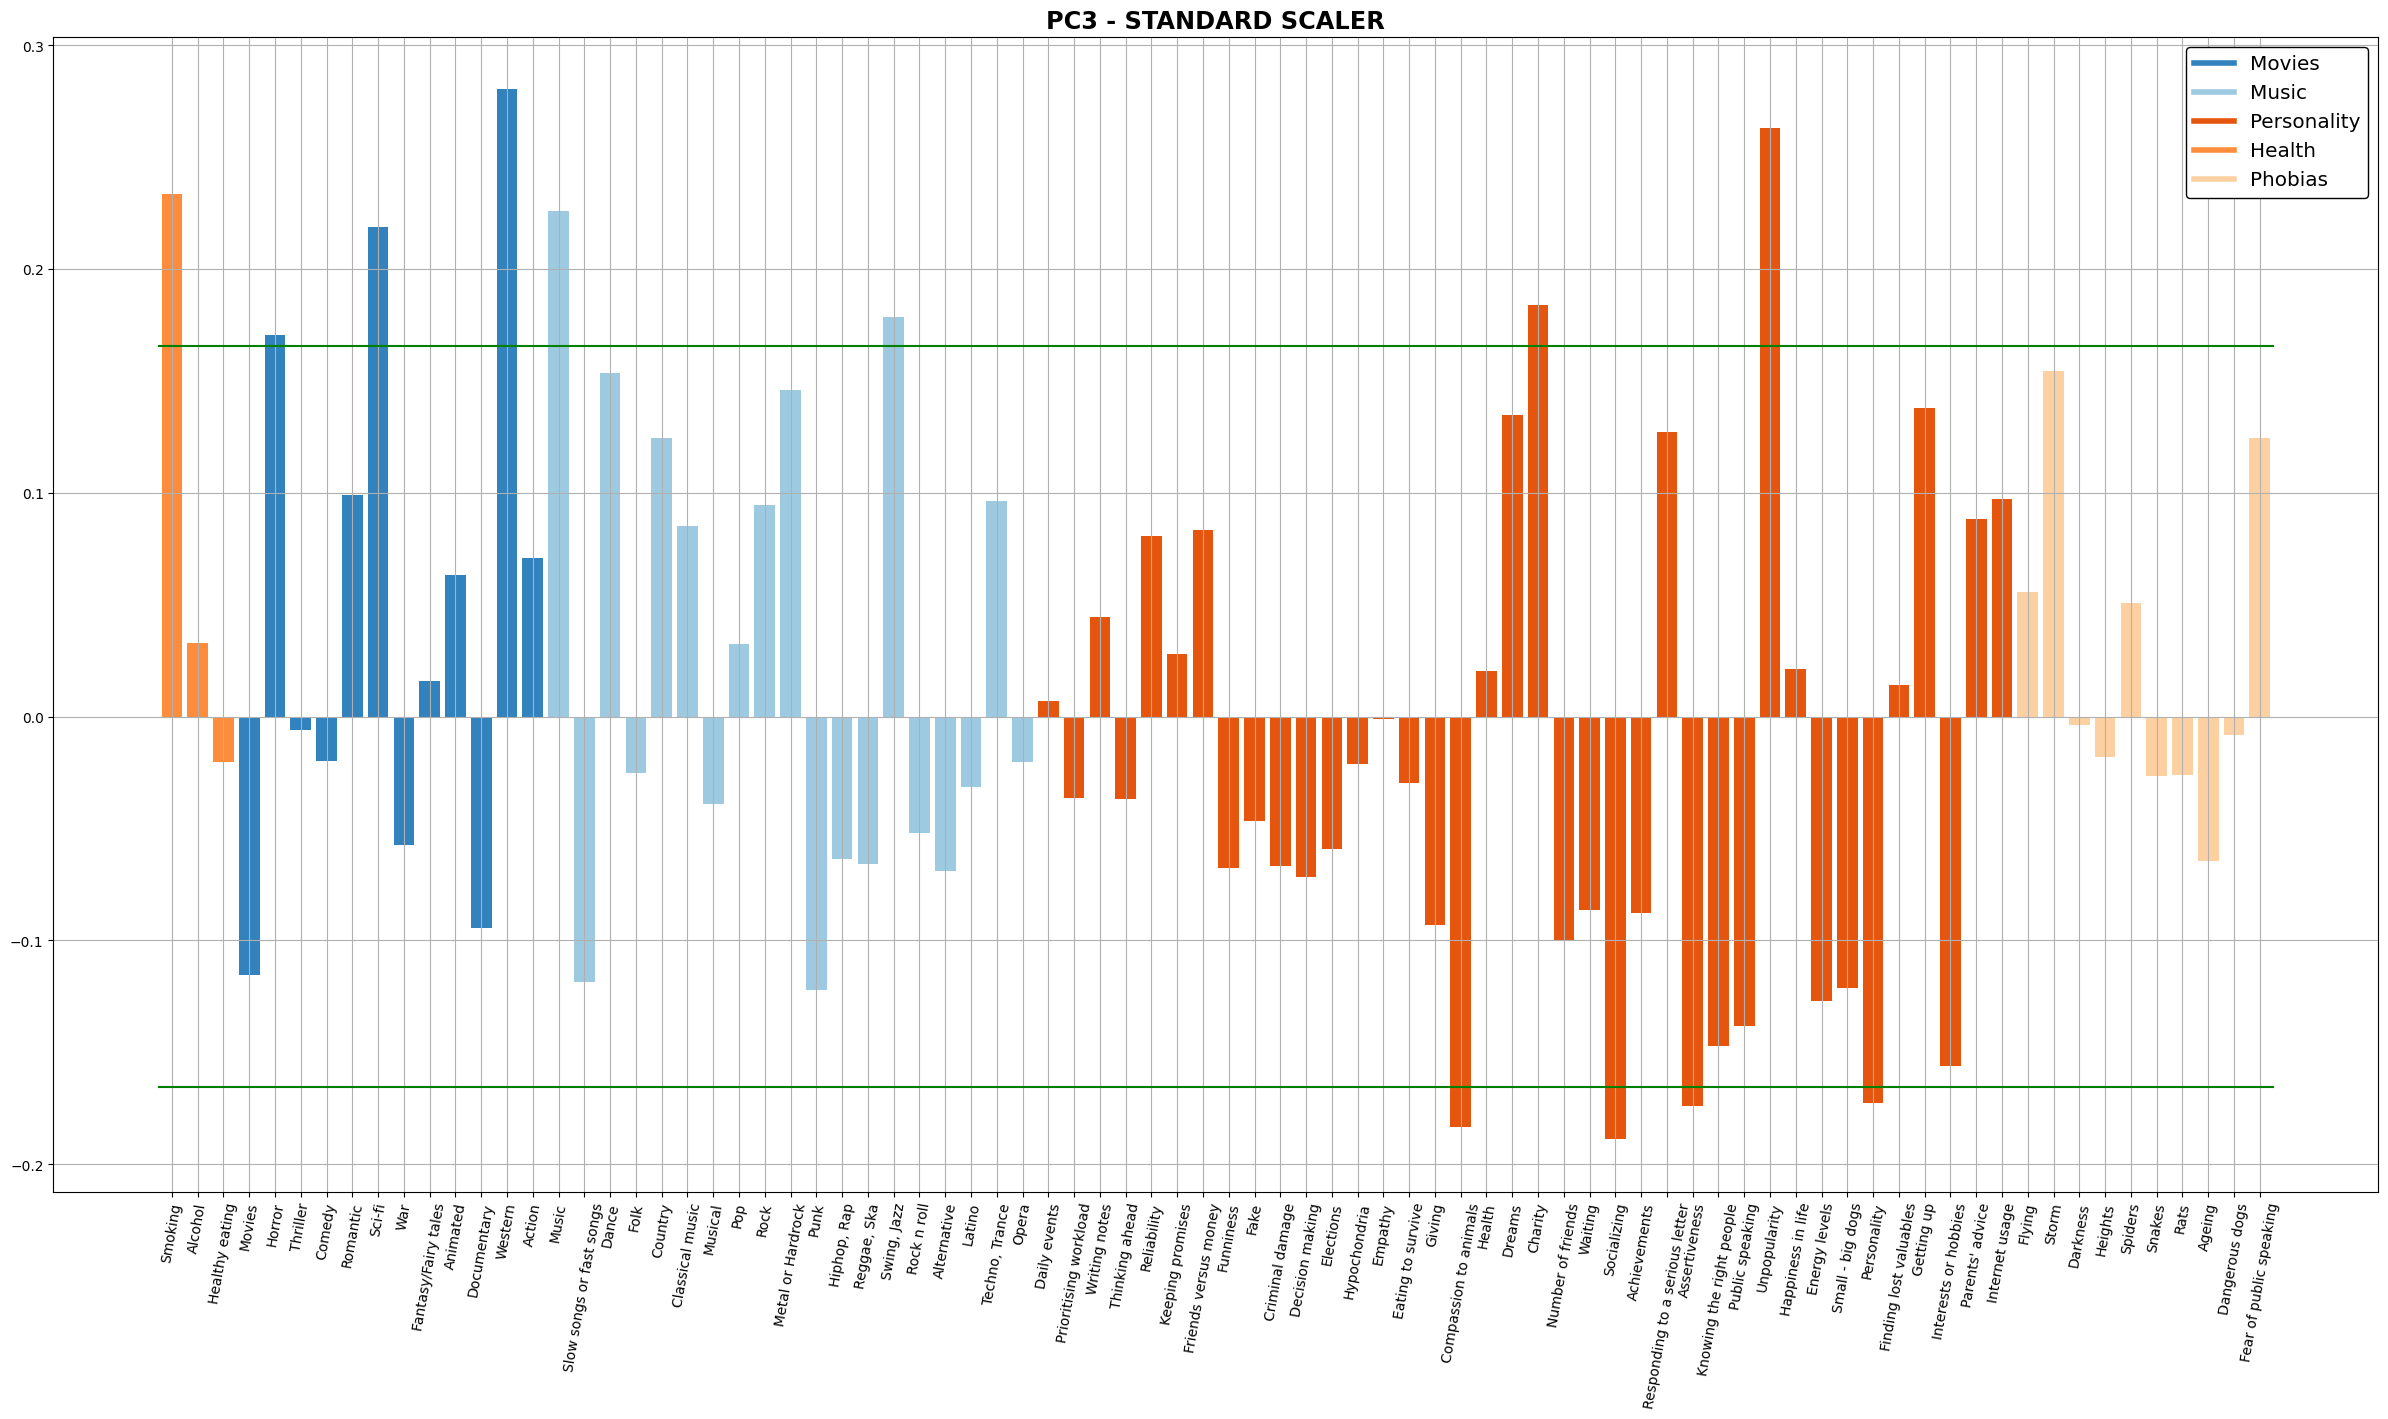


= PC3 - STANDARD SCALER
SIGNIFICANT POSITIVE FEATURES: ['Smoking', 'Horror', 'Sci-fi', 'Western', 'Music', 'Swing, Jazz', 'Charity', 'Unpopularity']
SIGNIFICANT NEGATIVE FEATURES: ['Compassion to animals', 'Socializing', 'Assertiveness', 'Personality']


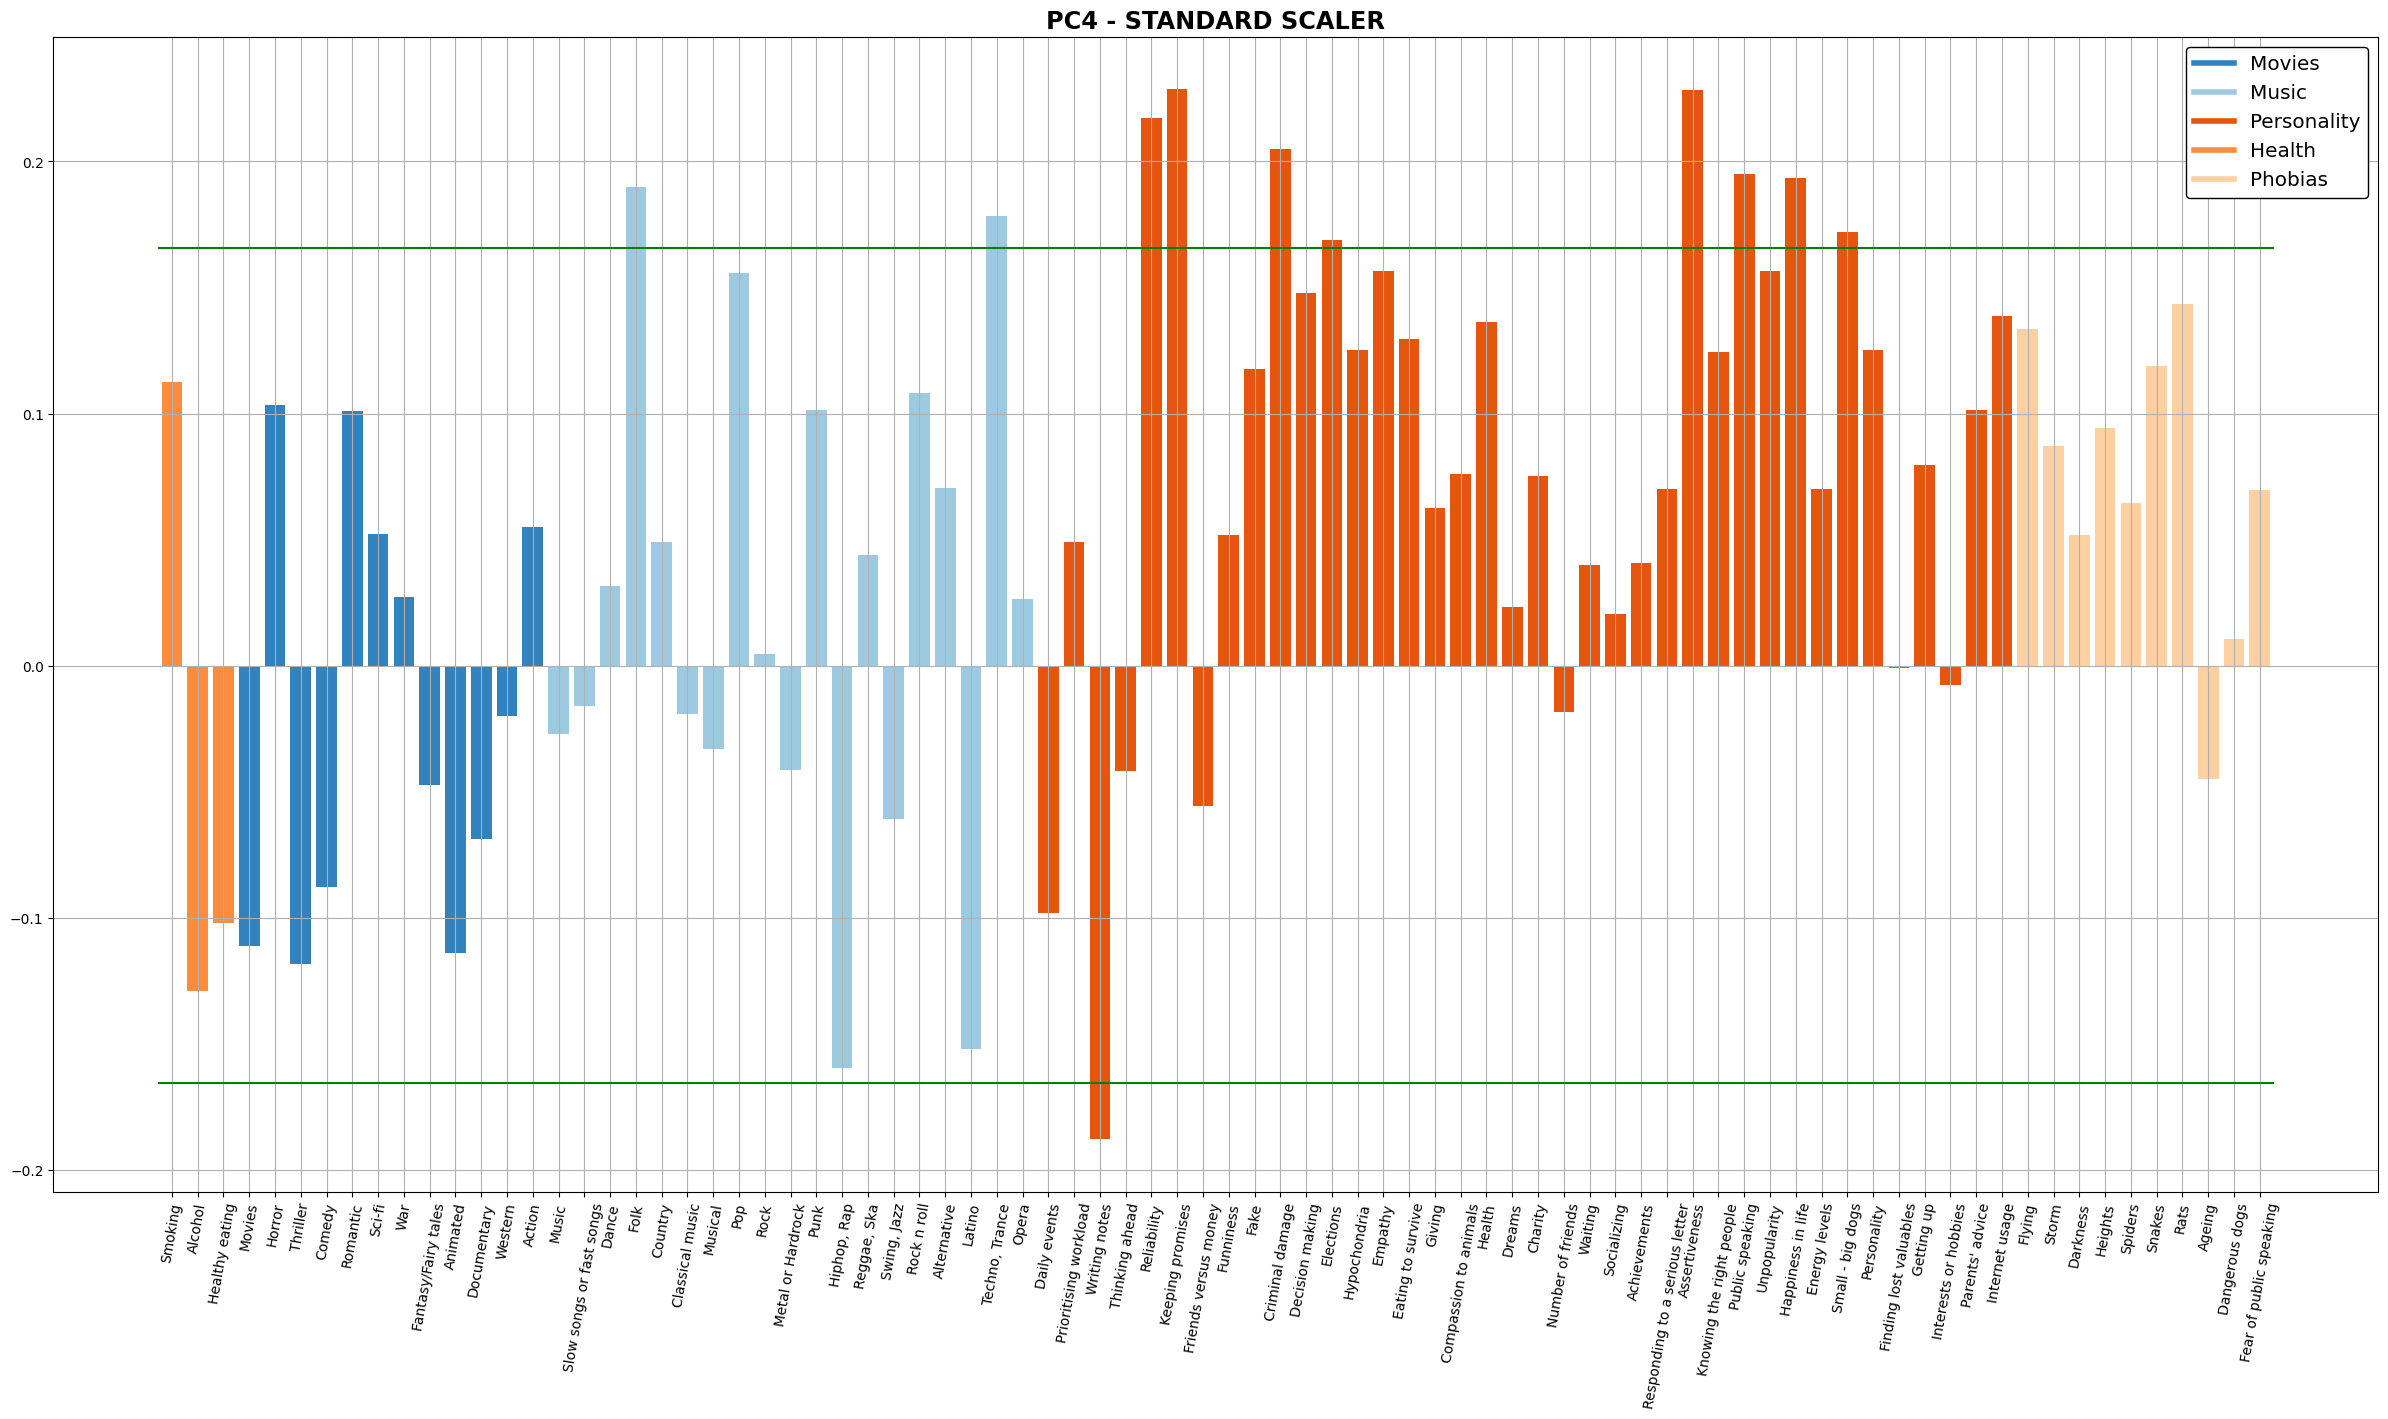


= PC4 - STANDARD SCALER
SIGNIFICANT POSITIVE FEATURES: ['Folk', 'Techno, Trance', 'Reliability', 'Keeping promises', 'Criminal damage', 'Elections', 'Assertiveness', 'Public speaking', 'Happiness in life', 'Small - big dogs']
SIGNIFICANT NEGATIVE FEATURES: ['Writing notes']


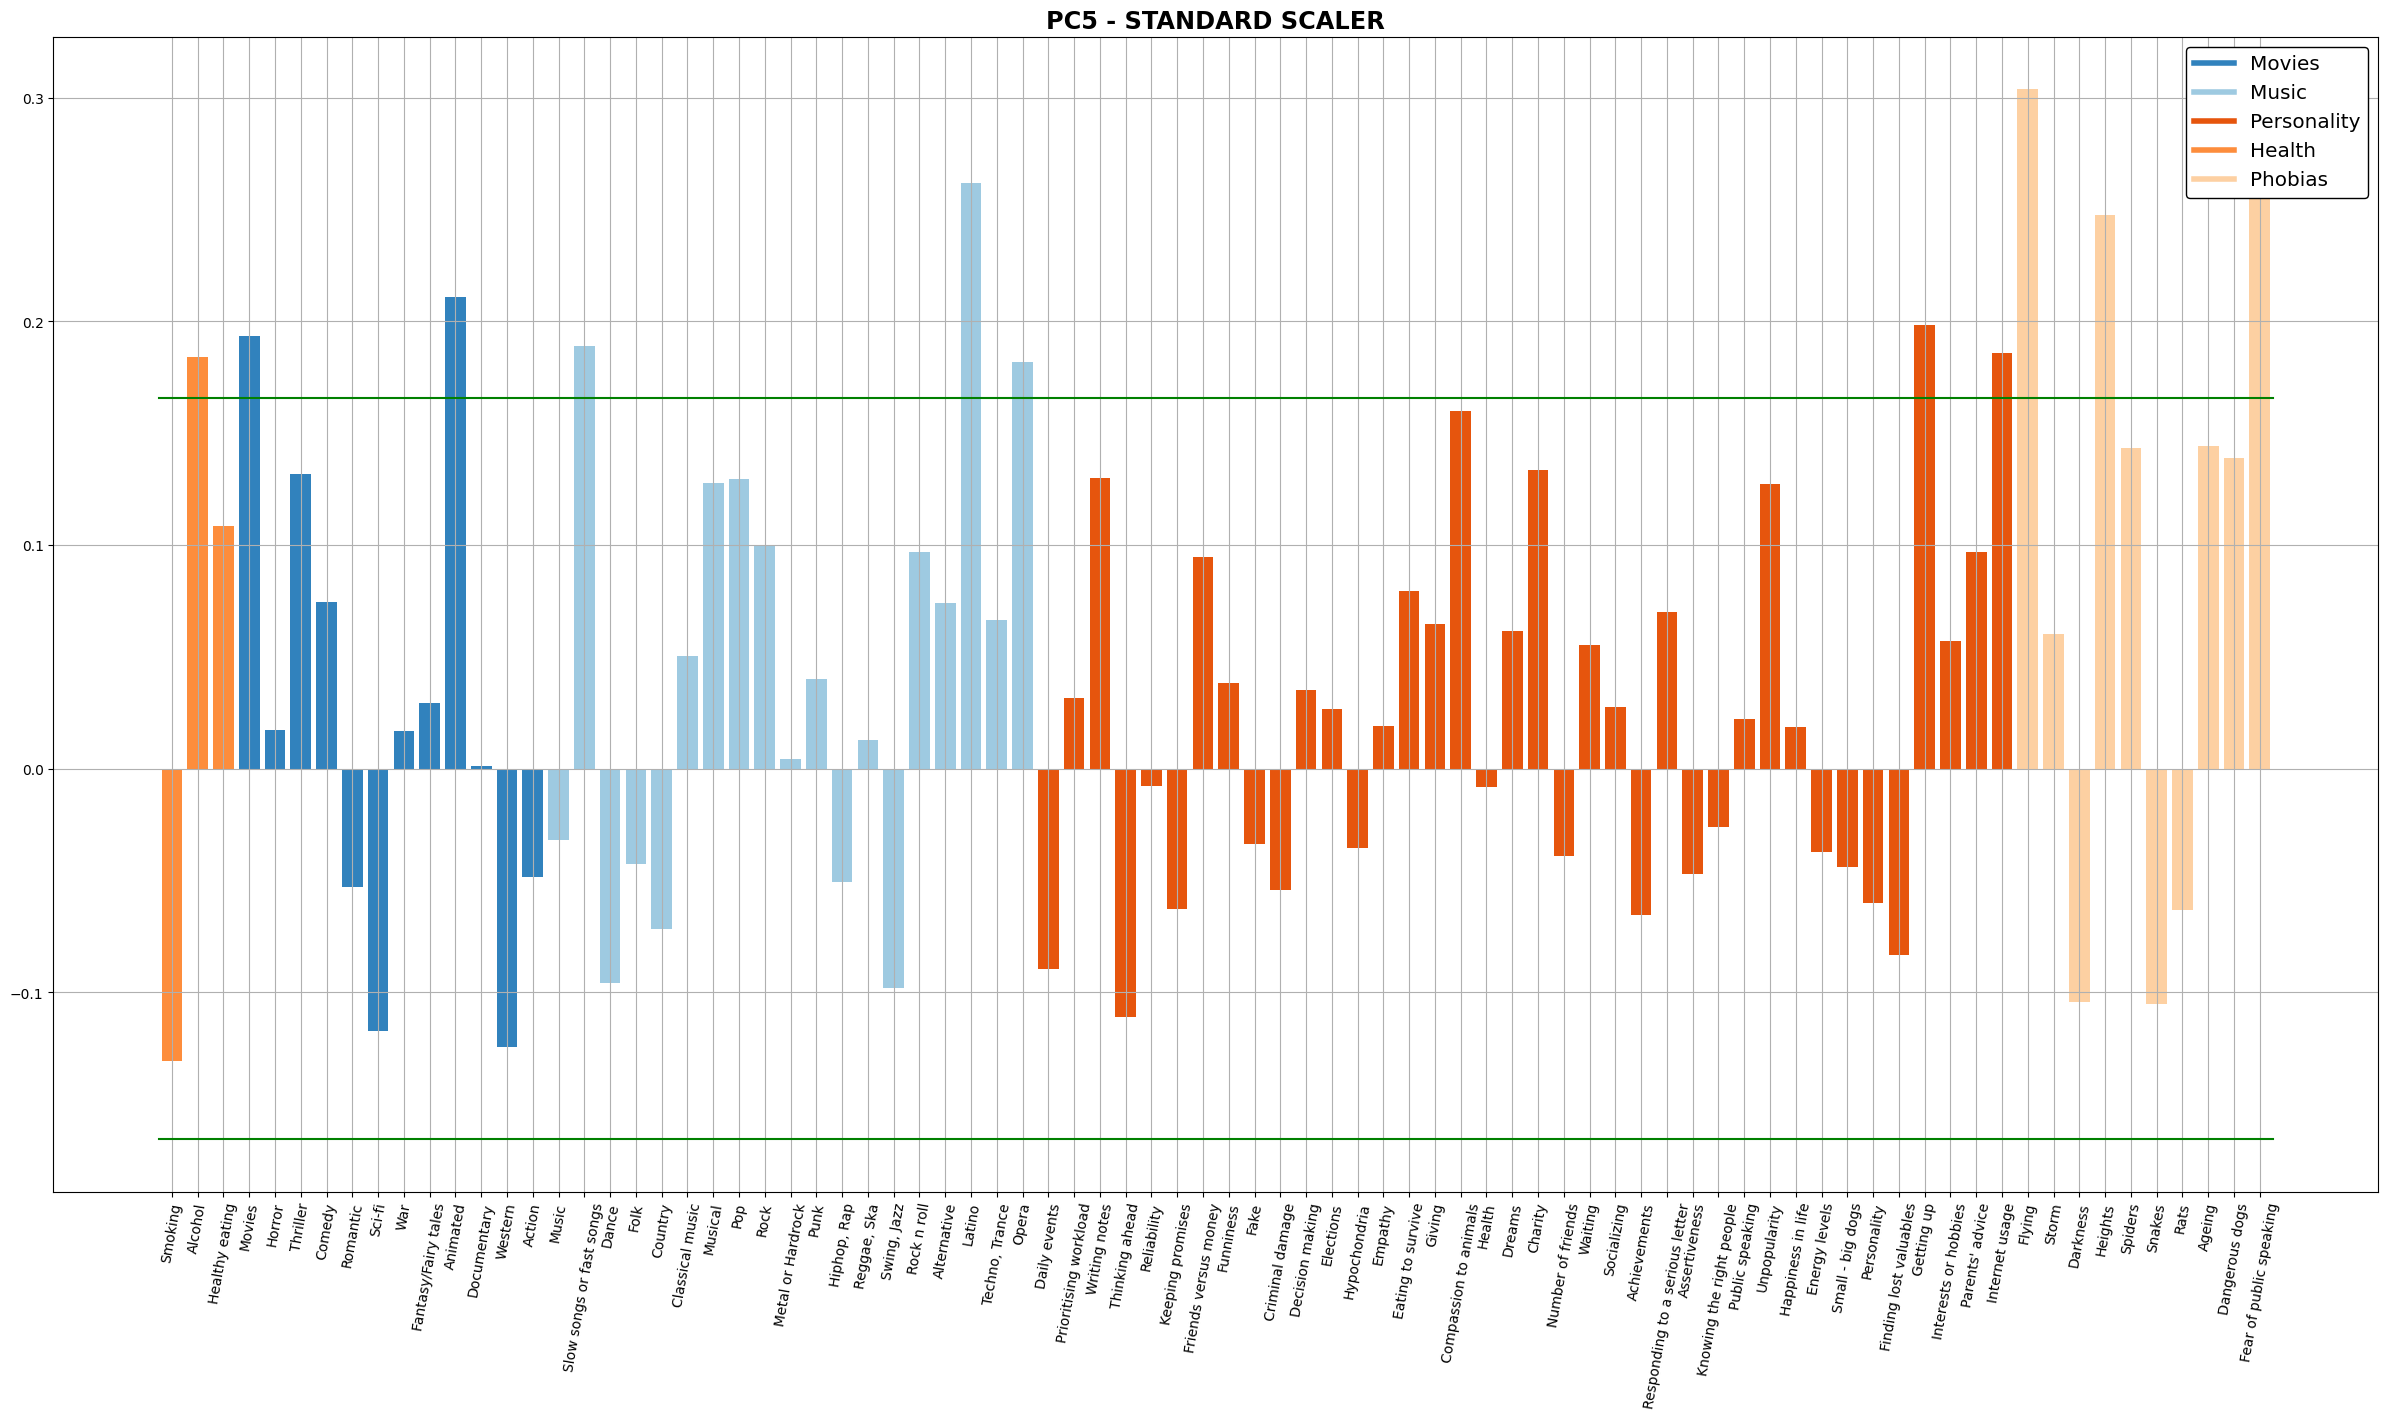


= PC5 - STANDARD SCALER
SIGNIFICANT POSITIVE FEATURES: ['Alcohol', 'Movies', 'Animated', 'Slow songs or fast songs', 'Latino', 'Opera', 'Getting up', 'Internet usage', 'Flying', 'Heights', 'Fear of public speaking']
SIGNIFICANT NEGATIVE FEATURES: []


In [ ]:
# Create a dictionary with only the features in 'these_features'
# categories: [features]
ourvariables={}
for key, value in variables_by_type.items():
  ourvariables[key] = [element for element in value if element in these_features]

# Remove keys with empty lists
# Let only categories in 'ourvariables' that have associated features
ourvariables = {key: value for key, value in ourvariables.items() if value}

# Define Colormaps for each category to have similar categories with similar colors
set2=plt.colormaps['tab20c'].colors
category_colors = {
    'Movies': set2[0],
    'Music': set2[2],
    'Personality': set2[4],
    'Health': set2[5],
    'Phobias': set2[7]
}

# Visualization of the colormap
plt.imshow([list(category_colors.values())])
plt.xticks(np.arange(len(category_colors)), list(category_colors.keys()), rotation=80)
plt.title('Colors by Variables')
plt.show()
colors_legend = [Line2D([0], [0], color=category_colors[k],lw=4) for k in category_colors.keys()]


# Flatten the lists of variables into a single list
cate_cols = []
for category, variables in ourvariables.items():
    cate_cols.extend(variables)

# Compute colors for each variables
component_colors = [
    category_colors[category]
    for category in ourvariables.keys()
    for _ in ourvariables[category]
]

# Function to plot PCA components
def plot_pca_components(pca, typescaler, cate_cols, component_colors, colors_legend):
    #Threshold to identify significant components
    eps = np.sqrt(1 / pca.n_features_in_) * 1.5

    #Compute a bar plot for each PCi
    for ii in range(pca.components_.shape[0]):
        plt.figure(figsize=(30, 15))
        plt.bar(
            np.arange(len(cate_cols)),
            pca.components_[ii, :],
            color=component_colors
        )

        # Plot the threshold lines
        plt.plot([-0.5, len(cate_cols) - 0.5], [eps, eps], 'green')
        plt.plot([-0.5, len(cate_cols) - 0.5], [-eps, -eps], 'green')

        plt.xticks(ticks=np.arange(len(cate_cols)), labels=cate_cols, rotation=80)
        plt.title(f'PC{ii + 1} - {typescaler}', fontsize='xx-large', fontweight='bold')
        plt.legend(
            handles=colors_legend,labels=list(category_colors.keys()),
            framealpha=1,fontsize='x-large',
            loc='upper right',edgecolor='black'
        )
        plt.grid()
        plt.show()

        # Identify the indices of the important original variables
        imp_pos_indices = np.argwhere(pca.components_[ii, :] >= eps).flatten()
        imp_neg_indices = np.argwhere(pca.components_[ii, :] <= -eps).flatten()
        #Identify the important variables
        imp_pos_features = [cate_cols[i] for i in imp_pos_indices]
        imp_neg_features = [cate_cols[i] for i in imp_neg_indices]

        # Print the results
        print(f'\n= PC{ii + 1} - {typescaler}')
        print(f'SIGNIFICANT POSITIVE FEATURES: {imp_pos_features}')
        print(f'SIGNIFICANT NEGATIVE FEATURES: {imp_neg_features}')


# Plot PCA components for MIN-MAX and STANDARD SCALER
plot_pca_components(pca_mm, 'MIN-MAX SCALER', cate_cols, component_colors, colors_legend)
plot_pca_components(pca_std, 'STANDARD SCALER', cate_cols, component_colors, colors_legend)

###Interpretation of the PCs


In [ ]:
pc_names_mm = ['Inner Conflict: Sensitivity and Violence',
              'Enthusiastic and Healthy Lifestyle',
              ' (+)Unconventional Creativity vs. Apathetic(-)',
              'Emotional Resilience and Social Validation',
              '(+)Healthy Discipline vs. Risk (-) and Dependence']

pc_names_std = ['Inner Conflict: Sensitivity and Violence',
              'Enthusiastic Lifestyle',
              ' (+) Unconventional Creativity vs. Apathetic (-)',
              'Emotional Resilience and Social Validatio',
              'The Romantic Escapist']

**MIN-MAX SCALER**



*   **PC1**: *Inner Conflict: Sensitivity and Violence*\
This component seems to outline a dichotomy between two extremes, representing individuals with a certain inner complexity. On one hand, there is a sense of anxiety towards oneself (represented by "Hypochondria" and a negative view of "Knowing the right people"), while on the other, there is a strong sensitivity towards others (as seen in "Empathy" and "Giving"). However, this sensitivity contrasts with tendencies such as lying and criminal behavior, exemplified by high values of "Fake" and "Criminal damage," suggesting that even an empathetic and generous person, when overwhelmed by anxiety, may exhibit incorrect behavior. (Same of Standard Scaler but with less pronounced violent tendencies ("Fake" and "Criminal Damage") and more pronounced sensitivity-related tendencies ("Hypochondria" and "Empathy"))

*   **PC2**: *Enthusiastic and Healthy Lifestyle*\
This component captures a dimension that characterizes individuals who lead an active and enthusiastic life. It's about being proactive, sociable, and driven, with a positive outlook and a broad range of interests. The strong emphasis on "Number of friends," "Socializing," "Energy levels," and "Achievements" indicates that individuals high on this component are very engaged with their social and physical surroundings. They likely have many friends, enjoy social interactions, and feel driven to be active. The presence of "Healthy eating" and fair of "Ageing" shows that these individuals are also attentive to their physical health and well-being, integrating a healthy lifestyle into their active lives.



*   **PC3:** *(+) Unconventional Creativity vs. Apathetic (-)*\
This component captures a contrast between individuals with an artistic, unconventional, or individualistic approach and those who display apathy.
Unconventional Creativity: The positive components suggest that individuals high on this PC may enjoy things like expressive arts (dance, classical music, least selected film genres) and potentially have unconventional habits (such as smoking). They could be more individualistic and willing to take risks, and also be involved in charitable activities.
The negative components suggest a form of disinterest and emotional detachment. It's a lack of active engagement and concern for social interactions (Public speaking and Assertiveness) and for animals (Compassion to animals).




*   **PC4**: *Emotional Resilience and Social Validation*\
This principal component combines traits that reflect an individual's effort to engage socially while also revealing emotional vulnerabilities when social approval is lacking. The positive features, such as Reliability, Keeping promises and Assertiveness indicate a strong sense of responsibility, preparation, and openness in communication, suggesting a desire to be seen as dependable and competent.
However, despite these social engagement efforts, negative features (Unpopularity, Public speaking, Happiness in life and Criminal damage) suggest emotional struggles when faced with rejection or social conflict.It highlights the tension between seeking social validation and the emotional resilience needed to navigate such challenges, which, unlike in the Standard Scaler, is compensated for through the use of the internet.




*  **PC5**: *(+) Healthy Discipline vs. Risk and Dependence (-)*\
This component contrasts a cautious and structured approach to life, marked by specific anxieties, with a tendency towards risk-taking. The positive components now indicate a person who is health-conscious ("Healthy eating" and fear of "Heights"), and enjoys calm cultural activities ("Movies", "Slow songs or fast songs", "Latino"). Importantly, the fears of flying and public speaking suggest a cautious approach. The negative component, "Smoking," continues to represent a clear contrast In contrast to a healthy lifestyle, the component also reveals a person who heavily relies on the internet and struggles to get out of bed.







---



**STANDARD SCALER**


*  **PC1**: *Inner Conflict: Sensitivity and Violence*\
This component seems to outline a dichotomy between two extremes, representing individuals with a certain inner complexity. On one hand, there is a sense of anxiety towards oneself (represented by "Hypochondria" and a negative view of "Knowing the right people"), while on the other, there is a strong sensitivity towards others (as seen in "Empathy" and "Giving"). However, this sensitivity contrasts with tendencies such as lying and criminal behavior, exemplified by high values of "Fake" and "Criminal damage," suggesting that even an empathetic and generous person, when overwhelmed by anxiety, may exhibit incorrect behavior. (Same of Min-Max Scaler but with more pronounced violent tendencies ("Fake" and "Criminal Damage") and less pronounced sensitivity-related tendencies ("Hypochondria" and "Empathy"))

* **PC2**: *Enthusiastic Lifestyle*\
This component captures a dimension that characterizes individuals who lead an active and enthusiastic life. It's about being proactive, sociable, and driven, with a positive outlook and a broad range of interests. The strong emphasis on "Number of friends," "Socializing," "Energy levels," and "Achievements" indicates that individuals high on this component are very engaged with their social and physical surroundings. They likely have many friends, enjoy social interactions, and feel driven to be active. The presence of 'Healthy eating' is less relevant with respect to the Min-Max Scaler, but the fear of aging remains, indicating a personality that has not yet identified healthy eating as the solution.

*   **PC3:** *(+) Unconventional Creativity vs. Apathetic (-)*\
This component captures a contrast between individuals with an artistic, unconventional, or individualistic approach and those who display apathy.
Unconventional Creativity: The positive components suggest that individuals high on this PC may enjoy things like expressive arts (swing, jazz music, least selected film genres) and potentially have unconventional habits (such as smoking). They could be more individualistic and willing to take risks, and also be involved in charitable activities.
The negative components suggest a form of disinterest and emotional detachment. It's a lack of active engagement and concern for social interactions (Socializing and Assertiveness) and for animals (Compassion to animals).



*   **PC4**: *Emotional Resilience and Social Validation*\
This principal component combines traits that reflect an individual's effort to engage socially while also revealing emotional vulnerabilities when social approval is lacking. The positive features, such as Reliability, Keeping promises and Assertiveness indicate a strong sense of responsibility, preparation, and openness in communication, suggesting a desire to be seen as dependable and competent. However, despite these social engagement efforts, negative features  (Public speaking, Happiness in life and Criminal damage) suggest emotional struggles when faced with rejection or social conflict.


*  **PC5**: *The Romantic Escapist*\
This person embodies a blend of sensitivity and a desire to escape reality. Deeply drawn to the beauty of slow songs, opera, and Latin dances, they reveal a refined and romantic soul. However, their frequent use of alcohol and heavy reliance on the internet suggest an attempt to escape the challenges of daily life. They struggle to wake up early ("Getting up"), and their fears ('Flying', 'Heights', 'Fear of public speaking') point to deep-seated insecurities. This personality lives in contrast between an emotional and artistic world while finding the reality around them often complex and difficult to navigate. This component is less dedicated to a Healthy Lifestyle with respect to the Min-Max Scaler one.



---



###Score Graph

Once interpreted the Principal components, we can visualize the original data in the new space defined by them. Specifically, given that we have 5 principal components, we focus on the first three PCs that explain around 20% of the total variance.

To do this, we use the score graph that is a scatter plot that shows how the observations are distributed along these three principal axes.The score graph is realized using the scatter function of matplotlib library.


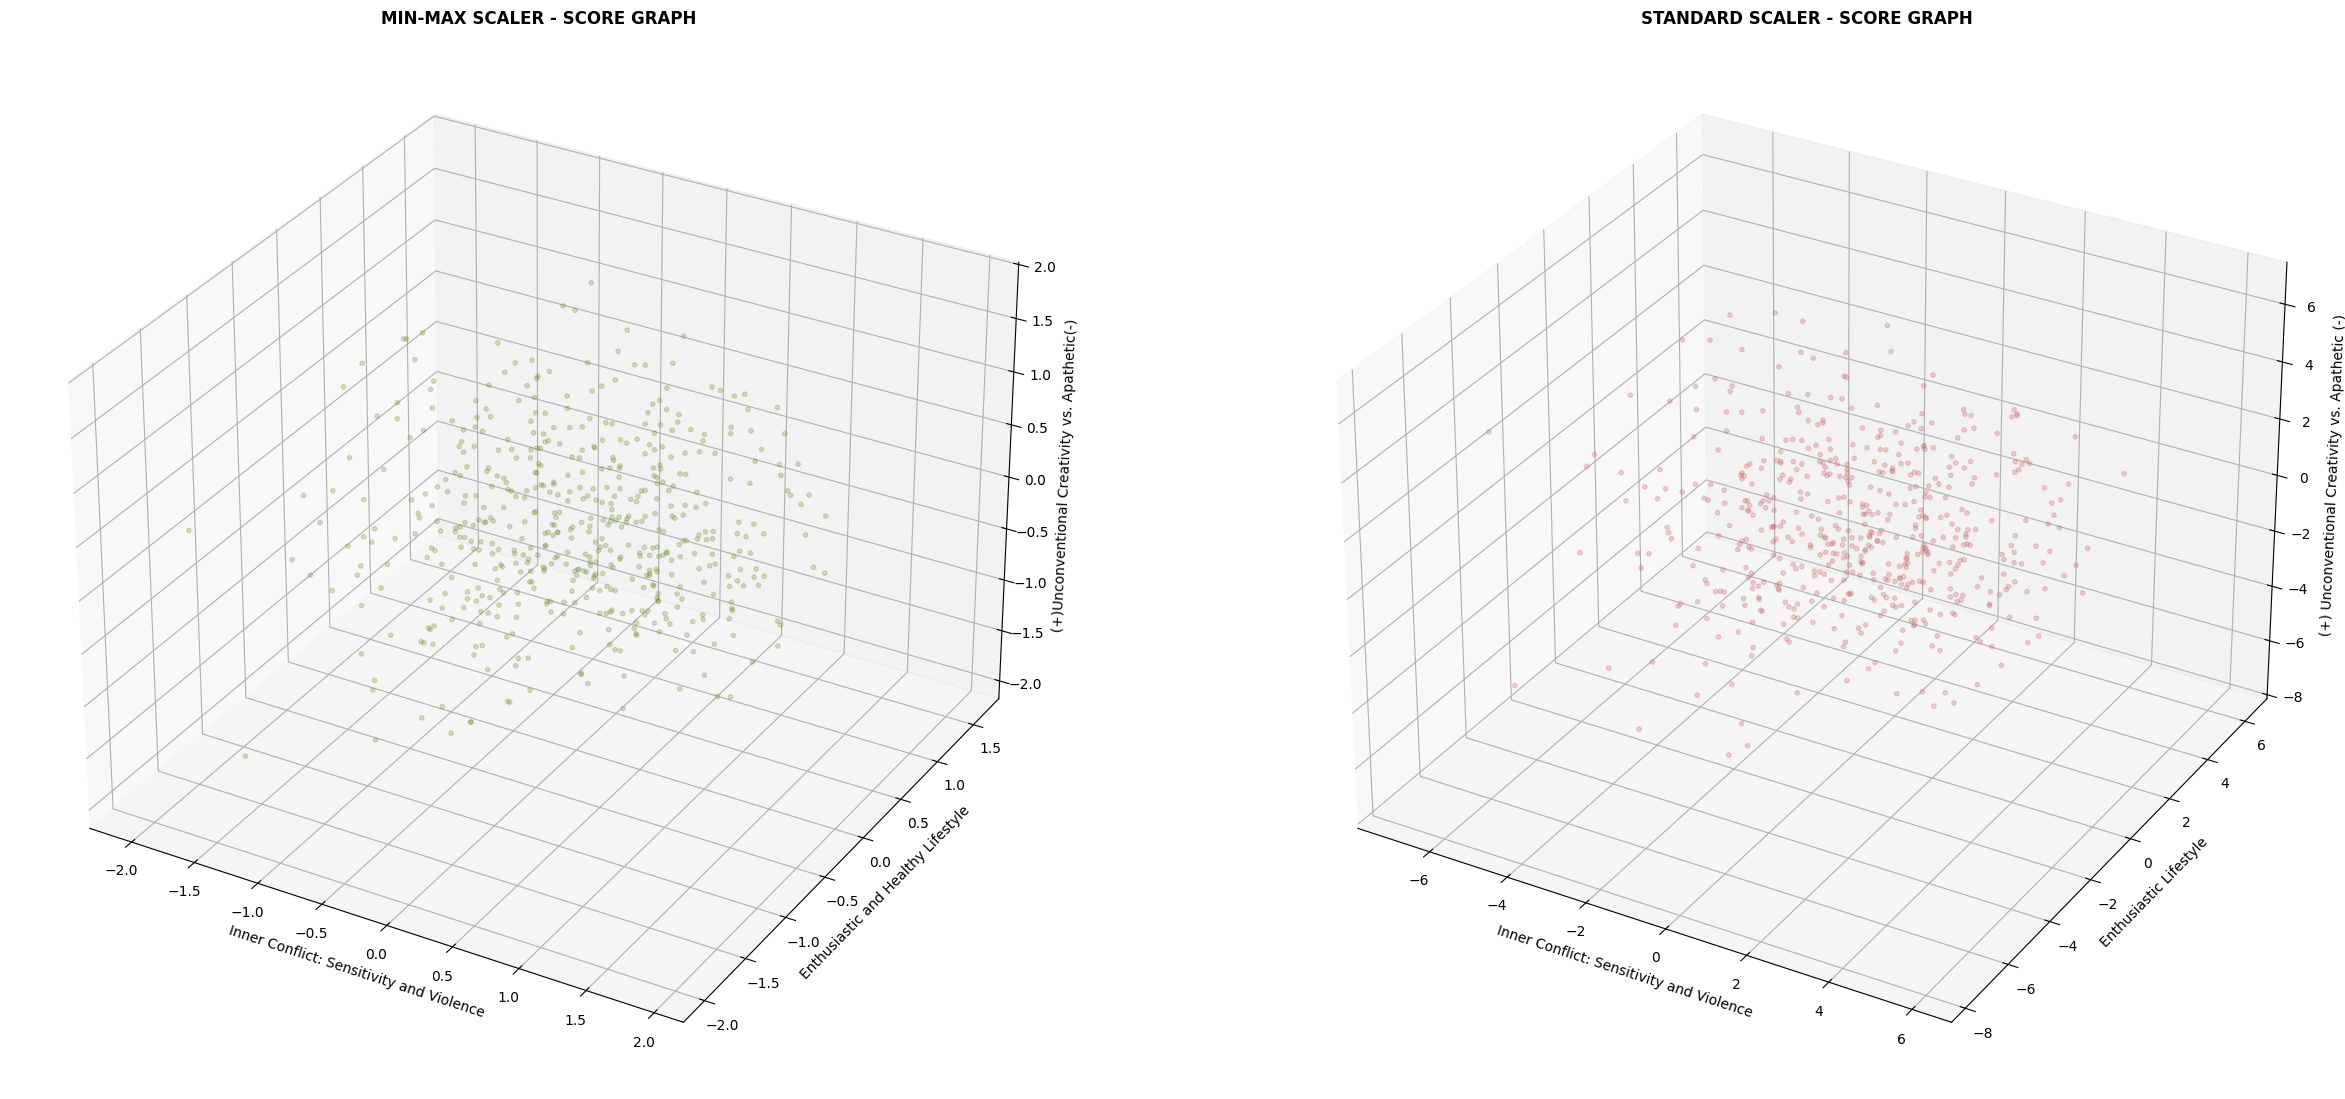

In [ ]:
# Apply PCA transformations to the datasets
# The resulting datasets contain the coordinates of each data point in the new coordinate system defined by the principal components.
Ymm_=pca_mm.transform(Xmm_df)
Ystd_=pca_std.transform(Xstd_df)

# Function to plot a 3D Score Graph of the first 3 PCi
def scoregraph_3D(Y, pc_names, title, color, ax):
    ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], s=10, alpha=0.25, color=color)
    ax.set_title(f'{title} - SCORE GRAPH', fontweight='bold')
    ax.set_xlabel(pc_names[0])
    ax.set_ylabel(pc_names[1])
    ax.set_zlabel(pc_names[2])
    ax.grid()

# Visualize the Score Graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 30), subplot_kw={'projection': '3d'})
scoregraph_3D(Ymm_, pc_names_mm, 'MIN-MAX SCALER', 'olivedrab', ax1)
scoregraph_3D(Ystd_, pc_names_std, 'STANDARD SCALER', 'indianred', ax2)
plt.show()



The score graph above does not show any particular distribution, neither for the Min-Max Scaler or for the Standard Scaler. In the following code, 2D and 3D score graphs are shown using demographic labels (Gender and Weight), which have revealed interesting distributions.

**GENDER**

The participants in the survey were provided with information about their gender. This information was used to plot the score graph in the space generated by the first three principal components, with different colors based on gender (female: pink, male: blue).

In [ ]:
# Extract the 'Gender' values from dataframe Xfulldf_ for the rows that are present in Xdf_
#to be sure of not consider the missing value removed by Xdf_
gender_column = Xfulldf_.loc[Xdf_.index, 'Gender'].values

# Function to create 3D and 2D Score Graph by gender
def combined_scoregraph_gender_no_clusters(Y, pc_names, title, gender_column):
    fig = plt.figure(figsize=(16, 16))

    # 3D plot
    ax_sg_3d = fig.add_subplot(211, projection='3d')
    #Assignment of the colors
    colors = {'female': 'pink', 'male': 'blue'}

    # Separate points by gender
    filtered_gender_column = gender_column
    female_points = Y[filtered_gender_column == 'female']
    male_points = Y[filtered_gender_column == 'male']

    # Plot female points in 3D
    ax_sg_3d.scatter(female_points[:, 0], female_points[:, 1], female_points[:, 2],
                     s=10, alpha=0.6, color=colors['female'], label='Female')

    # Plot male points in 3D
    ax_sg_3d.scatter(male_points[:, 0], male_points[:, 1], male_points[:, 2],
                     s=10, alpha=0.6, color=colors['male'], label='Male')


    # Set axes labels and title for the 3D plot
    ax_sg_3d.set_xlabel(pc_names[0])
    ax_sg_3d.set_ylabel(pc_names[1])
    ax_sg_3d.set_zlabel(pc_names[2])
    ax_sg_3d.set_title(f'{title} - 3D SCORE GRAPH BY GENDER', fontweight='bold')
    ax_sg_3d.grid()

    # 2D plot (PC1 - PC2)
    ax_sg_2d = fig.add_subplot(223)
    # Plot female points in 2D
    ax_sg_2d.scatter(female_points[:, 0], female_points[:, 1],
                     s=15, alpha=0.5, color=colors['female'], label='Female')
    # Plot male points in 2D
    ax_sg_2d.scatter(male_points[:, 0], male_points[:, 1],
                     s=10, alpha=0.5, color=colors['male'], label='Male')

    # Set axes labels and title for the 2D plot (PC1 vs PC2)
    ax_sg_2d.set_title(f'{title} - 2D SCORE GRAPH BY GENDER: PC1 - PC2', fontweight='bold')
    ax_sg_2d.set_xlabel(pc_names[0])
    ax_sg_2d.set_ylabel(pc_names[1])
    ax_sg_2d.legend()
    ax_sg_2d.grid()

    # 2D plot PC2 - PC3
    ax_sg_2d_pc2_pc3 = fig.add_subplot(224)
    # Plot female points in 2D
    ax_sg_2d_pc2_pc3.scatter(female_points[:, 1], female_points[:, 2],
                            s=15, alpha=0.5, color=colors['female'], label='Female')
    # Plot male points in 2D
    ax_sg_2d_pc2_pc3.scatter(male_points[:, 1], male_points[:, 2],
                            s=10, alpha=0.5, color=colors['male'], label='Male')

    # Set axes labels and title for the 2D plot (PC2 vs PC3)
    ax_sg_2d_pc2_pc3.set_title(f'{title} - 2D SCORE GRAPH BY GENDER: PC2 - PC3', fontweight='bold')
    ax_sg_2d_pc2_pc3.set_xlabel(pc_names[1])
    ax_sg_2d_pc2_pc3.set_ylabel(pc_names[2])
    ax_sg_2d_pc2_pc3.legend()
    ax_sg_2d_pc2_pc3.grid()


    plt.tight_layout()
    plt.show()


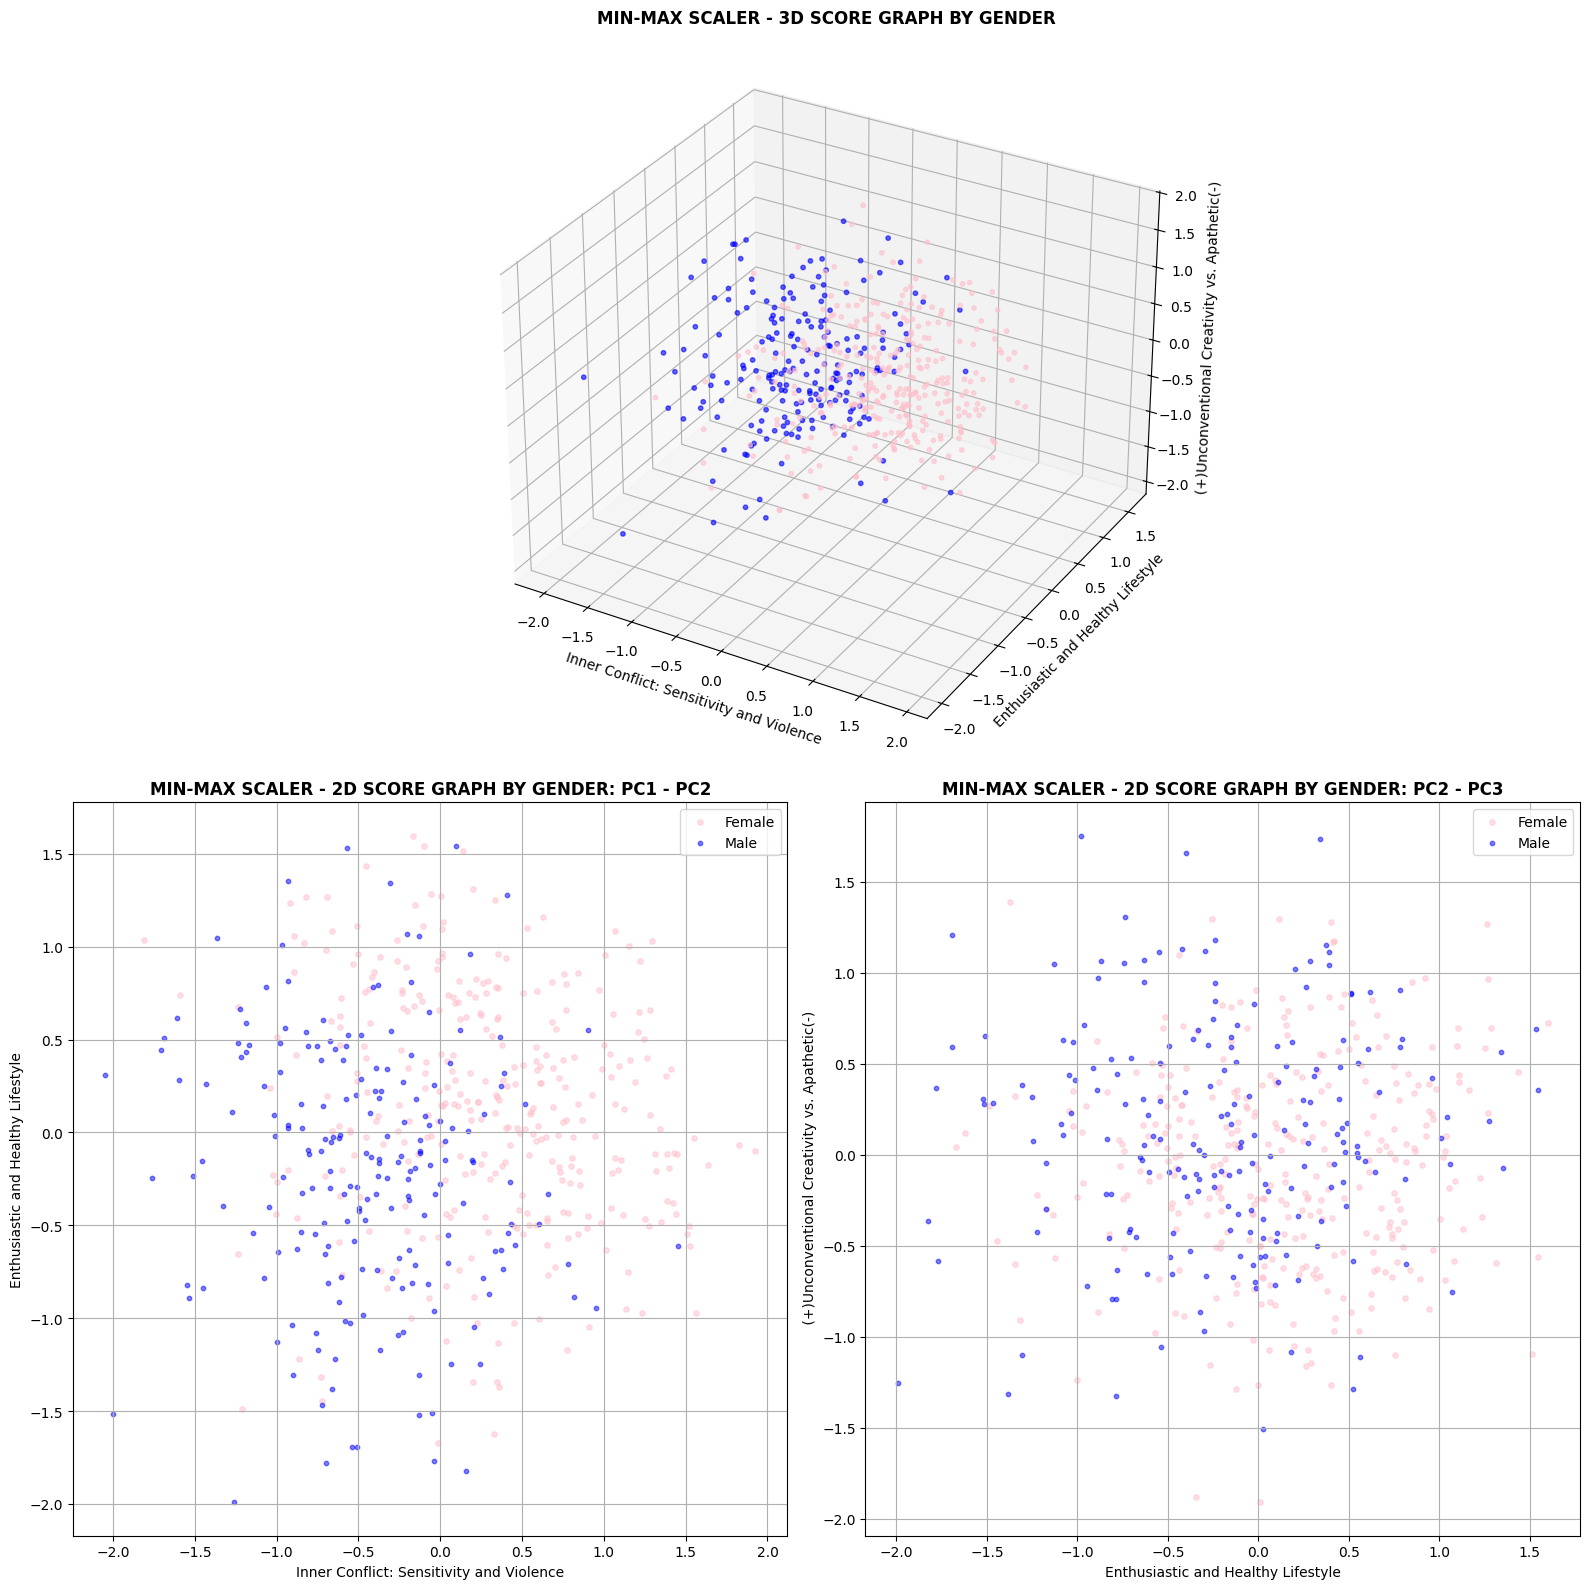

In [ ]:
# Visualize 3D and 2D score graph by gender for MIN-MAX SCALER
combined_scoregraph_gender_no_clusters(Ymm_,pc_names_mm, 'MIN-MAX SCALER', gender_column)

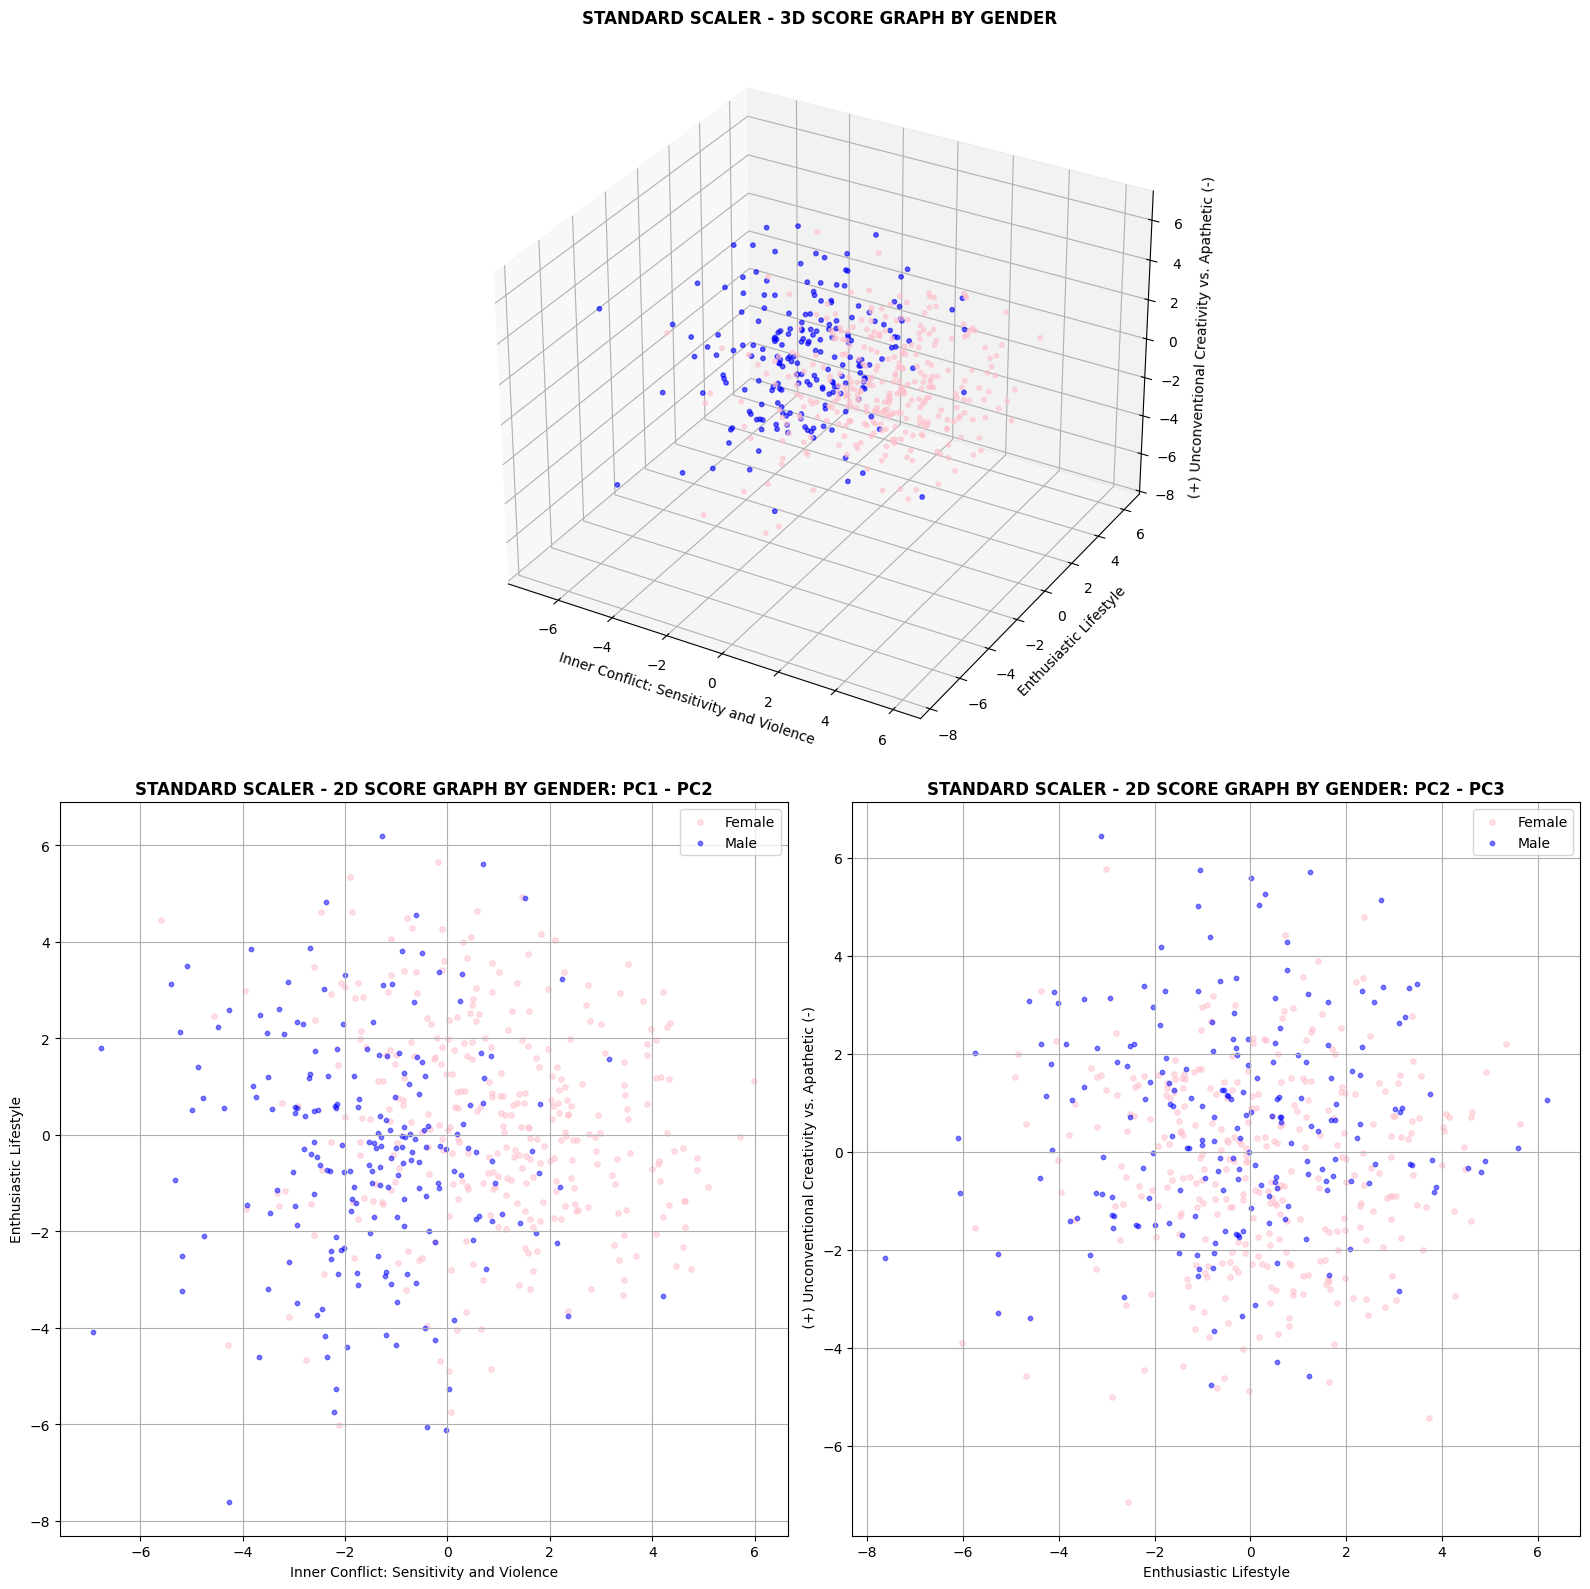

In [ ]:
# Visualize 3D and 2D score graph by gender for STANDARD SCALER
combined_scoregraph_gender_no_clusters(Ystd_,pc_names_std, 'STANDARD SCALER', gender_column)

The resulting distribution highlights that women are concentrated near positive values of the first component (Inner Conflict: Sensitivity and Violence) and uniformly distributed among the domain of the second principal component (Enthusiastic Lifestyle) and the third ((+)Unconventional Creativity vs. Apathetic(-)).
In contrast, men are shifted toward negative values of the first component, neutral values of the second and of the third.

Women of our dataset shows a high sensitivity and possibly a tendency toward inner conflict or emotional complexity.
They exhibit a broad range of engagement levels related to sociability, health, and an active lifestyle, indicating diversity in their approaches to these aspects.
Additionally, they are represented uniformly across the spectrum from unconventional creativity to apathy, reflecting a balanced distribution of these traits.

Men seems to demonstrate less sensitivity or inner conflict and potentially less involvement in problematic behaviors.
They also exhibit different level of sociability and health-related behaviors other than different levels of creativity and apathy.

The same distribution is observed using both the Min-Max Scaler and the Standard Scaler. This outcome is expected, as the interpretation of PC1 under both standardization approaches suggests that they share similar, if not identical, properties.






---



**WEIGHT**

Similarly to gender, the participants reported their weight in
integer form.


---


To evaluate its significance, we will analyze the distribution and identify the key intervals to focus on.

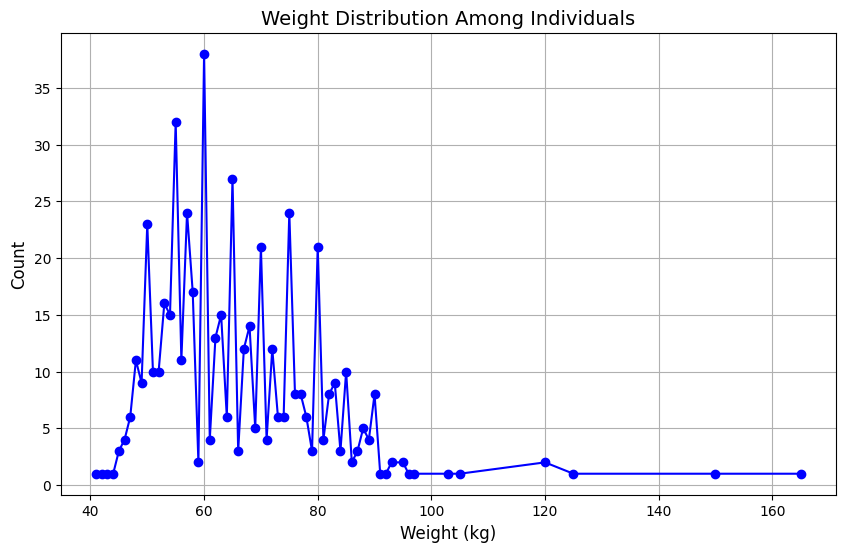

In [ ]:
# Extract the 'Weight' column
weight_column = Xfulldf_.loc[Xdf_.index, 'Weight'].values

# Calculate unique weights and their respective counts
unique_weights, counts = np.unique(weight_column, return_counts=True)

# Create a line plot to visualize the weight distribution
plt.figure(figsize=(10, 6))
plt.plot(unique_weights, counts, marker='o', linestyle='-', color='b')
plt.title("Weight Distribution Among Individuals", fontsize=14)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(True)
plt.show()

In [ ]:
# Summary of 'Weight' distribution
Xfulldf_['Weight'].describe()

count    662.000000
mean      66.028701
std       13.888167
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64

We selected the intervals based on percentiles to ensure that each interval contained an equal proportion of data, resulting in a segmentation that is both balanced and well-characterized of our dataset.
Based on the obtained results, we have generated the following intervals:

- 41-55
- 55-64
- 64-75
- 75-165

These intervals are evenly distributed above and below the mean, which is equal to $66$.


In [ ]:
# Function to create 3D and 2D score graphs based on weight ranges
def combined_scoregraph_Weight_no_clusters(Y, pc_names,title, weight_column):
    fig = plt.figure(figsize=(16, 16))

    # 3D plot
    ax_sg_3d = fig.add_subplot(211, projection='3d')

    # Weight intervals and corresponding colors
    weight_bins = [41, 55, 64, 75, 165]
    weight_color_map = {
        '41-55': 'green',
        '55-64': 'lightgreen',
        '64-75': 'yellow',
        '75-165': 'red',
    }

    #Iteration on each interval of weight
    for weight_range, color in weight_color_map.items():
        #Identification of the lower_boud and upper_bound of the intervale
        lower_bound = int(weight_range.split('-')[0])
        upper_bound = int(weight_range.split('-')[1])

        # Create a mask to filter points within the current weight range
        weight_mask = (weight_column >= lower_bound) & (weight_column < upper_bound)
        points_in_range = Y[weight_mask]

        # Scatter plot for points in the current weeight range
        ax_sg_3d.scatter(
            points_in_range[:, 0], points_in_range[:, 1], points_in_range[:, 2],
            s=20, alpha=0.6, color=color, label=weight_range
        )

    # Set axis labels, title, legend and grid for the 3D plot
    ax_sg_3d.set_xlabel(pc_names[0])
    ax_sg_3d.set_ylabel(pc_names[1])
    ax_sg_3d.set_zlabel(pc_names[2])
    ax_sg_3d.set_title(f'{title} - 3D SCORE GRAPH BY WEIGHT', fontweight='bold')
    ax_sg_3d.legend(title='Weight Intervals')
    ax_sg_3d.grid()

    # 2D plot (PC1 - PC2)
    ax_sg_2d = fig.add_subplot(223)

    # Plot points for each weight range
    for weight_range, color in weight_color_map.items():
        lower_bound = int(weight_range.split('-')[0])
        upper_bound = int(weight_range.split('-')[1])

        # Create a mask to filter points within the current weight range
        weight_mask = (weight_column >= lower_bound) & (weight_column < upper_bound)
        points_in_range = Y[weight_mask]

        # Scatter plot for points in the current weight range
        ax_sg_2d.scatter(
            points_in_range[:, 0], points_in_range[:, 1],
            s=15, alpha=0.6, color=color, label=weight_range
        )

    # Set axis labels, title, legend and grid for the 3D plot
    ax_sg_2d.set_title(f'{title} - 2D SCORE GRAPH BY WEIGHT PC1 - PC2', fontweight='bold')
    ax_sg_2d.set_xlabel(pc_names[0])
    ax_sg_2d.set_ylabel(pc_names[1])
    ax_sg_2d.legend(title='Weight Intervals')
    ax_sg_2d.grid()


    # 2D plot PC2 - PC3
    ax_sg_2d_pc2_pc3 = fig.add_subplot(224)

    # Plot points for each weight range
    for weight_range, color in weight_color_map.items():
        lower_bound = int(weight_range.split('-')[0])
        upper_bound = int(weight_range.split('-')[1])

        # Create a mask to filter points within the current weight range
        weight_mask = (weight_column >= lower_bound) & (weight_column < upper_bound)
        points_in_range = Y[weight_mask]

        # Scatter plot for points in the current weight range
        ax_sg_2d_pc2_pc3.scatter(
            points_in_range[:, 1], points_in_range[:, 2],
            s=15, alpha=0.6, color=color, label=weight_range
        )

    # Set axis labels, title, legend and grid for the 3D plot
    ax_sg_2d_pc2_pc3.set_title(f'{title} - 2D SCORE GRAPH BY WEIGHT PC2 - PC3', fontweight='bold')
    ax_sg_2d_pc2_pc3.set_xlabel(pc_names[1])
    ax_sg_2d_pc2_pc3.set_ylabel(pc_names[2])
    ax_sg_2d_pc2_pc3.legend()
    ax_sg_2d_pc2_pc3.grid()


    plt.tight_layout()
    plt.show()

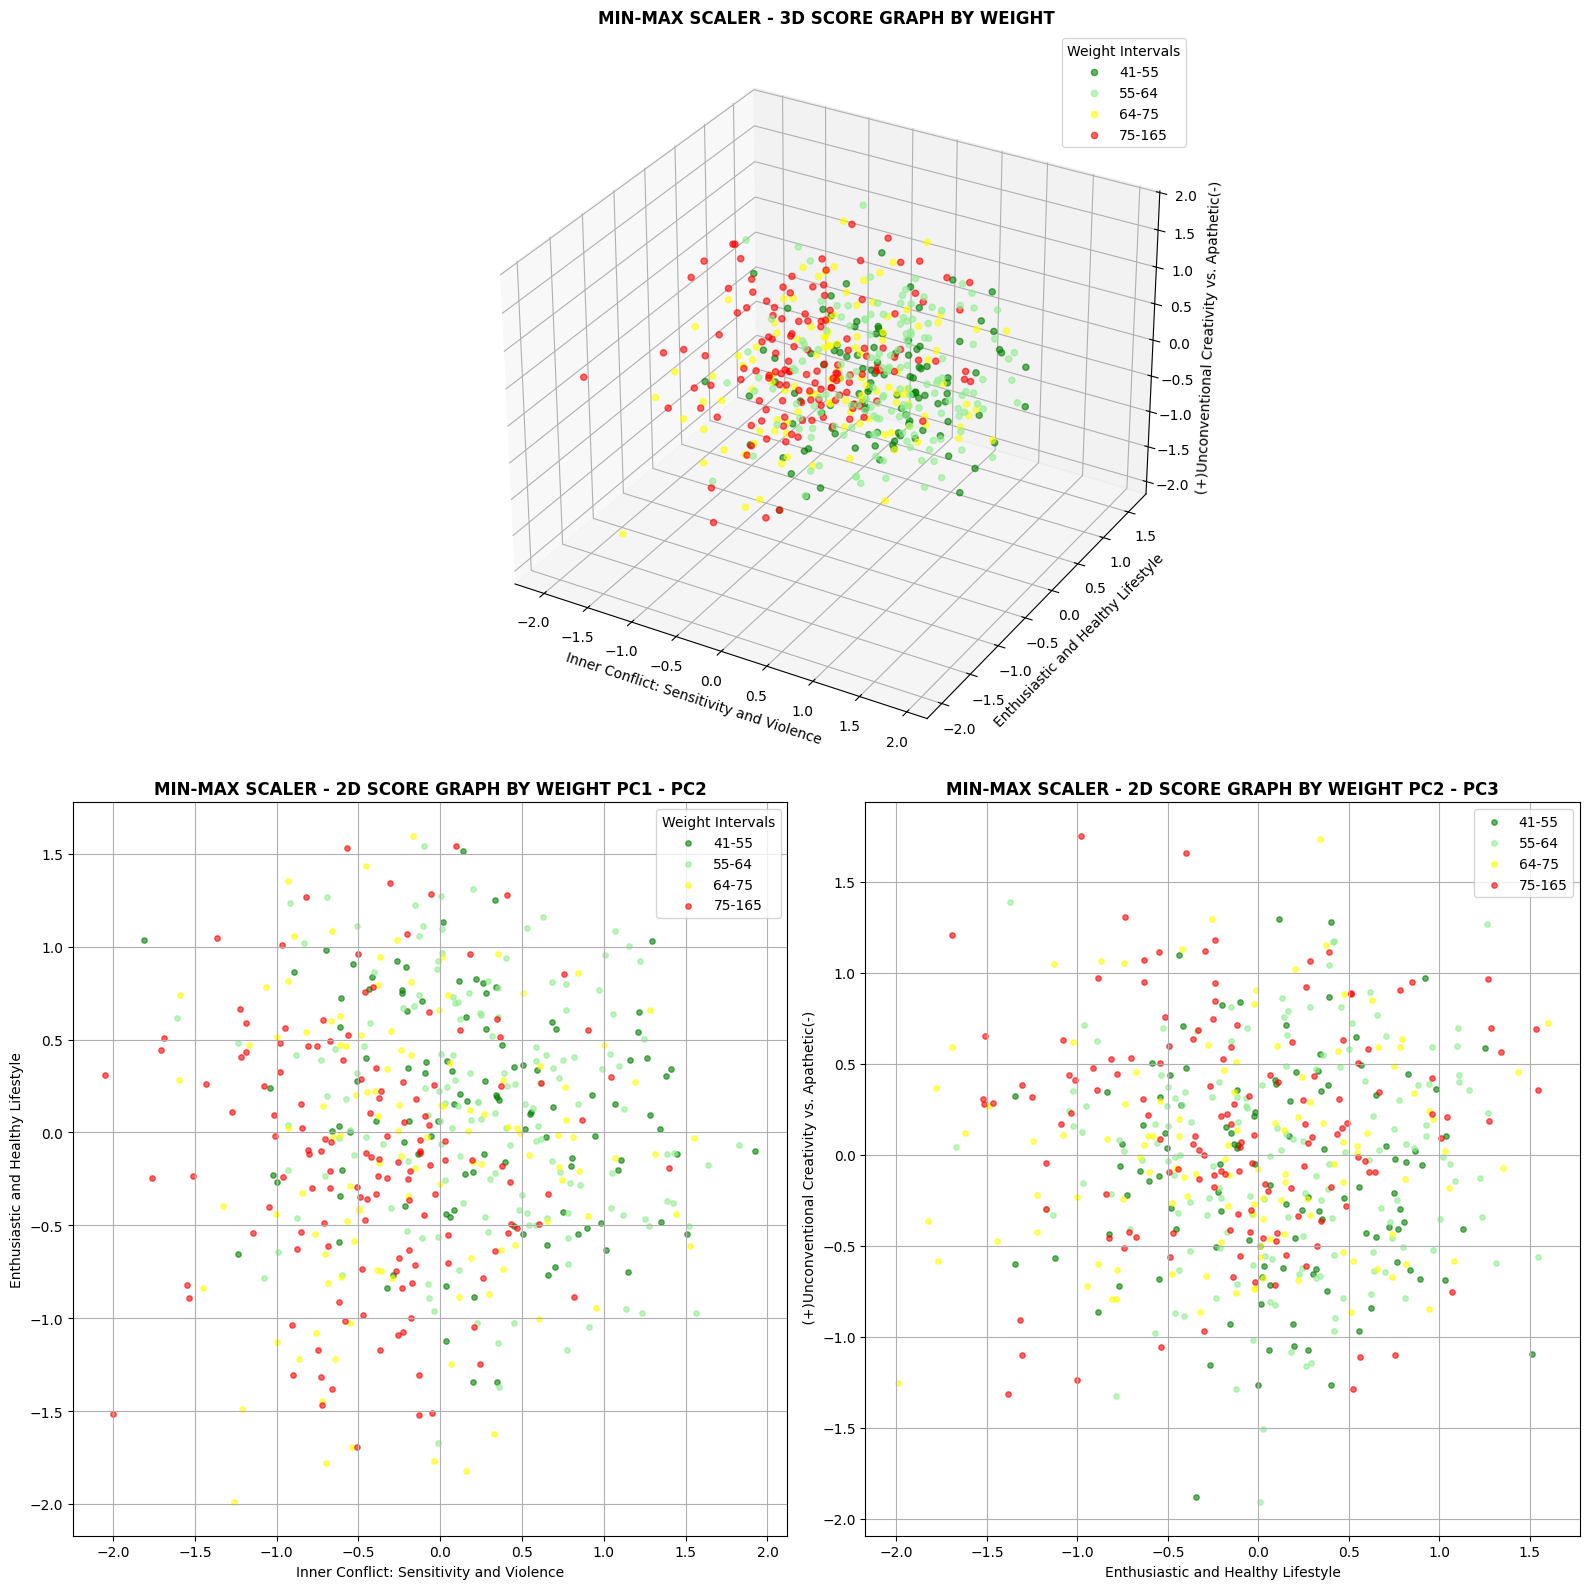

In [ ]:
# Visualize 3D and 2D score graph by weight for MIN-MAX SCALER
combined_scoregraph_Weight_no_clusters(Ymm_,pc_names_mm, 'MIN-MAX SCALER', weight_column)

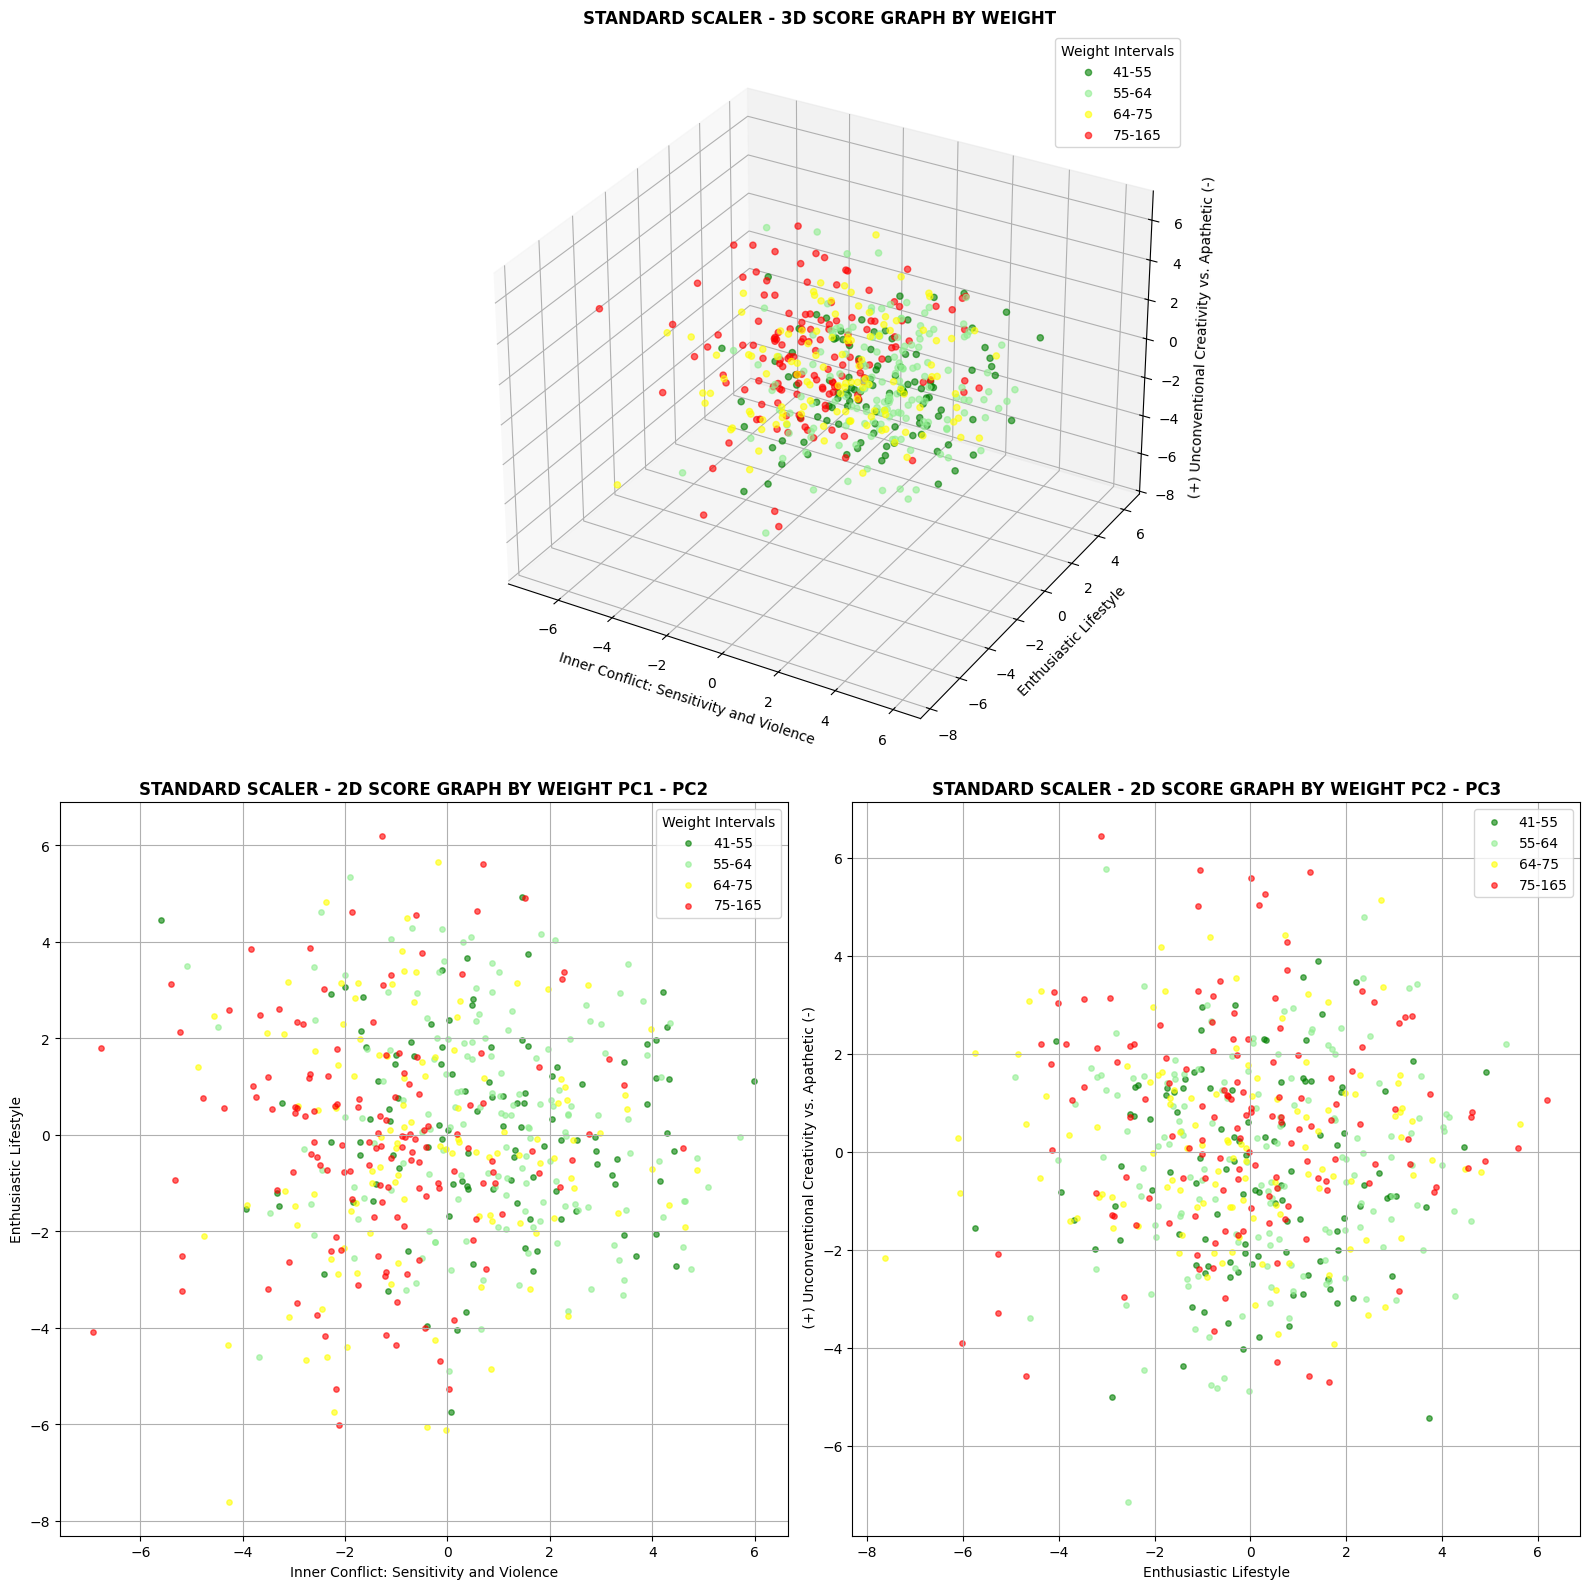

In [ ]:
# Visualize 3D and 2D score graph by weight for STANDARD SCALER
combined_scoregraph_Weight_no_clusters(Ystd_, pc_names_std,'STANDARD SCALER', weight_column)

As seen from the 2D score plot, the separation between individuals with a weight over and under 64kg is provided by **PC1: Inner Conflict: Sensitivity and Violence**. For its negative values, we mainly find individuals over 64kg, while for its positive values, we find individuals under 64kg. This occurs despite the fact that the principal component does not have any of the original features related to food, exercise, or healthy lifestyle as significant factors. However, upon further analysis of PC1, it becomes apparent that "Healthy Eating" still has a relatively high positive value (even if slightly below the threshold), as well as "Eating to Survive." Additionally, there are low energy levels, which could potentially be linked to these features.

## **k-Means**

**KMeans** is a clustering algorithm that consists in partitioning a dataset into a predefined number of clusters ($k$).

This method aims to group data in a way that they are as similar as possible within each cluster and different between clusters.
It operates by minimizing the variance within each cluster.

The k-Means clustering is applied to the reduced data represented in the principal component space.
This preprocessing ensures that K-Means operates on a lower-dimensional representation of the data while preserving the majority of its variance.
This reduction accelerates the clustering process, reduces noise and highlights the most relevant features contributing to the clustering.



To determine the optimal number of clusters ($k$), we performed silhouette analysis.

We tested values of $k$ from $3$ to $10$ and for each
$k$:
- the K-Means model was fitted to the data,
- the silhouette score was computed to evaluate the cluster quality.

Then, the $k$ that maximizes the average Silhouette coefficient is selected.

The Silhouette score for a given $k$ is defined as:
$$k^* = \arg\max_K \frac{1}{N} \sum_{x \in S} S(x)$$


Where $N$ is the number of data points and $S(x)$ is the silhouette score for each point $x$, defined as follows:

$$S(x) = \frac{b(x) - a(x)} {max(a(x), b(x))}$$

where:
- $a$: Mean distance between a sample and all other points in the same cluster (mean intra-cluster distance).

- $b$: Mean distance between a sample and all points in the nearest cluster that the sample is not a part of (mean nearest-cluster distance).

The silhouette score helps to evaluate the quality of the clustering. The score ranges from $-1$ to $1$, where a higher score indicates better-defined clusters.




In [ ]:
# Function to calculate silhouette scores and find the best k value for clustering
def silhouette(Y,title):
  # List to store KMeans models for each value of k
  km_list = []
  # List to store silhouette scores for each value of k
  silcoeff_list = []
  #List containing the values of k to be tested (from 3 to 10).
  k_list = list(range(3, 11))

   # Perform k-means clustering and compute silhouette scores with k in [3,10]
  for i in range(len(k_list)):
      # Initialize and fit KMeans for the current k
      km_list.append(KMeans(n_clusters=k_list[i], random_state=random_seed))
      km = km_list[i]
      km.fit(Y)
      # Compute and store the silhouette score
      silcoeff_list.append(silhouette_score(Y, km.labels_))

  # Find the best k value based on the higher silhouette score
  # Index of the best score
  i_best = np.argmax(silcoeff_list)
  # Best k value
  k = k_list[i_best]
  # Corresponding KMeans mode
  km = km_list[i_best]


  # Print the results
  print('')
  print(f'= {title} - RESULTS OF THE SEARCH...')
  print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')
  print('')
  return km,k,silcoeff_list

# Apply the silhouette function to both the Min-Max scaled data and the Standard
# scaled data
km_mm,k_mm,silcoeff_list_mm=silhouette(Ymm_,'MIN MAX SCALER')
km_std,k_std,silcoeff_list_std=silhouette(Ystd_,'STANDARD SCALER')


= MIN MAX SCALER - RESULTS OF THE SEARCH...
BEST SILHOUETTE SCORE: 0.17437455757882073 --> k = 3


= STANDARD SCALER - RESULTS OF THE SEARCH...
BEST SILHOUETTE SCORE: 0.16571053499431182 --> k = 4



For the *MIN-MAX SCALER* the best silhouette score was reached with $k=3$ and the value of the score is equal to $0.174$.
That suggests that the data is best partitioned into three distinct clusters when features are scaled to a uniform range.

While, for the *STANDARD SCALER* the best silhouette score was reached with $k=4$ and the value of the score is equal to $0.166$, indicating a best partitioning with four clusters when features are standardized.

The silhouette scores are both close to 0, indicating the presence of overlapping clusters.

In [ ]:
# Function to visualize clustering results using score graphs
def scoregraph_Centroids(Y, pc_names, km, k, title):
    # Use a colormap to assign colors to clusters
    colormap = colormaps['tab10']
    cluster_colors = [colormap(i) for i in range(k)]

    # Create a figure with two subplots
    fig = plt.figure(figsize=(16, 16))

    # 3D subplot
    ax_sg_3d = fig.add_subplot(211, projection='3d')
    for cluster_id in range(k):
        # Points belonging to the current cluster
        cluster_points = Y[km.labels_ == cluster_id]
        # Scatter plot for the cluster
        ax_sg_3d.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
                         s=10, alpha=0.3, color=cluster_colors[cluster_id], label=f'Cluster {cluster_id + 1}')

    # Add centroids
    ax_sg_3d.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
                     c='black', marker='^', label='Centroids', s=100)

    # Label centroids in the plot
    for kk in range(k):
        ax_sg_3d.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2],
                      f' C.{kk + 1}', fontweight='bold')

    # Set axis labels, title, legend and grid for the 3D plot
    ax_sg_3d.set_title(f'{title} - SCORE GRAPH (3D)', fontweight='bold')
    ax_sg_3d.set_xlabel(pc_names[0])
    ax_sg_3d.set_ylabel(pc_names[1])
    ax_sg_3d.set_zlabel(pc_names[2])
    ax_sg_3d.legend()
    ax_sg_3d.grid()


    # 2D subplot PC1 - PC2
    ax_sg_2d = fig.add_subplot(223)
    for cluster_id in range(k):
        # Points belonging to the current cluster
        cluster_points = Y[km.labels_ == cluster_id]
        ax_sg_2d.scatter(cluster_points[:, 0], cluster_points[:, 1],
                         s=10, alpha=0.3, color=cluster_colors[cluster_id], label=f'Cluster {cluster_id + 1}')
    # Add centroids
    ax_sg_2d.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                     c='black', marker='^', label='Centroids', s=100)
    # Label centroids in the plot
    for kk in range(k):
        ax_sg_2d.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1],
                      f'C.{kk + 1}', fontweight='bold', fontsize=10, color='black')

    # Set axis labels, title, legend and grid for the 2D plot
    ax_sg_2d.set_title(f'{title} - SCORE GRAPH (2D) - PC1 and PC2', fontweight='bold')
    ax_sg_2d.set_xlabel(pc_names[0])
    ax_sg_2d.set_ylabel(pc_names[1])
    ax_sg_2d.legend()
    ax_sg_2d.grid()


    # 2D subplot PC1 - PC3
    ax_sg_2d_23 = fig.add_subplot(224)
    for cluster_id in range(k):
      # Points belonging to the current cluster
        cluster_points = Y[km.labels_ == cluster_id]
        ax_sg_2d_23.scatter(cluster_points[:, 1], cluster_points[:, 2],
                         s=10, alpha=0.3, color=cluster_colors[cluster_id], label=f'Cluster {cluster_id + 1}')
    # Add centroids
    ax_sg_2d_23.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
                     c='black', marker='^', label='Centroids', s=100)
    # Label centroids in the plot
    for kk in range(k):
        ax_sg_2d_23.text(km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2],
                      f'C.{kk + 1}', fontweight='bold', fontsize=10, color='black')

    # Set axis labels, title, legend and grid for the 2D plot
    ax_sg_2d_23.set_title(f'{title} - SCORE GRAPH (2D) - PC2 and PC3', fontweight='bold')
    ax_sg_2d_23.set_xlabel(pc_names[1])
    ax_sg_2d_23.set_ylabel(pc_names[2])
    ax_sg_2d_23.legend()
    ax_sg_2d_23.grid()


    plt.tight_layout()
    plt.show()



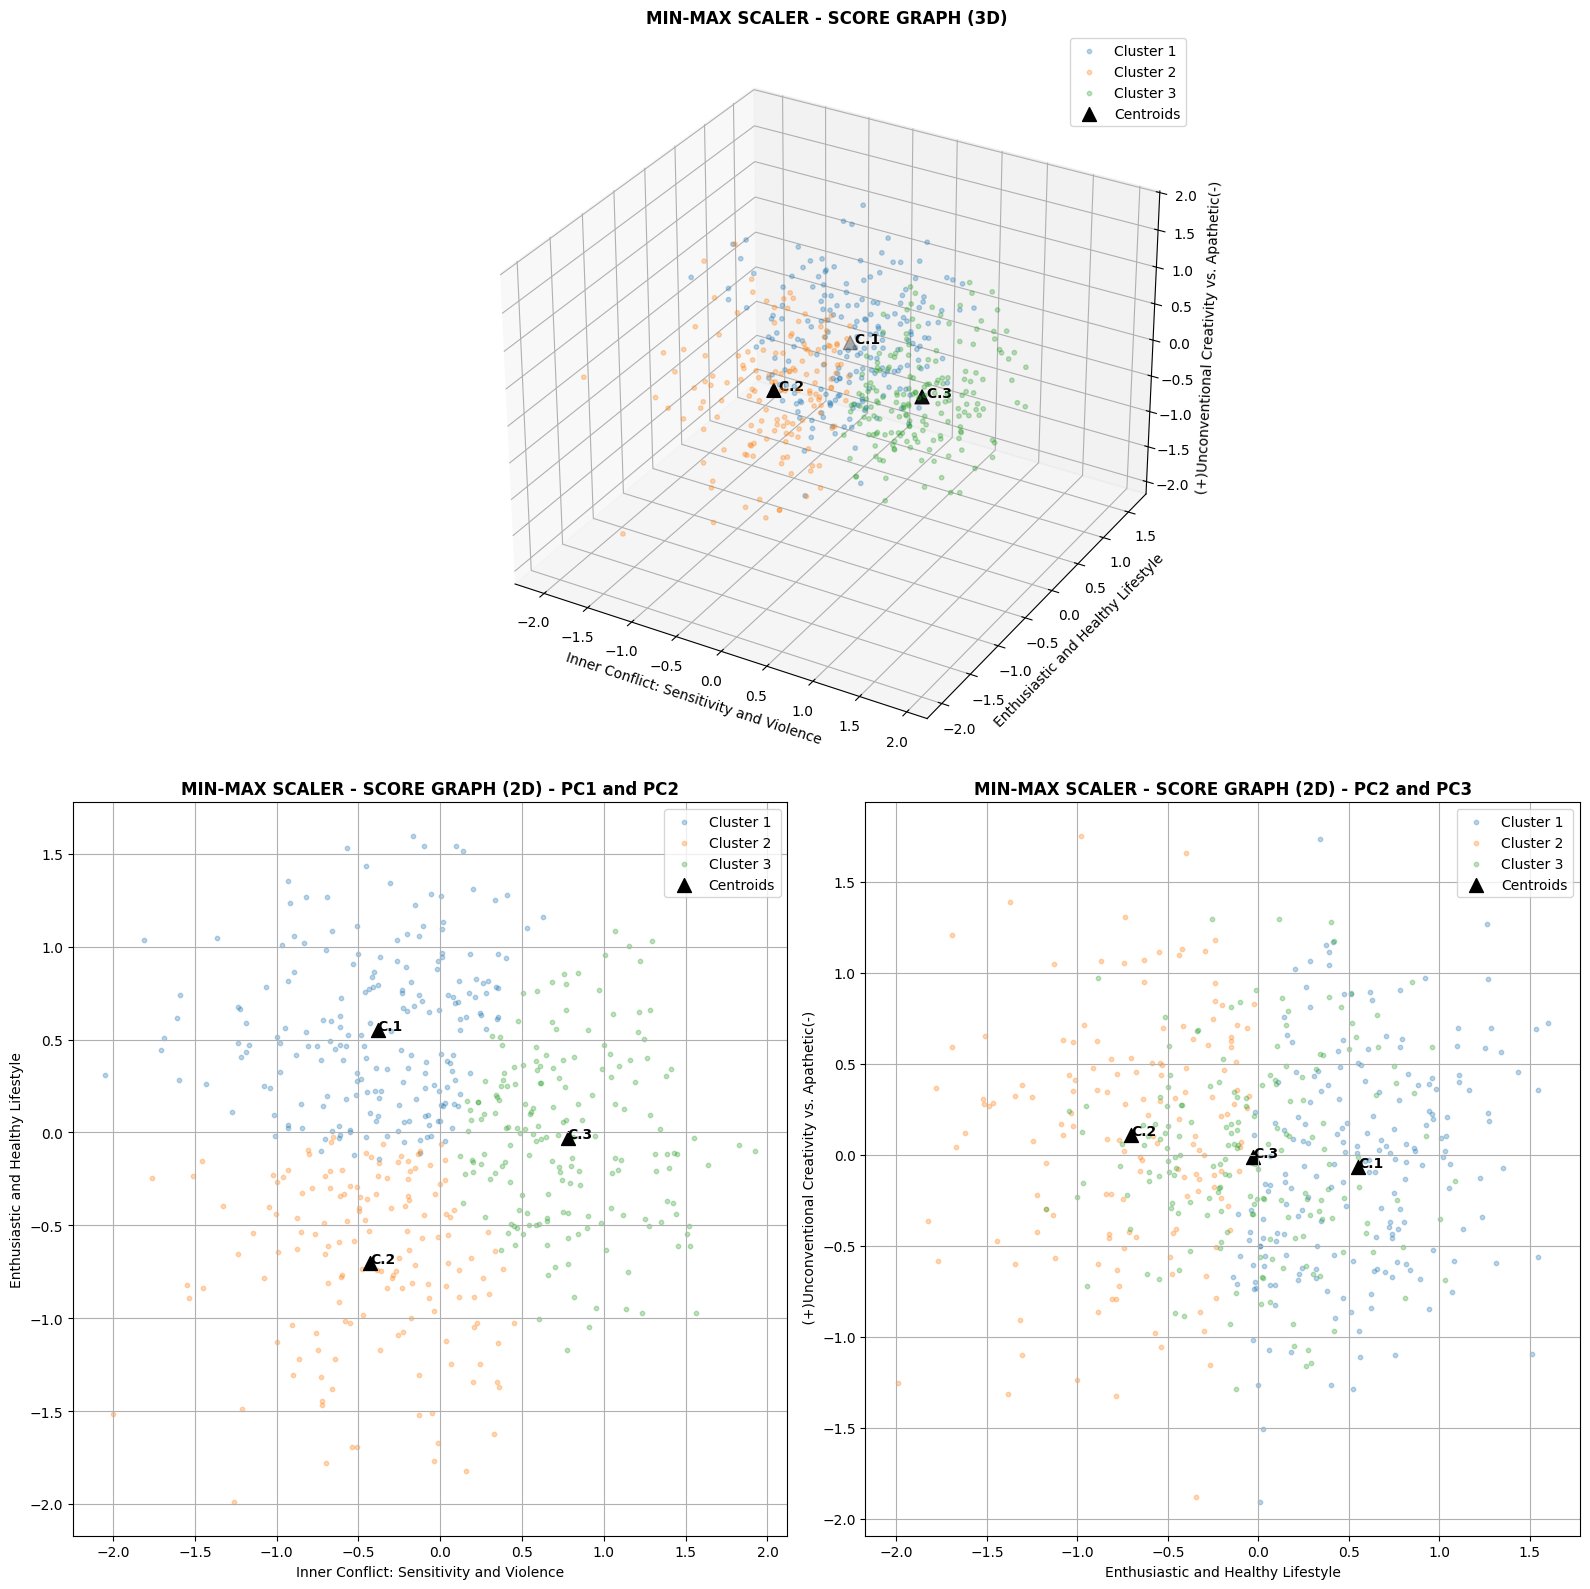

In [ ]:
# Visualize 3D and 2D score graph with centroids for MIN-MAX SCALER
scoregraph_Centroids(Ymm_,pc_names_mm, km_mm, k_mm, 'MIN-MAX SCALER')

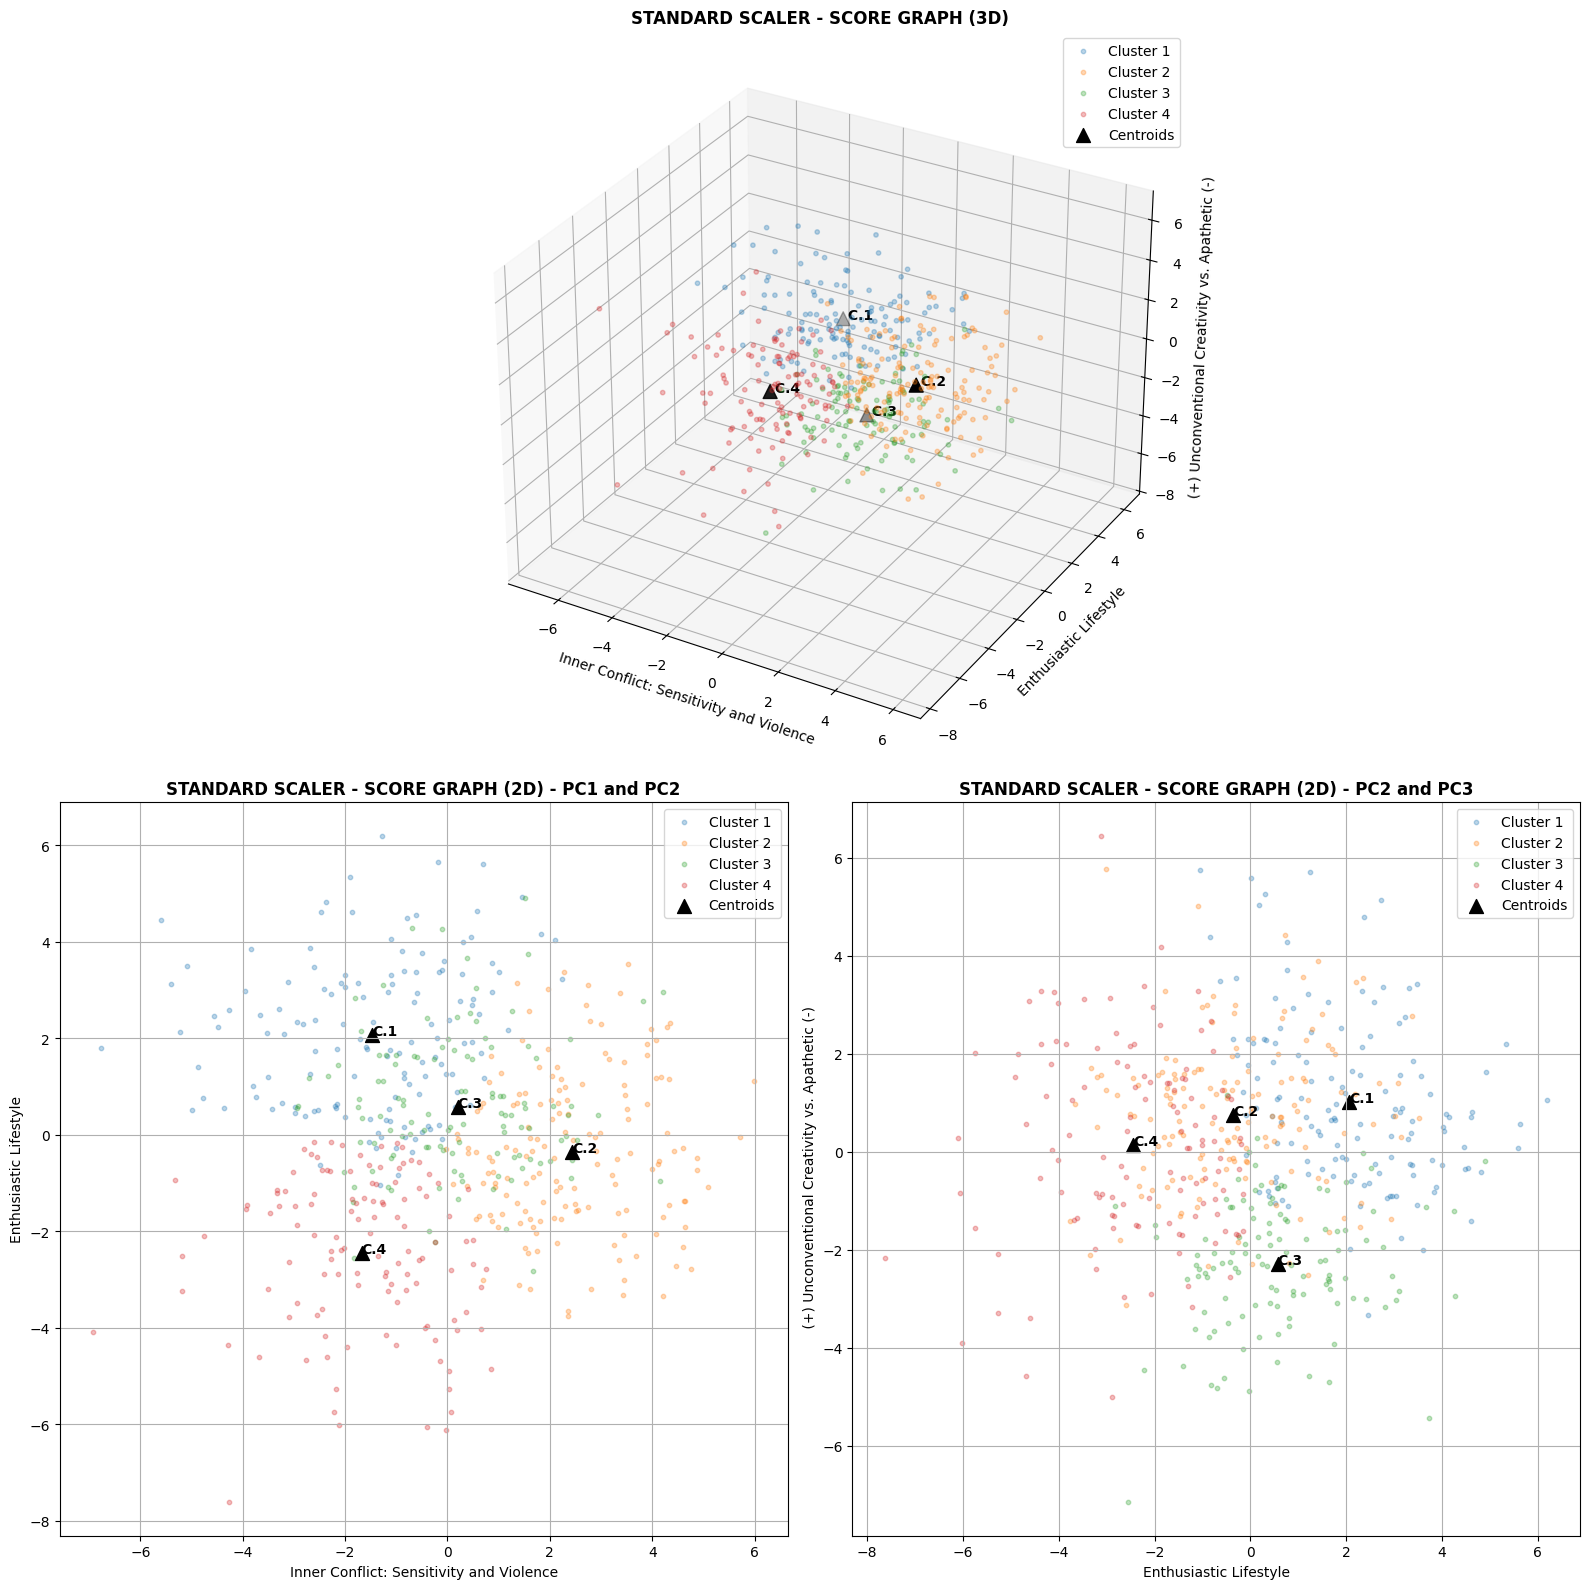

In [ ]:
# Visualize 3D and 2D score graph with centroids for STANDARD SCALER
scoregraph_Centroids(Ystd_,pc_names_std, km_std, k_std, 'STANDARD SCALER')

**Min-Max Scaler:**

- Cluster 1: Individuals with negative values on PC1 (Inner Conflict), positive values on PC2 (Enthusiastic Lifestyle) and uniform distribuited values of PC3 (Unconventional Creativity vs.Apathetic). This may represent a subgroup of individuals with lower levels of inner conflict, lead an active and sociable life and that are not strongly characterized by its preference for conventional activities.

- Cluster 2: Participants characterized by negative values of PC1 and PC2, and uniformly distributed PC3 values, with slightly more positive values. This suggests that this cluster may represent a subgroup of individuals with lower levels of inner conflict, who prefer a more reserved lifestyle and that are not strongly characterized by its preference for conventional activities, but might include some individuals with unconventional interests.

- Cluster 3: Positive values for PC1, uniform values for PC2 and PC3, with slightly more positive values for PC3. This cluster may represent people with higher levels of inner conflict, who might be more emotionally reactive and sensitive, with a moderate level of social engagement and a slight tendency toward unconventional creativity, without showing apathy.


**Standard Scalar:**

- Cluster 1: Similar to Cluster 1, is characterixed by individuals with negative values on PC1, positive values on PC2 and uniforms lightly positive values PC3 values.
This may represent a subgroup of individuals with lower levels of inner conflict, who lead an active and sociable life and have a slight preference for unconventional creativity and no signs of apathy.

- Cluster 2: Similar to Cluster 3 from the Min-Max Scaler analysis has positive values for PC1 and uniform values for PC2 for PC3.
People in this group have high levels of inner conflict, moderate level of social engagement and a slight preference for unconventional creativity. They do not display traits of apathy.

- Cluster 3: This cluster shows uniform values for PC1, positive values of PC2 and a strongly negative preference for PC3.
People in this cluster shows a strong aversion to unconventional creativity, aligning more closely with traits of apathy.
This suggests that they might lack interest in activities involving self-expression or artistic exploration, preferrinf conventional and structured pursuits. The strongly negative PC3 values highlight a disconnection from traits such as individuality, creativity, and emotional engagement.
They also display an active and sociable lifestyle and no prevalence of inner conflict.


- Cluster 4: Similar to Cluster 2 from the Min-Max Scaler analysis with negative scores on PC1 and PC2 and uniform distribution of values on PC3.
This cluster represents individuals with low levels of inner conflict, who prefer a reserved lifestyle. They do not strongly align with unconventional creativity or apathy.

**Comparison:**

Clusters 1,2 and 4 with the Standard Scaler are respectively similar to Clusters 1,3 and 2 from the Min-Max Scaler analysis, suggesting consistent patterns across scaling methods.

Cluster 3 with the Standard Scaler emerges as a distinct group characterized by a strong aversion to unconventional creativity and alignment with apathy, highlighting a subgroup not as clearly defined with the Min-Max Scaler.


In [ ]:
# Function to plot bar plots of cluster centroids for each principal component
def plotcentroids(Y,pc_names,km,k,title, color):

  # Determine the max and min values of the principal components to define the range
  maxs_y = Y.max(axis=0)
  mins_y = Y.min(axis=0)

  # Create a figure with 4 subplots
  fig_centroids, ax_centroids = plt.subplots(2, 2, figsize=(16, 16))

  #Iteration on the clusters
  for Ci in range(k):

      # Determine the position of the subplot related to the cluster Ci
      #such as the last cluster Ci=2 go to subplot (1,0)
      row_of_Ci=Ci // 2
      column_of_Ci=Ci % 2


      # Bar to show the upper ranges for each principal component
      ax_centroids[row_of_Ci,column_of_Ci].bar(np.arange(km.cluster_centers_.shape[1]), maxs_y, color=color, alpha=0.15)
      # Bar to show the lower ranges for each principal component
      ax_centroids[row_of_Ci,column_of_Ci].bar(np.arange(km.cluster_centers_.shape[1]), mins_y, color=color, alpha=0.15)

      # Plot the actual centroid values for the current clusters
      ax_centroids[row_of_Ci,column_of_Ci].bar(np.arange(km.cluster_centers_.shape[1]), km.cluster_centers_[Ci, :],color=color)

      # Set the x-axis ticks and labels
      ax_centroids[row_of_Ci,column_of_Ci].set_xticks(ticks=np.arange(km.cluster_centers_.shape[1]))
      ax_centroids[row_of_Ci,column_of_Ci].set_xticklabels(labels=pc_names, rotation=80)
      # Add title and grid lines
      ax_centroids[row_of_Ci,column_of_Ci].set_title(f'{title} - C{Ci+1}', fontweight='bold')
      ax_centroids[row_of_Ci, column_of_Ci].grid(visible=True, which='both')

      # Adjust layout
      plt.tight_layout()

  plt.show()


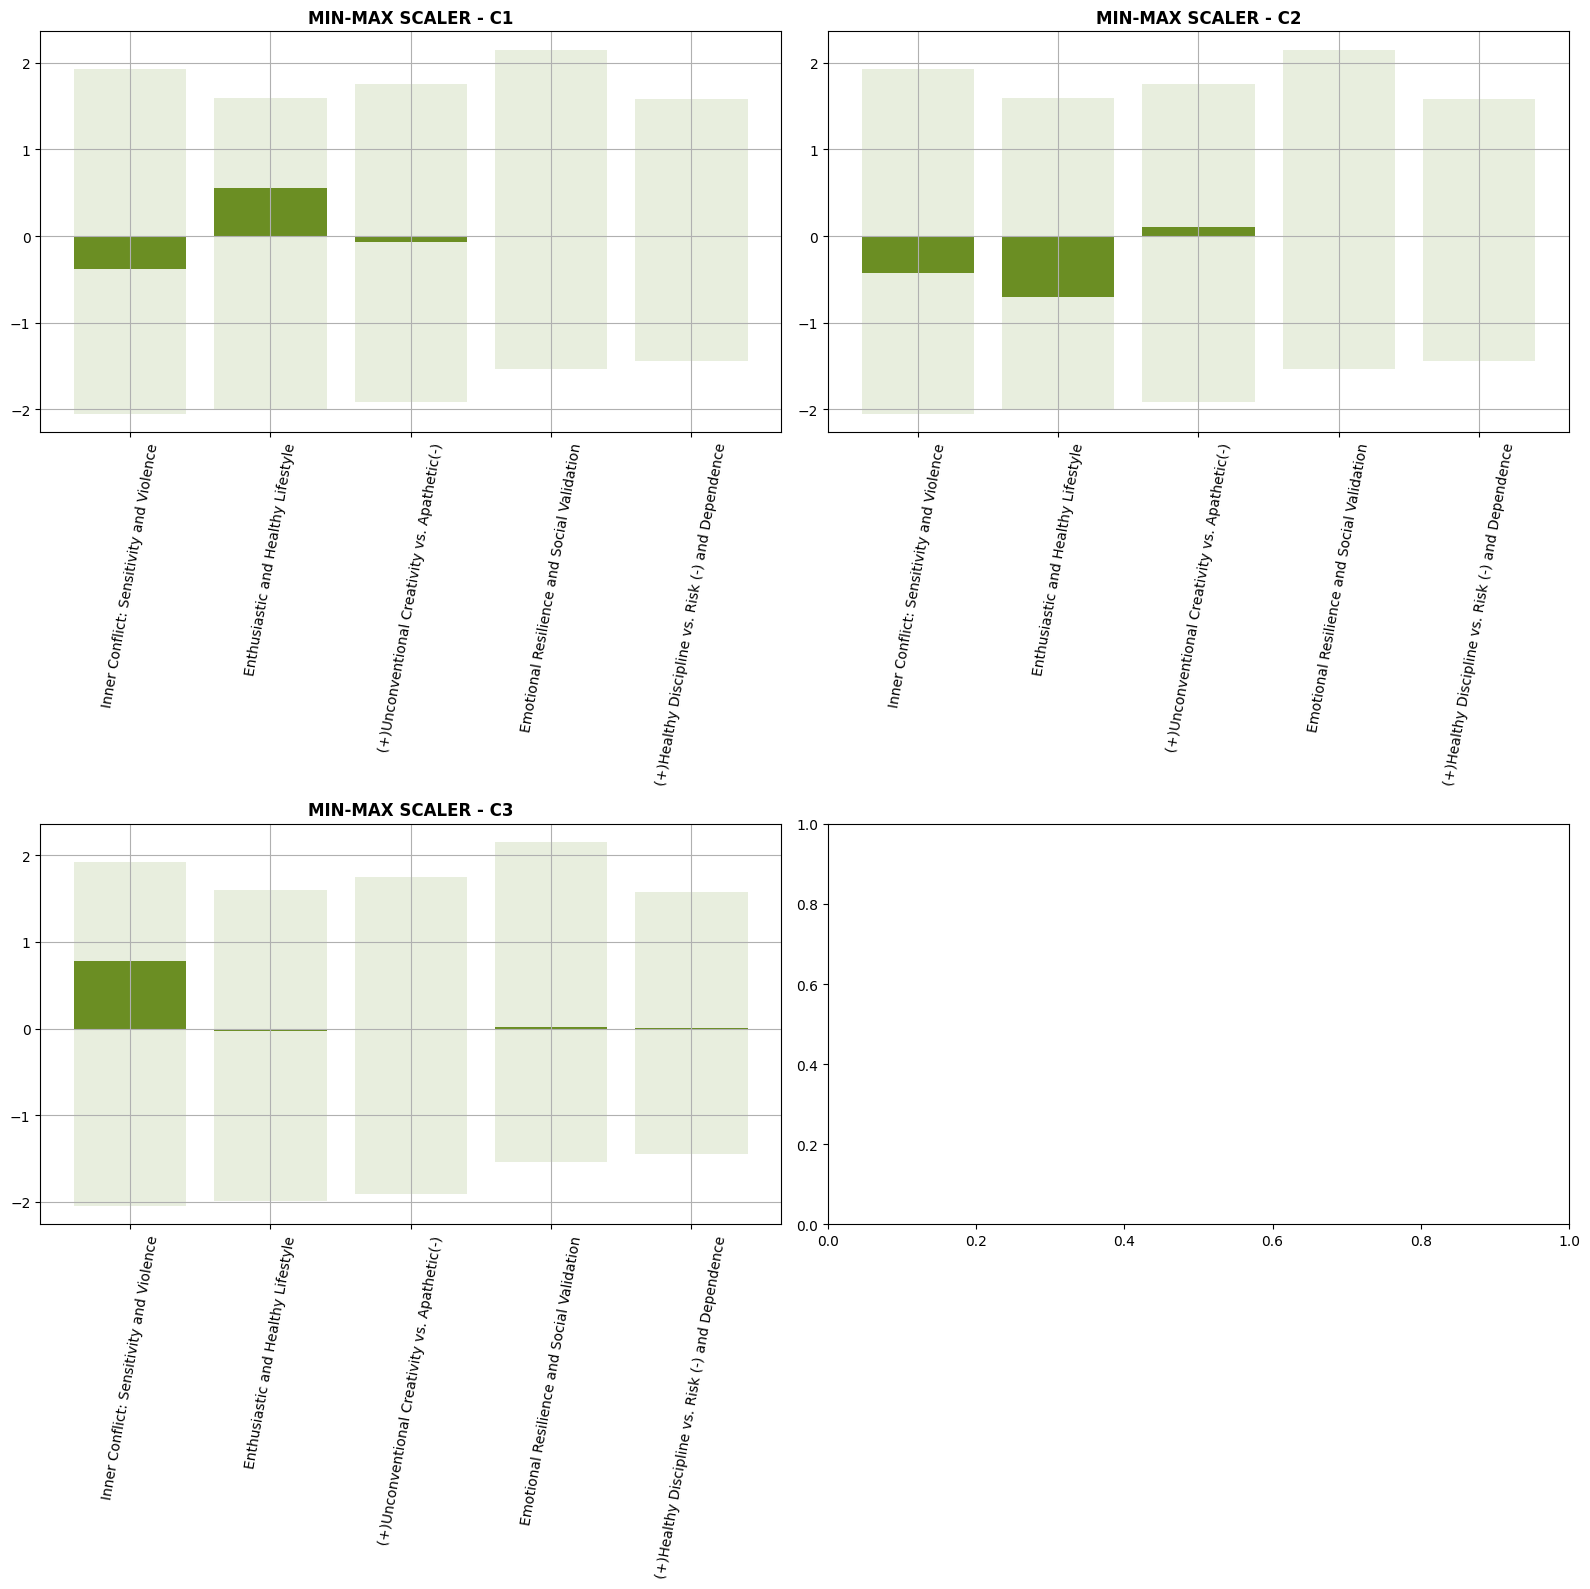

In [ ]:
# Visual rapresentation of the centroid of each cluster for the MIN-MAX SCALER
plotcentroids(Ymm_,pc_names_mm,km_mm,k_mm,'MIN-MAX SCALER','olivedrab')

**MIN-MAX SCALAR CENTROIDS INTERPRPETATION:**
- **Cluster 1**: shows a strong positive tendency towards Enthusiastic and Healthy Lifestyle (PC2), and tends to have a negative tendence to Inner Conflict (PC1).
This suggests that people in this cluster are likely sociable and tend to prioritize their health and well-being. Furthermore, the negative PC1, indicate lower levels of anxiety, sensitivity without a tendency of problematic behavior.
This cluster might represent individuals who are generally outgoing, emphatetic and focused on a healthy lifestyle.

- **Cluster 2**: seems to have a predominant negative tendency towards Enthusiastic and Healthy Lifestyle (PC2) and a less negative tendence to Inner Conflict(PC1).
This suggests that individuals in this cluster may be more reserved and less focused on physical well-being.
They might still experience some degree of inner agitation or emotional challenges.
This cluster could represent individuals who lead a more introverted and less healthy lifestyle, possibly prioritizing routine and stability over social or physical activities.

- **Cluster 3**: seems to be ruled by high positive values of PC1.
This suggests that individuals in this cluster are likely to experience anxiety, sensitivity, and potentially show problematic behaviors.
They exhibit a more neutral stance on PC2 compared to Clusters 1 and 2, indicating that their social engagement and health behaviors might vary.
This cluster potentially represents individuals who are more sensible and prone to impulsive or negative behaviors.

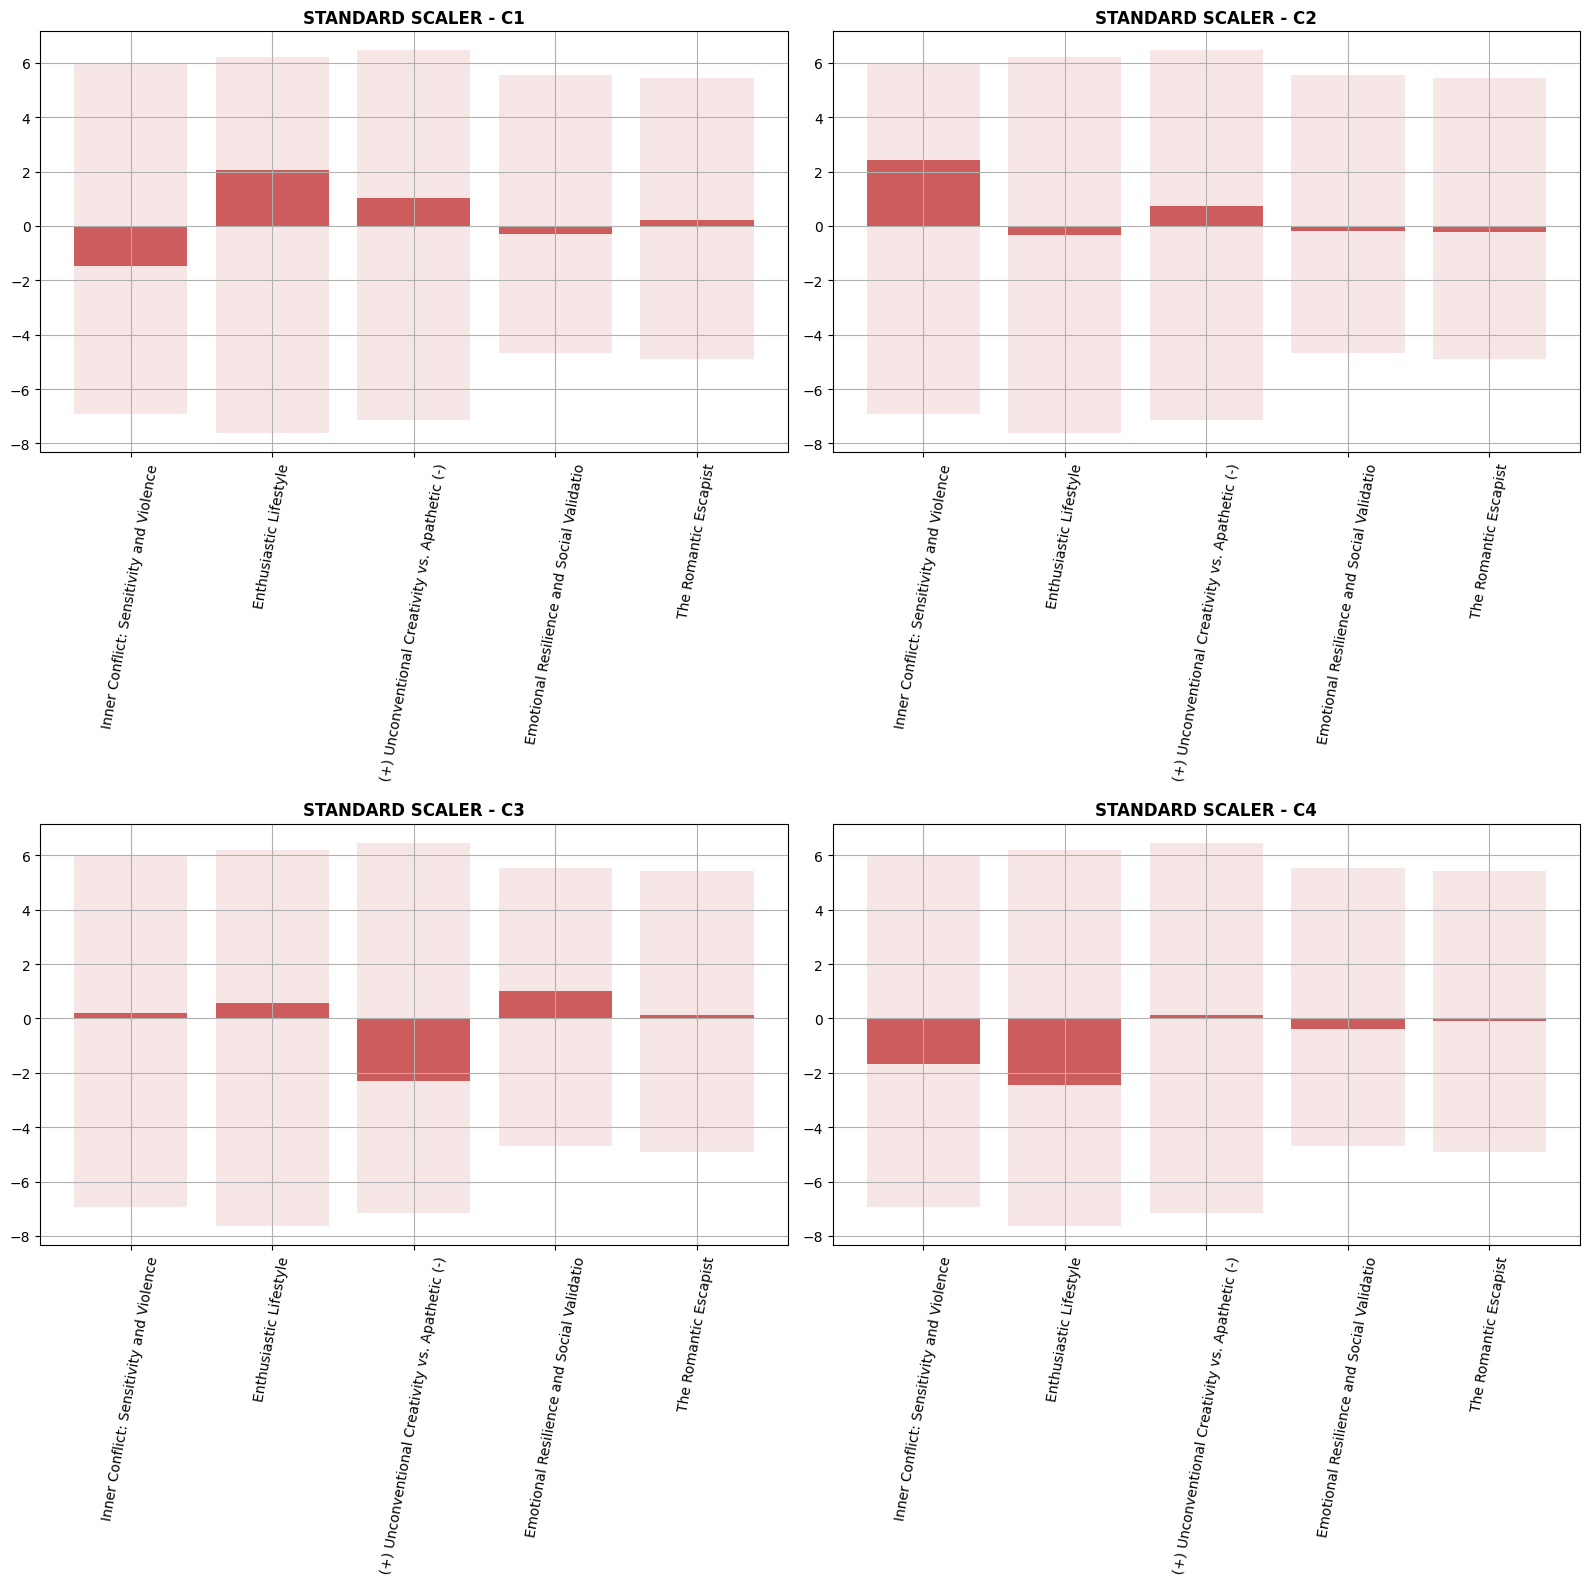

In [ ]:
# Visual rapresentation of the centroid of each cluster for the STANDARD SCALER
plotcentroids(Ystd_,pc_names_std,km_std,k_std,'STANDARD SCALER','indianred')

 STANDARD SCALAR CENTROIDS INTERPRETATION:
 - **Cluster 1**: shows strong positive tendency towards Enthusiastic and Healthy Lifestyle(PC3), a sligthly less positive propension for Unconventional Creativity vs. Apathetic (PC3) and a negative one towards Inner Conflict(PC1).
 This cluster aligns with healthy, sociable individuals who also have some unconventional creative inclinations. They experience low levels of inner conflict, indicating some emotional stability.

 - **Cluster 2**: shows strong positive tendency for PC1 and a slightly less positive for PC3.
 These individuals show high levels of sensitivity and anxiety, but despite of their inner struggles, in addition to this they also show some unconventional creative tendencies.

 - **Cluster 3**: shows a strong negative tendency for PC3 and a positive one for PC4.
 This cluster represents individuals that feels disinterest and emotional detachment and a lack of active engagement or concern for social interactions.They may feel disinterest in creative or unconventional activities, leaning towards apathy.At the same time they seems to have resilience and a desire for social validation. This people may struggle with social interactions due to their emotional detachment but they actively seek approvation from others.

 - **Cluster 4**: shows strong negative propension for PC1 e PC2.
 This cluster includes individuals who are emotionally detached and less health-conscious. They might struggle with social engagement and emotional well-being, living in a more reserved and inactive way.


In [ ]:
cluster_names_mm = ['Stable Enthusiastic', 'Reserved and Peaceful','Emotionally Reactive']
cluster_names_std = ['Stable Enthusiastic','Emotionally Reactive','Apathetic Conformists','Reserved and Peaceful']


Looking at the PC values of the centroids in the barplots above, we clearly understand that:

**MIN-MAX SCALER**
1. **Centroid 1:** is a cluster of *Stable Enthusiastic* ;
1. **Centroid 2:** is a cluster of *Reserved and Peaceful* ;
1. **Centroid 3:** is a cluster of *Emotionally Reactive* ;


**STANDARD SCALER**
1. **Centroid 1:** is a cluster of *Stable Enthusiastic* ;
1. **Centroid 2:** is a cluster of *Emotionally Reactive* ;
1. **Centroid 3:** is a cluster of *Apathetic Conformists* ;
1. **Centroid 4:** is a cluster of *Reserved and Peaceful* ;

##  **Cluster Evaluations**



Cluster evaluation is a crucial step in clustering analysis to determine how well the data points are grouped into distinct clusters.


###External Evaluation

In this section, we perform external evaluations of the clusters to better understand how students with different demographic features are distributed among the clusters. Specifically, we have chosen to apply external evaluations based on two demographic features: '**Gender**' and '**Weight**'. These two features were considered the most interesting to analyze within a university student dataset, as gender may influence personality traits, and weight is often linked to health habits.

Additionally, we have previously generated a score graph based on these labels and obtained promising results, which led us to continue with this approach.

In [ ]:
def bar_gender(k, km, title, cluster_names):

    # Initialize male and female counts for each cluster
    nf = np.zeros(k)
    nm = np.zeros(k)

    # Loop over all data points to assign counts based on gender
    for i in range(len(km.labels_)):
        # Get the cluster index for the current point
        cluster_idx = km.labels_[i]
        #Update the counter of the cluster base on the gender of i
        if Xfulldf_.loc[Xdf_.index, 'Gender'].values[i] == 'female':
            nf[cluster_idx] += 1
        else:
            nm[cluster_idx] += 1

    #Since the clusters have different size we focus on the percentages-> stacked bars

    # Calculate total counts for each cluster
    total_counts = nm + nf


    # Calculate percentages
    percentage_male = nm / total_counts * 100
    percentage_female = nf / total_counts * 100

    # Create the bar plot
    fig_mf, ax_mf = plt.subplots(figsize=(8, 8))
    ax_mf.bar(cluster_names, percentage_male, label='Male', color='blue')
    ax_mf.bar(cluster_names, percentage_female, bottom=percentage_male, label='Female', color='pink')

    # Customize the plot
    plt.xticks(rotation=20)
    ax_mf.set_ylabel('Percentage (%)')
    ax_mf.set_xlabel('Clusters')
    ax_mf.set_title(f'Cluster distribution by Gender - {title}', fontweight='bold')
    ax_mf.legend()

    plt.show()


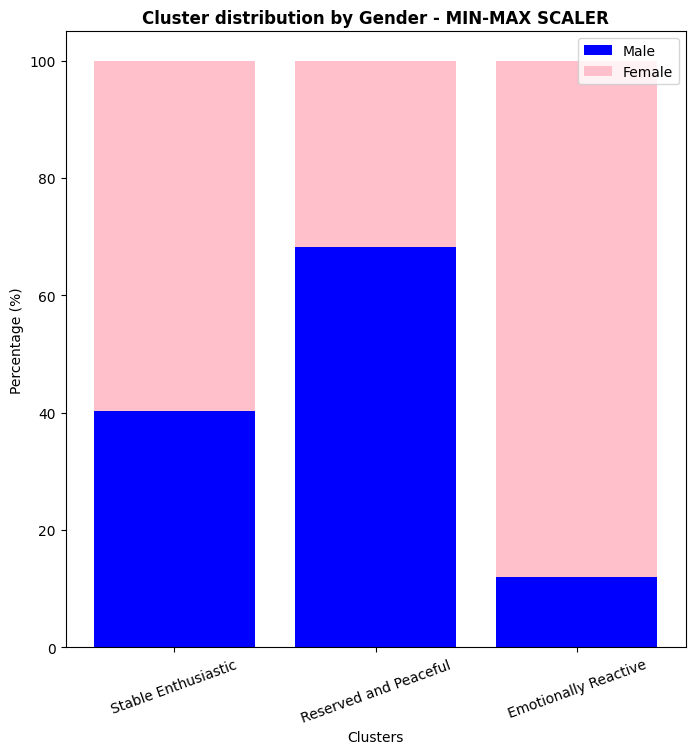

In [ ]:
bar_gender(k_mm, km_mm,'MIN-MAX SCALER',cluster_names_mm)

**MIN-MAX SCALER:**\
The charts above use stacked bars to represent the percentage of males and females in each cluster.

- Cluster 1: associated with 'Stable Enthusiastic', does not show a significant gender predominance, suggesting that gender is not a major defining factor for this group.  
- Cluster 2: on the other hand, shows a male dominance, which may indicate correlations between gender and personality traits related to inner conflict, enthusiasm, and a healthy lifestyle. As observed, people in this group are characterized by negative PC1 and PC2 values. This suggests that males tend to be more emotionally stable and less enthusiastic about an active lifestyle.  
- Cluster 3: conversely, is composed of 90% females. People in this group are characterized by positive values of PC2, leading to the conclusion that females, in general, tend to experience more inner conflict.  

The analysis reveals potential personality-gender associations, with males aligning with lower emotional conflict and a more reserved lifestyle, while females correlate with higher inner agitation.

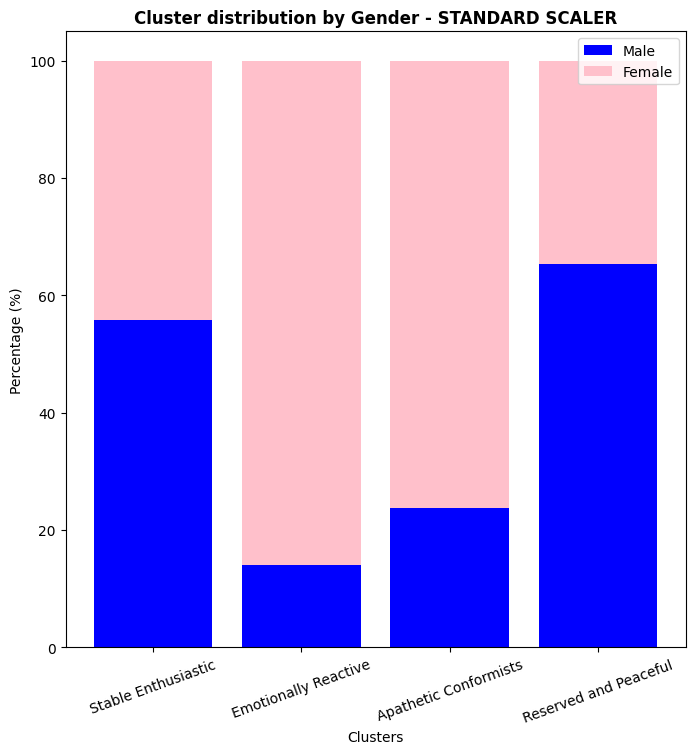

In [ ]:
bar_gender(k_std, km_std,'STANDARD SCALER',cluster_names_std)

**STANDAR SCALER:**
- Cluster 1, 2, and 4: The gender distributions and principal component results are similar respectely to the one observed on Cluster 1,3, and 2 with the Min-Max Scaler. This confirms that these clusters represent similar relation and traits regardless of the scaling method used.


- Cluster 3: is characterized by an high percentage of females. Has uniform values of PC1, which could ideally represent gender as we observed on the previous score graphs, instead PC3 is negative. Additionally, PC4 (emotional resilience and social validation) is positive, and this could be interpreted as an indicator of the female gender. To analyze this further, below is the 2D score graph that highlights these components.

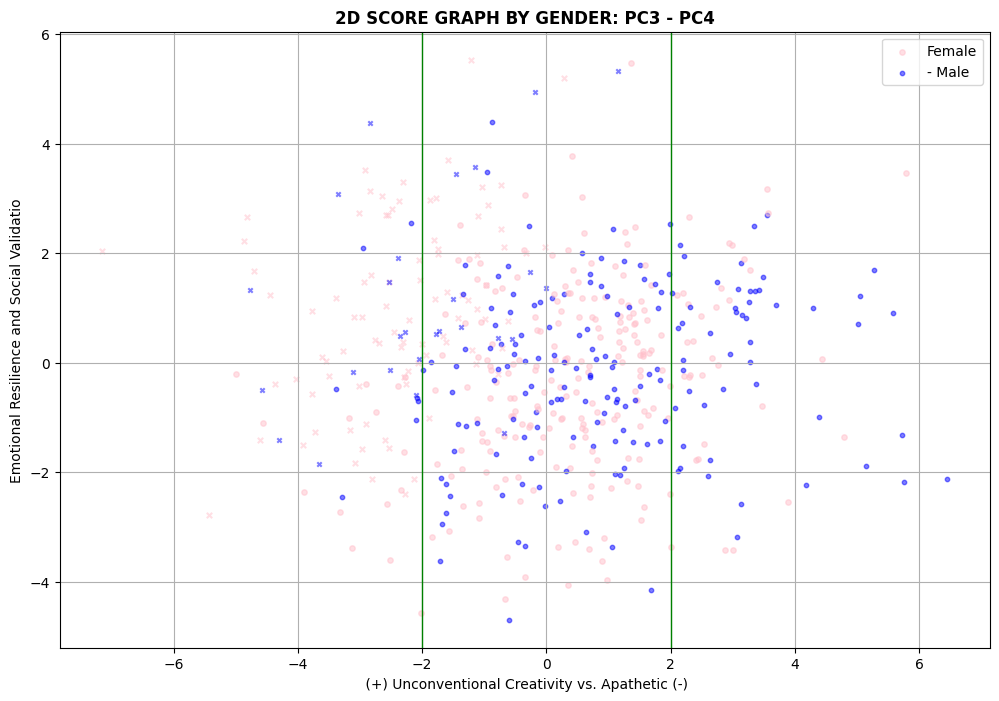

In [ ]:
def scoregraph_gender_pc3_pc4(Y, km, k, pc_names, gender_column):

    #Colors by gender
    gender_colors = {'female': 'pink', 'male': 'blue'}

    #Cluster markers to make Cluster3 in evidence
    cluster_markers = ['o', 'o', 'x','o']

    plt.figure(figsize=(12, 8))

    #Iteration on each cluster
    for cluster_id in range(k):
        #Take the points of the cluster
        cluster_points = Y[km.labels_ == cluster_id]
        #Association of gender of each point of the cluster
        cluster_genders = gender_column[km.labels_ == cluster_id]

        #Female plot
        female_points = cluster_points[cluster_genders == 'female']
        plt.scatter(female_points[:, 2], female_points[:, 3],
                    s=15, alpha=0.5, color=gender_colors['female'],
                    marker=cluster_markers[cluster_id],
                    label=f'Female' if cluster_id == 0 else "")

        #Male plot
        male_points = cluster_points[cluster_genders == 'male']
        plt.scatter(male_points[:, 2], male_points[:, 3],
                    s=10, alpha=0.5, color=gender_colors['male'],
                    marker=cluster_markers[cluster_id],
                    label=f'- Male' if cluster_id == 0 else "")


    plt.title(f'2D SCORE GRAPH BY GENDER: PC3 - PC4', fontweight='bold')
    plt.xlabel(pc_names[2])
    plt.ylabel(pc_names[3])
    plt.axvline(x=2, color='green',  linewidth=1)
    plt.axvline(x=-2, color='green',  linewidth=1)
    plt.legend()
    plt.grid()
    plt.show()

scoregraph_gender_pc3_pc4(Ystd_, km_std, k_std,pc_names_std, gender_column)

As can be seen from the 2D score graph above, there is no clear-cut division between the female and male distributions. However, the values that are farther from the origin appear to be more male-dominated for the positive component and more female-dominated for the negative component. This could suggest the female nature of Cluster 3.

In [ ]:
def bar_weight(k, km, title, cluster_names):

    # Weight intervals and their corresponding colors
    weight_bins = [41, 55, 64, 75,165]
    bin_labels = [f'{weight_bins[i]}-{weight_bins[i + 1]}' for i in range(len(weight_bins) - 1)]
    weight_color_map = {
        '41-55': 'green',
        '55-64': 'lightgreen',
        '64-75': 'yellow',
        '75-165': 'orange',
    }

    n_bins = len(bin_labels)

    # Initialize the count matrix for each cluster and weight bin
    weight_counts = np.zeros((k, n_bins))

    #Iteration on points
    for ii in range(len(km.labels_)):
       # Get cluster index to the current point ii
        cluster_idx = km.labels_[ii]
        #Get the weight value to the current point ii
        weight_value = Xfulldf_.loc[Xdf_.index, 'Weight'].values[ii]

        # Determine the weight range and update counts
        for bin_idx in range(n_bins):
            if weight_bins[bin_idx] <= weight_value < weight_bins[bin_idx + 1]:
                weight_counts[cluster_idx, bin_idx] += 1
                break

    #Since the clusters have different size we focus on the percentages -> stacked bars

    # Calculate percentages for each cluster
    total_counts = weight_counts.sum(axis=1, keepdims=True)
    percentages = (weight_counts / total_counts) * 100

    # Create  bars with the corresponding colors for each weight interval
    fig, ax = plt.subplots(figsize=(8, 8))
    x = np.arange(len(cluster_names))
    bottoms = np.zeros(k)
    #Iteration on the weight ranges
    for bin_idx in range(n_bins):
        #Create a bar starting at bottoms that is the sum of the percentage
        #of the previous ranges
        ax.bar(x, percentages[:, bin_idx], bottom=bottoms, color=weight_color_map[bin_labels[bin_idx]], label=bin_labels[bin_idx])
        bottoms += percentages[:, bin_idx]


    plt.xticks(x, cluster_names, rotation=20)
    ax.set_ylabel('(%)')
    ax.set_title(f'Cluster distribution by Weight - {title}', fontweight='bold')
    ax.legend(title='Weight intervals')
    plt.tight_layout()
    plt.show()


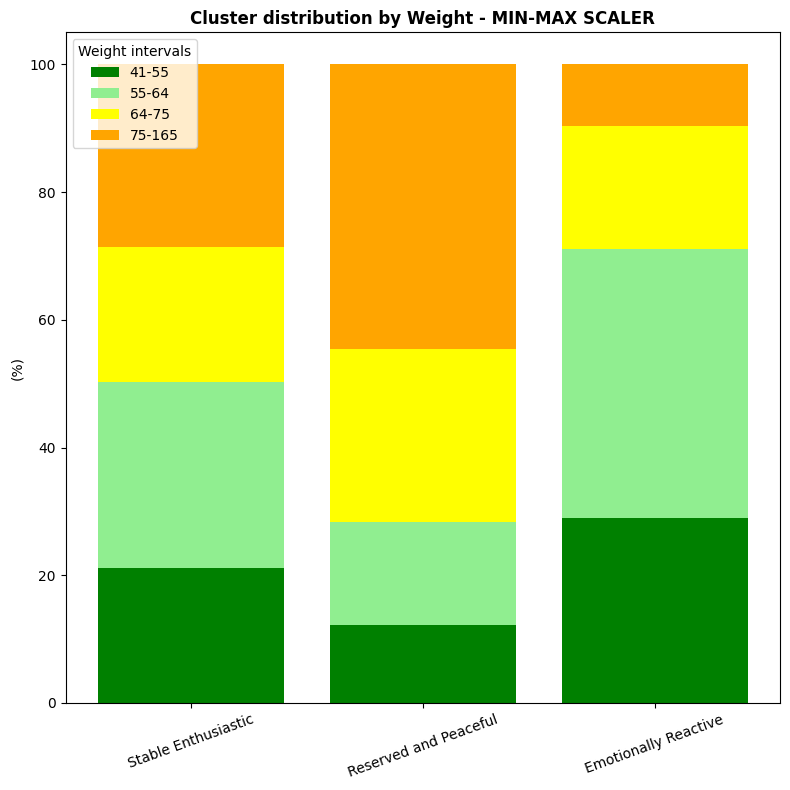

In [ ]:
bar_weight(k_mm, km_mm,'MIN-MAX SCALER', cluster_names_mm)

**MIN-MAX SCALER:**\
The charts above use stacked bars to represent the percentage of individuals within different weight intervals for each cluster.
- Cluster 1 related to 'Stable Enthusiastic' don't show a particolar predominance of any interval of weights. This suggest tha weight is not a major defining factor for this group.
- Cluster 2 instead,shows a dominance of people with weight above 64kg, this may indicate correlations between weight and personality traits related to inner conflict and enthusiastic and healthy lifestyle. As we saw people in this group are characterized by negative PC1 and PC2. This suggests that higher weight correlates with a more stable emotional state and less enthusiasm for an active lifestyle.
- Cluster 3 otherwise, tends to have more people with weight under 64 kg, people in this group are characterized by positive values of PC2.
We can conclude that people with lower weight, in general, tends to have more inner conflict.

The analysis reveals potential personality-weight associations, with higher weight aligning with lower emotional conflict and a more reserved lifestyle, while lower weight correlates with higher inner agitation.

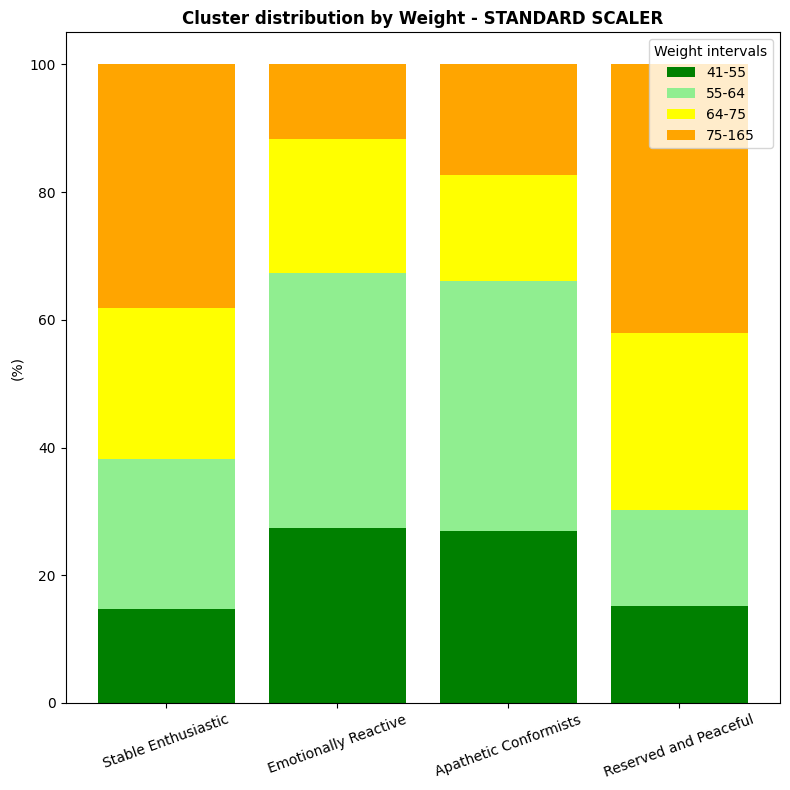

In [ ]:
bar_weight(k_std, km_std,'STANDARD SCALER', cluster_names_std)

**STANDAR SCALER:**
- Cluster 1: approximately 40% of individuals in this cluster have a weight >75 kg. The others intervals in this cluster have similar proportion. People high higher weight tends to life a less sociable and healthy life.
- Cluster 2: we osserve similar distribution as Cluster 3 obtained with MIN-MAX SCALER. People with lower weight are slightly characterized by an enthusiastich and healtier lifestyle.
- Cluster 3: is characterized by high positive values of PC1. In this cluster there are more people with weight between 41-64 kg. This suggests a relation between lower weight and less inner conflict.
- Cluster 4: we osserve similar distribution as Cluster 2 obtained with MIN-MAX SCALER. People with higher weight tend to exhibit lower energy, less enthusiasm, and a less healthy lifestyle.


###Internal Evaluation

The following section computes the **Silhouette score** for each cluster found in both dataframes. It is a valuable measure of the quality of our k-means algorithm, since it evaluates bot the cohesion within clusters and the separation between clusters. It ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
# Function to calculate silhouette scores for each cluster and the global score
def calculate_silhouette_scores(Y, cluster_labels, k, cluster_names, title):

    # Compute the global silhouette score for all point
    global_sil_score = silhouette_score(Y, cluster_labels)

    # List to store silhouette scores for each cluster
    cluster_silscores = []
    for kk in range(k):
       # Compute the average silhouette score for the current cluster
       cluster_silscore = np.mean(silhouette_samples(Y, cluster_labels)[cluster_labels == kk])
       cluster_silscores.append(cluster_silscore)

    # Display the DataFrame with the silhouette scores
    sil_score_df = pd.DataFrame(
        data=np.array(cluster_silscores + [global_sil_score]),
        index=cluster_names + ['Global'],
        columns=[(f'Silhouette Score - {title}')]
        )
    display(sil_score_df)

# Calculate silhouette scores for the Min-Max Scaled data
calculate_silhouette_scores(Ymm_, km_mm.labels_, k_mm, [f'cluster{i+1}' for i in range(k_mm)], 'MIN MAX SCALER')
# Calculate silhouette scores for the Min-Max Scaled data
calculate_silhouette_scores(Ystd_, km_std.labels_, k_std, [f'cluster{i+1}' for i in range(k_std)],'STANDARD SCALER')


Silhouette Score - MIN MAX SCALER
cluster1                           0.141916
cluster2                           0.157471
cluster3                           0.224246
Global                             0.174375

Silhouette Score - STANDARD SCALER
cluster1                            0.142485
cluster2                            0.205161
cluster3                            0.163026
cluster4                            0.143629
Global                              0.165711

Both scaling methods result in **low** Silhouette Scores, indicating poor separation between clusters. This could suggest that the data is not naturally well-suited for clustering or that the number of clusters (k) chosen is not optimal.
Observing the 3D Scoregraph we can also confirm, like the silhouette scores shows, that there are not well defined clusters separated from the others.
For both methods, the clusters with better silhouette score are **Cluster 3** for Min-Max Scaler and **Cluster 2** for Standard Scaler.
When analyzing the previous score graphs we have noticed that these two to clusters rappresents similar groups of people. This may suggests that this clusters likely represents a more distinct group in the data with more defined characteristics respect to the others.


## FINAL OBSERVATIONS

In conclusion, while the clustering analysis showed low silhouette scores, indicating some limitations in the effectiveness of the clustering, the use of PC1 and PC2 allowed us to identify clusters that are, on average, meaningful. Considering that we captured around 25% of the explained variance, this can be considered a sufficient result. Despite the challenges, the external evaluation demonstrates that the clusters are moderately significant, offering valuable insights into gender-related and weight-related personality traits and behavioral patterns.

Given the 2D scoregraph with centroids from the Min-Max Scaler on the first two principal components, which reveal well-distinguished clusters, along with the plot indicating the negligible contribution of PC4 and PC5, as well as the minimal contribution of PC3, it is reasonable to consider proceeding with a PCA with \(m=2\) on this dataset. This additional analysis resulted in a higher silhouette score and an external evaluation with similar characteristics.

****************** MIN MAX SCALER - RESULTS OF THE SEARCH... ******************
BEST SILHOUETTE SCORE: **0.3585964355541626** --> **k = 3**
**************************************************************